In [2]:
import keras
from keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Activation,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.datasets import cifar10
import numpy as np
import pandas as pd 
import os


In [3]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()


     8192/170498071 [..............................] - ETA: 19:34

    40960/170498071 [..............................] - ETA: 8:18 

    90112/170498071 [..............................] - ETA: 5:25

   204800/170498071 [..............................] - ETA: 3:20

   401408/170498071 [..............................] - ETA: 2:09

   434176/170498071 [..............................] - ETA: 2:19

   712704/170498071 [..............................] - ETA: 1:37

   745472/170498071 [..............................] - ETA: 1:48

  1024000/170498071 [..............................] - ETA: 1:27

  1204224/170498071 [..............................] - ETA: 1:20

  1384448/170498071 [..............................] - ETA: 1:16

  1449984/170498071 [..............................] - ETA: 1:20

  1794048/170498071 [..............................] - ETA: 1:10

  1957888/170498071 [..............................] - ETA: 1:13

  2400256/170498071 [..............................] - ETA: 1:03

  2662400/170498071 [..............................] - ETA: 1:00

  2859008/170498071 [..............................] - ETA: 1:01

  3227648/170498071 [..............................] - ETA: 56s 

  3399680/170498071 [..............................] - ETA: 56s

  3547136/170498071 [..............................] - ETA: 56s

  3727360/170498071 [..............................] - ETA: 56s

  3907584/170498071 [..............................] - ETA: 55s

  4104192/170498071 [..............................] - ETA: 55s

  4300800/170498071 [..............................] - ETA: 55s

  4481024/170498071 [..............................] - ETA: 54s

  4612096/170498071 [..............................] - ETA: 57s

  4857856/170498071 [..............................] - ETA: 55s

  4988928/170498071 [..............................] - ETA: 56s

  5136384/170498071 [..............................] - ETA: 56s

  5267456/170498071 [..............................] - ETA: 57s

  5414912/170498071 [..............................] - ETA: 57s

  5562368/170498071 [..............................] - ETA: 57s

  5709824/170498071 [>.............................] - ETA: 57s

  5857280/170498071 [>.............................] - ETA: 57s

  5988352/170498071 [>.............................] - ETA: 58s

  6135808/170498071 [>.............................] - ETA: 58s

  6283264/170498071 [>.............................] - ETA: 58s

  6316032/170498071 [>.............................] - ETA: 59s

  6529024/170498071 [>.............................] - ETA: 59s

  6643712/170498071 [>.............................] - ETA: 59s

  6758400/170498071 [>.............................] - ETA: 1:00

  6873088/170498071 [>.............................] - ETA: 1:00

  6971392/170498071 [>.............................] - ETA: 1:00

  7086080/170498071 [>.............................] - ETA: 1:01

  7184384/170498071 [>.............................] - ETA: 1:01

  7299072/170498071 [>.............................] - ETA: 1:01

  7413760/170498071 [>.............................] - ETA: 1:02

  7528448/170498071 [>.............................] - ETA: 1:02

  7643136/170498071 [>.............................] - ETA: 1:02

  7757824/170498071 [>.............................] - ETA: 1:03

  7872512/170498071 [>.............................] - ETA: 1:03

  7938048/170498071 [>.............................] - ETA: 1:04

  8069120/170498071 [>.............................] - ETA: 1:04

  8151040/170498071 [>.............................] - ETA: 1:04

  8232960/170498071 [>.............................] - ETA: 1:05

  8314880/170498071 [>.............................] - ETA: 1:05

  8396800/170498071 [>.............................] - ETA: 1:06

  8495104/170498071 [>.............................] - ETA: 1:06

  8577024/170498071 [>.............................] - ETA: 1:06

  8658944/170498071 [>.............................] - ETA: 1:07

  8757248/170498071 [>.............................] - ETA: 1:07

  8855552/170498071 [>.............................] - ETA: 1:08

  8953856/170498071 [>.............................] - ETA: 1:08

  9035776/170498071 [>.............................] - ETA: 1:08

  9134080/170498071 [>.............................] - ETA: 1:09

  9216000/170498071 [>.............................] - ETA: 1:09

  9314304/170498071 [>.............................] - ETA: 1:09

  9396224/170498071 [>.............................] - ETA: 1:10

  9494528/170498071 [>.............................] - ETA: 1:10

  9592832/170498071 [>.............................] - ETA: 1:10

  9691136/170498071 [>.............................] - ETA: 1:10

  9789440/170498071 [>.............................] - ETA: 1:10

  9887744/170498071 [>.............................] - ETA: 1:10

  9986048/170498071 [>.............................] - ETA: 1:11

 10084352/170498071 [>.............................] - ETA: 1:11

 10182656/170498071 [>.............................] - ETA: 1:11

 10280960/170498071 [>.............................] - ETA: 1:12

 10379264/170498071 [>.............................] - ETA: 1:12

 10477568/170498071 [>.............................] - ETA: 1:12

 10575872/170498071 [>.............................] - ETA: 1:12

 10674176/170498071 [>.............................] - ETA: 1:12

 10772480/170498071 [>.............................] - ETA: 1:12

 10870784/170498071 [>.............................] - ETA: 1:13

 10969088/170498071 [>.............................] - ETA: 1:13

 11067392/170498071 [>.............................] - ETA: 1:13

 11173888/170498071 [>.............................] - ETA: 1:13

 11280384/170498071 [>.............................] - ETA: 1:13

 11370496/170498071 [=>............................] - ETA: 1:13

 11411456/170498071 [=>............................] - ETA: 1:14

 11526144/170498071 [=>............................] - ETA: 1:14

 11591680/170498071 [=>............................] - ETA: 1:14

 11673600/170498071 [=>............................] - ETA: 1:14

 11755520/170498071 [=>............................] - ETA: 1:15

 11837440/170498071 [=>............................] - ETA: 1:15

 11919360/170498071 [=>............................] - ETA: 1:15

 12001280/170498071 [=>............................] - ETA: 1:15

 12083200/170498071 [=>............................] - ETA: 1:15

 12165120/170498071 [=>............................] - ETA: 1:16

 12263424/170498071 [=>............................] - ETA: 1:16

 12345344/170498071 [=>............................] - ETA: 1:16

 12443648/170498071 [=>............................] - ETA: 1:16

 12525568/170498071 [=>............................] - ETA: 1:16

 12607488/170498071 [=>............................] - ETA: 1:16

 12689408/170498071 [=>............................] - ETA: 1:16

 12771328/170498071 [=>............................] - ETA: 1:17

 12869632/170498071 [=>............................] - ETA: 1:17

 12967936/170498071 [=>............................] - ETA: 1:17

 13066240/170498071 [=>............................] - ETA: 1:17

 13164544/170498071 [=>............................] - ETA: 1:17

 13262848/170498071 [=>............................] - ETA: 1:17

 13361152/170498071 [=>............................] - ETA: 1:17

 13443072/170498071 [=>............................] - ETA: 1:17

 13541376/170498071 [=>............................] - ETA: 1:17

 13639680/170498071 [=>............................] - ETA: 1:17

 13737984/170498071 [=>............................] - ETA: 1:17

 13836288/170498071 [=>............................] - ETA: 1:17

 13934592/170498071 [=>............................] - ETA: 1:17

 14032896/170498071 [=>............................] - ETA: 1:17

 14131200/170498071 [=>............................] - ETA: 1:17

 14229504/170498071 [=>............................] - ETA: 1:17

 14327808/170498071 [=>............................] - ETA: 1:17

 14426112/170498071 [=>............................] - ETA: 1:17

 14524416/170498071 [=>............................] - ETA: 1:17

 14622720/170498071 [=>............................] - ETA: 1:17

 14721024/170498071 [=>............................] - ETA: 1:17

 14819328/170498071 [=>............................] - ETA: 1:18

 14950400/170498071 [=>............................] - ETA: 1:18

 15032320/170498071 [=>............................] - ETA: 1:18

 15065088/170498071 [=>............................] - ETA: 1:18



 15179776/170498071 [=>............................] - ETA: 1:18

 15228928/170498071 [=>............................] - ETA: 1:19

 15245312/170498071 [=>............................] - ETA: 1:19

 15327232/170498071 [=>............................] - ETA: 1:19

 15368192/170498071 [=>............................] - ETA: 1:19

 15409152/170498071 [=>............................] - ETA: 1:20

 15441920/170498071 [=>............................] - ETA: 1:20

 15491072/170498071 [=>............................] - ETA: 1:21

 15540224/170498071 [=>............................] - ETA: 1:21

 15589376/170498071 [=>............................] - ETA: 1:21

 15638528/170498071 [=>............................] - ETA: 1:22

 15671296/170498071 [=>............................] - ETA: 1:22

 15720448/170498071 [=>............................] - ETA: 1:22

 15769600/170498071 [=>............................] - ETA: 1:23

 15818752/170498071 [=>............................] - ETA: 1:23

 15867904/170498071 [=>............................] - ETA: 1:25

 15917056/170498071 [=>............................] - ETA: 1:25

 15949824/170498071 [=>............................] - ETA: 1:25

 15982592/170498071 [=>............................] - ETA: 1:26

 16015360/170498071 [=>............................] - ETA: 1:26

 16064512/170498071 [=>............................] - ETA: 1:26

 16097280/170498071 [=>............................] - ETA: 1:27

 16130048/170498071 [=>............................] - ETA: 1:27

 16179200/170498071 [=>............................] - ETA: 1:27

 16211968/170498071 [=>............................] - ETA: 1:27

 16261120/170498071 [=>............................] - ETA: 1:28

 16277504/170498071 [=>............................] - ETA: 1:28

 16326656/170498071 [=>............................] - ETA: 1:29

 16375808/170498071 [=>............................] - ETA: 1:29

 16424960/170498071 [=>............................] - ETA: 1:29

 16474112/170498071 [=>............................] - ETA: 1:29

 16506880/170498071 [=>............................] - ETA: 1:30

 16556032/170498071 [=>............................] - ETA: 1:30

 16588800/170498071 [=>............................] - ETA: 1:30

 16637952/170498071 [=>............................] - ETA: 1:30

 16687104/170498071 [=>............................] - ETA: 1:30

 16719872/170498071 [=>............................] - ETA: 1:31

 16769024/170498071 [=>............................] - ETA: 1:31

 16818176/170498071 [=>............................] - ETA: 1:31

 16867328/170498071 [=>............................] - ETA: 1:31

 16916480/170498071 [=>............................] - ETA: 1:32

 16949248/170498071 [=>............................] - ETA: 1:32

 16998400/170498071 [=>............................] - ETA: 1:32

 17047552/170498071 [=>............................] - ETA: 1:32

 17096704/170498071 [==>...........................] - ETA: 1:33

 17162240/170498071 [==>...........................] - ETA: 1:33

 17211392/170498071 [==>...........................] - ETA: 1:33

 17260544/170498071 [==>...........................] - ETA: 1:33

 17326080/170498071 [==>...........................] - ETA: 1:33

 17391616/170498071 [==>...........................] - ETA: 1:33

 17457152/170498071 [==>...........................] - ETA: 1:34

 17506304/170498071 [==>...........................] - ETA: 1:34

 17571840/170498071 [==>...........................] - ETA: 1:34

 17637376/170498071 [==>...........................] - ETA: 1:34

 17686528/170498071 [==>...........................] - ETA: 1:34

 17743872/170498071 [==>...........................] - ETA: 1:34

 17801216/170498071 [==>...........................] - ETA: 1:34

 17866752/170498071 [==>...........................] - ETA: 1:34

 17932288/170498071 [==>...........................] - ETA: 1:35

 17997824/170498071 [==>...........................] - ETA: 1:35

 18063360/170498071 [==>...........................] - ETA: 1:35

 18137088/170498071 [==>...........................] - ETA: 1:35

 18194432/170498071 [==>...........................] - ETA: 1:35

 18259968/170498071 [==>...........................] - ETA: 1:35

 18325504/170498071 [==>...........................] - ETA: 1:35

 18391040/170498071 [==>...........................] - ETA: 1:35

 18456576/170498071 [==>...........................] - ETA: 1:35

 18522112/170498071 [==>...........................] - ETA: 1:35

 18604032/170498071 [==>...........................] - ETA: 1:36

 18669568/170498071 [==>...........................] - ETA: 1:36



 18735104/170498071 [==>...........................] - ETA: 1:36

 18817024/170498071 [==>...........................] - ETA: 1:36

 18882560/170498071 [==>...........................] - ETA: 1:36

 18948096/170498071 [==>...........................] - ETA: 1:36

 19030016/170498071 [==>...........................] - ETA: 1:36

 19095552/170498071 [==>...........................] - ETA: 1:36

 19177472/170498071 [==>...........................] - ETA: 1:36

 19226624/170498071 [==>...........................] - ETA: 1:37

 19275776/170498071 [==>...........................] - ETA: 1:37

 19341312/170498071 [==>...........................] - ETA: 1:37

 19390464/170498071 [==>...........................] - ETA: 1:37

 19456000/170498071 [==>...........................] - ETA: 1:37

 19505152/170498071 [==>...........................] - ETA: 1:37

 19554304/170498071 [==>...........................] - ETA: 1:37

 19619840/170498071 [==>...........................] - ETA: 1:37

 19668992/170498071 [==>...........................] - ETA: 1:38

 19734528/170498071 [==>...........................] - ETA: 1:38

 19767296/170498071 [==>...........................] - ETA: 1:38

 19816448/170498071 [==>...........................] - ETA: 1:39

 19857408/170498071 [==>...........................] - ETA: 1:39

 19898368/170498071 [==>...........................] - ETA: 1:39

 19947520/170498071 [==>...........................] - ETA: 1:39

 19996672/170498071 [==>...........................] - ETA: 1:39

 20045824/170498071 [==>...........................] - ETA: 1:40

 20094976/170498071 [==>...........................] - ETA: 1:40

 20127744/170498071 [==>...........................] - ETA: 1:40

 20176896/170498071 [==>...........................] - ETA: 1:40

 20226048/170498071 [==>...........................] - ETA: 1:41

 20275200/170498071 [==>...........................] - ETA: 1:41

 20324352/170498071 [==>...........................] - ETA: 1:41

 20389888/170498071 [==>...........................] - ETA: 1:41

 20439040/170498071 [==>...........................] - ETA: 1:42

 20488192/170498071 [==>...........................] - ETA: 1:42

 20553728/170498071 [==>...........................] - ETA: 1:42

 20602880/170498071 [==>...........................] - ETA: 1:42

 20652032/170498071 [==>...........................] - ETA: 1:42

 20717568/170498071 [==>...........................] - ETA: 1:42

 20766720/170498071 [==>...........................] - ETA: 1:42

 20832256/170498071 [==>...........................] - ETA: 1:43

 20914176/170498071 [==>...........................] - ETA: 1:43

 20963328/170498071 [==>...........................] - ETA: 1:43

 21012480/170498071 [==>...........................] - ETA: 1:43

 21045248/170498071 [==>...........................] - ETA: 1:44

 21094400/170498071 [==>...........................] - ETA: 1:44

 21143552/170498071 [==>...........................] - ETA: 1:44

 21192704/170498071 [==>...........................] - ETA: 1:44

 21241856/170498071 [==>...........................] - ETA: 1:45

 21291008/170498071 [==>...........................] - ETA: 1:45

 21323776/170498071 [==>...........................] - ETA: 1:45

 21389312/170498071 [==>...........................] - ETA: 1:45

 21438464/170498071 [==>...........................] - ETA: 1:45

 21487616/170498071 [==>...........................] - ETA: 1:45

 21536768/170498071 [==>...........................] - ETA: 1:46

 21585920/170498071 [==>...........................] - ETA: 1:46

 21635072/170498071 [==>...........................] - ETA: 1:46

 21700608/170498071 [==>...........................] - ETA: 1:46

 21749760/170498071 [==>...........................] - ETA: 1:46

 21798912/170498071 [==>...........................] - ETA: 1:46

 21864448/170498071 [==>...........................] - ETA: 1:46

 21913600/170498071 [==>...........................] - ETA: 1:47

 21962752/170498071 [==>...........................] - ETA: 1:47

 22028288/170498071 [==>...........................] - ETA: 1:47

 22077440/170498071 [==>...........................] - ETA: 1:47

 22142976/170498071 [==>...........................] - ETA: 1:47

 22192128/170498071 [==>...........................] - ETA: 1:47

 22257664/170498071 [==>...........................] - ETA: 1:48

 22306816/170498071 [==>...........................] - ETA: 1:48

 22372352/170498071 [==>...........................] - ETA: 1:48

 22437888/170498071 [==>...........................] - ETA: 1:48

 22487040/170498071 [==>...........................] - ETA: 1:48

 22552576/170498071 [==>...........................] - ETA: 1:48

 22618112/170498071 [==>...........................] - ETA: 1:48

 22667264/170498071 [==>...........................] - ETA: 1:48

 22732800/170498071 [==>...........................] - ETA: 1:48

 22765568/170498071 [===>..........................] - ETA: 1:48

 22831104/170498071 [===>..........................] - ETA: 1:48

 22847488/170498071 [===>..........................] - ETA: 1:49

 22913024/170498071 [===>..........................] - ETA: 1:49

 22978560/170498071 [===>..........................] - ETA: 1:49

 23044096/170498071 [===>..........................] - ETA: 1:49

 23109632/170498071 [===>..........................] - ETA: 1:49

 23175168/170498071 [===>..........................] - ETA: 1:49

 23257088/170498071 [===>..........................] - ETA: 1:49

 23322624/170498071 [===>..........................] - ETA: 1:49

 23388160/170498071 [===>..........................] - ETA: 1:49

 23470080/170498071 [===>..........................] - ETA: 1:49

 23535616/170498071 [===>..........................] - ETA: 1:49

 23617536/170498071 [===>..........................] - ETA: 1:49

 23683072/170498071 [===>..........................] - ETA: 1:49

 23748608/170498071 [===>..........................] - ETA: 1:49

 23781376/170498071 [===>..........................] - ETA: 1:49

 23863296/170498071 [===>..........................] - ETA: 1:50

 23961600/170498071 [===>..........................] - ETA: 1:50

 24010752/170498071 [===>..........................] - ETA: 1:50

 24059904/170498071 [===>..........................] - ETA: 1:50

 24125440/170498071 [===>..........................] - ETA: 1:51

 24174592/170498071 [===>..........................] - ETA: 1:51

 24240128/170498071 [===>..........................] - ETA: 1:51

 24305664/170498071 [===>..........................] - ETA: 1:51

 24371200/170498071 [===>..........................] - ETA: 1:51

 24420352/170498071 [===>..........................] - ETA: 1:51

 24485888/170498071 [===>..........................] - ETA: 1:51

 24551424/170498071 [===>..........................] - ETA: 1:51

 24567808/170498071 [===>..........................] - ETA: 1:51

 24633344/170498071 [===>..........................] - ETA: 1:51

 24682496/170498071 [===>..........................] - ETA: 1:51

 24731648/170498071 [===>..........................] - ETA: 1:51

 24780800/170498071 [===>..........................] - ETA: 1:52

 24813568/170498071 [===>..........................] - ETA: 1:52

 24862720/170498071 [===>..........................] - ETA: 1:52

 24928256/170498071 [===>..........................] - ETA: 1:52

 24977408/170498071 [===>..........................] - ETA: 1:52

 25026560/170498071 [===>..........................] - ETA: 1:52

 25075712/170498071 [===>..........................] - ETA: 1:52

 25124864/170498071 [===>..........................] - ETA: 1:52

 25190400/170498071 [===>..........................] - ETA: 1:52

 25239552/170498071 [===>..........................] - ETA: 1:53

 25288704/170498071 [===>..........................] - ETA: 1:53

 25354240/170498071 [===>..........................] - ETA: 1:53

 25419776/170498071 [===>..........................] - ETA: 1:53

 25468928/170498071 [===>..........................] - ETA: 1:53

 25534464/170498071 [===>..........................] - ETA: 1:53

 25583616/170498071 [===>..........................] - ETA: 1:53

 25649152/170498071 [===>..........................] - ETA: 1:53

 25698304/170498071 [===>..........................] - ETA: 1:53

 25763840/170498071 [===>..........................] - ETA: 1:53

 25829376/170498071 [===>..........................] - ETA: 1:53

 25878528/170498071 [===>..........................] - ETA: 1:53

 25944064/170498071 [===>..........................] - ETA: 1:53

 26009600/170498071 [===>..........................] - ETA: 1:54

 26075136/170498071 [===>..........................] - ETA: 1:54

 26140672/170498071 [===>..........................] - ETA: 1:54

 26206208/170498071 [===>..........................] - ETA: 1:54

 26271744/170498071 [===>..........................] - ETA: 1:54

 26288128/170498071 [===>..........................] - ETA: 1:54

 26353664/170498071 [===>..........................] - ETA: 1:54

 26419200/170498071 [===>..........................] - ETA: 1:54

 26501120/170498071 [===>..........................] - ETA: 1:54

 26533888/170498071 [===>..........................] - ETA: 1:54

 26599424/170498071 [===>..........................] - ETA: 1:54

 26648576/170498071 [===>..........................] - ETA: 1:54

 26714112/170498071 [===>..........................] - ETA: 1:54

 26779648/170498071 [===>..........................] - ETA: 1:54

 26828800/170498071 [===>..........................] - ETA: 1:54

 26877952/170498071 [===>..........................] - ETA: 1:54

 26927104/170498071 [===>..........................] - ETA: 1:54

 26992640/170498071 [===>..........................] - ETA: 1:55

 27041792/170498071 [===>..........................] - ETA: 1:55

 27107328/170498071 [===>..........................] - ETA: 1:55

 27172864/170498071 [===>..........................] - ETA: 1:55

 27222016/170498071 [===>..........................] - ETA: 1:55

 27287552/170498071 [===>..........................] - ETA: 1:55

 27353088/170498071 [===>..........................] - ETA: 1:55

 27418624/170498071 [===>..........................] - ETA: 1:55

 27467776/170498071 [===>..........................] - ETA: 1:55

 27533312/170498071 [===>..........................] - ETA: 1:55

 27598848/170498071 [===>..........................] - ETA: 1:55

 27664384/170498071 [===>..........................] - ETA: 1:55

 27729920/170498071 [===>..........................] - ETA: 1:55

 27795456/170498071 [===>..........................] - ETA: 1:55

 27860992/170498071 [===>..........................] - ETA: 1:55

 27926528/170498071 [===>..........................] - ETA: 1:55

 27992064/170498071 [===>..........................] - ETA: 1:54

 28057600/170498071 [===>..........................] - ETA: 1:54

 28123136/170498071 [===>..........................] - ETA: 1:54

 28188672/170498071 [===>..........................] - ETA: 1:54

 28254208/170498071 [===>..........................] - ETA: 1:54

 28319744/170498071 [===>..........................] - ETA: 1:54

 28385280/170498071 [===>..........................] - ETA: 1:54

 28467200/170498071 [====>.........................] - ETA: 1:54

 28532736/170498071 [====>.........................] - ETA: 1:54

 28614656/170498071 [====>.........................] - ETA: 1:54

 28680192/170498071 [====>.........................] - ETA: 1:54

 28762112/170498071 [====>.........................] - ETA: 1:54

 28827648/170498071 [====>.........................] - ETA: 1:54

 28909568/170498071 [====>.........................] - ETA: 1:54

 28991488/170498071 [====>.........................] - ETA: 1:54

 29073408/170498071 [====>.........................] - ETA: 1:54

 29155328/170498071 [====>.........................] - ETA: 1:53

 29229056/170498071 [====>.........................] - ETA: 1:53

 29286400/170498071 [====>.........................] - ETA: 1:54

 29351936/170498071 [====>.........................] - ETA: 1:53

 29417472/170498071 [====>.........................] - ETA: 1:54

 29548544/170498071 [====>.........................] - ETA: 1:53

 29564928/170498071 [====>.........................] - ETA: 1:53

 29614080/170498071 [====>.........................] - ETA: 1:53

 29679616/170498071 [====>.........................] - ETA: 1:53

 29745152/170498071 [====>.........................] - ETA: 1:53

 29794304/170498071 [====>.........................] - ETA: 1:54

 29859840/170498071 [====>.........................] - ETA: 1:55

 29925376/170498071 [====>.........................] - ETA: 1:55

 29990912/170498071 [====>.........................] - ETA: 1:55

 30072832/170498071 [====>.........................] - ETA: 1:54

 30138368/170498071 [====>.........................] - ETA: 1:54

 30203904/170498071 [====>.........................] - ETA: 1:54

 30269440/170498071 [====>.........................] - ETA: 1:54

 30302208/170498071 [====>.........................] - ETA: 1:54

 30400512/170498071 [====>.........................] - ETA: 1:54

 30449664/170498071 [====>.........................] - ETA: 1:54

 30482432/170498071 [====>.........................] - ETA: 1:54

 30531584/170498071 [====>.........................] - ETA: 1:54

 30564352/170498071 [====>.........................] - ETA: 1:54

 30613504/170498071 [====>.........................] - ETA: 1:54

 30646272/170498071 [====>.........................] - ETA: 1:55

 30662656/170498071 [====>.........................] - ETA: 1:56

 30695424/170498071 [====>.........................] - ETA: 1:57

 30728192/170498071 [====>.........................] - ETA: 1:57

 30760960/170498071 [====>.........................] - ETA: 1:57

 30810112/170498071 [====>.........................] - ETA: 1:57

 30842880/170498071 [====>.........................] - ETA: 1:57

 30892032/170498071 [====>.........................] - ETA: 1:57

 30941184/170498071 [====>.........................] - ETA: 1:57

 30973952/170498071 [====>.........................] - ETA: 1:57

 31023104/170498071 [====>.........................] - ETA: 1:57

 31072256/170498071 [====>.........................] - ETA: 1:57

 31121408/170498071 [====>.........................] - ETA: 1:57

 31154176/170498071 [====>.........................] - ETA: 1:58

 31203328/170498071 [====>.........................] - ETA: 1:58

 31252480/170498071 [====>.........................] - ETA: 1:58

 31301632/170498071 [====>.........................] - ETA: 1:58

 31350784/170498071 [====>.........................] - ETA: 1:58

 31399936/170498071 [====>.........................] - ETA: 1:58

 31449088/170498071 [====>.........................] - ETA: 1:58

 31498240/170498071 [====>.........................] - ETA: 1:58

 31563776/170498071 [====>.........................] - ETA: 1:58

 31645696/170498071 [====>.........................] - ETA: 1:58

 31678464/170498071 [====>.........................] - ETA: 1:58

 31727616/170498071 [====>.........................] - ETA: 1:58

 31760384/170498071 [====>.........................] - ETA: 1:59

 31809536/170498071 [====>.........................] - ETA: 1:59

 31842304/170498071 [====>.........................] - ETA: 1:59

 31891456/170498071 [====>.........................] - ETA: 1:59

 31924224/170498071 [====>.........................] - ETA: 1:59

 31973376/170498071 [====>.........................] - ETA: 1:59

 32022528/170498071 [====>.........................] - ETA: 1:59

 32055296/170498071 [====>.........................] - ETA: 2:00

 32071680/170498071 [====>.........................] - ETA: 2:01

 32120832/170498071 [====>.........................] - ETA: 2:01

 32169984/170498071 [====>.........................] - ETA: 2:01

 32219136/170498071 [====>.........................] - ETA: 2:01

 32268288/170498071 [====>.........................] - ETA: 2:01

 32317440/170498071 [====>.........................] - ETA: 2:01

 32366592/170498071 [====>.........................] - ETA: 2:01

 32415744/170498071 [====>.........................] - ETA: 2:01

 32464896/170498071 [====>.........................] - ETA: 2:01

 32530432/170498071 [====>.........................] - ETA: 2:01

 32579584/170498071 [====>.........................] - ETA: 2:01

 32628736/170498071 [====>.........................] - ETA: 2:01

 32694272/170498071 [====>.........................] - ETA: 2:01

 32743424/170498071 [====>.........................] - ETA: 2:01

 32792576/170498071 [====>.........................] - ETA: 2:01

 32849920/170498071 [====>.........................] - ETA: 2:01

 32890880/170498071 [====>.........................] - ETA: 2:01

 32956416/170498071 [====>.........................] - ETA: 2:01

 32997376/170498071 [====>.........................] - ETA: 2:01

 33054720/170498071 [====>.........................] - ETA: 2:01

 33120256/170498071 [====>.........................] - ETA: 2:01

 33185792/170498071 [====>.........................] - ETA: 2:01

 33251328/170498071 [====>.........................] - ETA: 2:01

 33316864/170498071 [====>.........................] - ETA: 2:01

 33366016/170498071 [====>.........................] - ETA: 2:01

 33431552/170498071 [====>.........................] - ETA: 2:01

 33497088/170498071 [====>.........................] - ETA: 2:01

 33529856/170498071 [====>.........................] - ETA: 2:01

 33628160/170498071 [====>.........................] - ETA: 2:00

 33677312/170498071 [====>.........................] - ETA: 2:00

 33726464/170498071 [====>.........................] - ETA: 2:01

 33775616/170498071 [====>.........................] - ETA: 2:01

 33824768/170498071 [====>.........................] - ETA: 2:01

 33873920/170498071 [====>.........................] - ETA: 2:01

 33923072/170498071 [====>.........................] - ETA: 2:01

 33972224/170498071 [====>.........................] - ETA: 2:01

 33988608/170498071 [====>.........................] - ETA: 2:01

 34037760/170498071 [====>.........................] - ETA: 2:01

 34086912/170498071 [====>.........................] - ETA: 2:01

 34136064/170498071 [=====>........................] - ETA: 2:01

 34201600/170498071 [=====>........................] - ETA: 2:01

 34250752/170498071 [=====>........................] - ETA: 2:01

 34316288/170498071 [=====>........................] - ETA: 2:01

 34365440/170498071 [=====>........................] - ETA: 2:01

 34414592/170498071 [=====>........................] - ETA: 2:01

 34480128/170498071 [=====>........................] - ETA: 2:01

 34529280/170498071 [=====>........................] - ETA: 2:01

 34594816/170498071 [=====>........................] - ETA: 2:01

 34627584/170498071 [=====>........................] - ETA: 2:01

 34709504/170498071 [=====>........................] - ETA: 2:01

 34742272/170498071 [=====>........................] - ETA: 2:01

 34791424/170498071 [=====>........................] - ETA: 2:01

 34824192/170498071 [=====>........................] - ETA: 2:01

 34873344/170498071 [=====>........................] - ETA: 2:01

 34906112/170498071 [=====>........................] - ETA: 2:01

 34955264/170498071 [=====>........................] - ETA: 2:01

 35004416/170498071 [=====>........................] - ETA: 2:01

 35053568/170498071 [=====>........................] - ETA: 2:01

 35086336/170498071 [=====>........................] - ETA: 2:01

 35119104/170498071 [=====>........................] - ETA: 2:01

 35168256/170498071 [=====>........................] - ETA: 2:01

 35217408/170498071 [=====>........................] - ETA: 2:01

 35266560/170498071 [=====>........................] - ETA: 2:01

 35315712/170498071 [=====>........................] - ETA: 2:01

 35364864/170498071 [=====>........................] - ETA: 2:01

 35414016/170498071 [=====>........................] - ETA: 2:01

 35430400/170498071 [=====>........................] - ETA: 2:02

 35479552/170498071 [=====>........................] - ETA: 2:02

 35528704/170498071 [=====>........................] - ETA: 2:02

 35577856/170498071 [=====>........................] - ETA: 2:02

 35643392/170498071 [=====>........................] - ETA: 2:02

 35692544/170498071 [=====>........................] - ETA: 2:02

 35758080/170498071 [=====>........................] - ETA: 2:02

 35807232/170498071 [=====>........................] - ETA: 2:02

 35856384/170498071 [=====>........................] - ETA: 2:02



 35872768/170498071 [=====>........................] - ETA: 2:02

 35938304/170498071 [=====>........................] - ETA: 2:02

 36003840/170498071 [=====>........................] - ETA: 2:02

 36052992/170498071 [=====>........................] - ETA: 2:02

 36118528/170498071 [=====>........................] - ETA: 2:02

 36184064/170498071 [=====>........................] - ETA: 2:02

 36233216/170498071 [=====>........................] - ETA: 2:02

 36298752/170498071 [=====>........................] - ETA: 2:02

 36364288/170498071 [=====>........................] - ETA: 2:02

 36380672/170498071 [=====>........................] - ETA: 2:02

 36429824/170498071 [=====>........................] - ETA: 2:02

 36478976/170498071 [=====>........................] - ETA: 2:02

 36528128/170498071 [=====>........................] - ETA: 2:02

 36577280/170498071 [=====>........................] - ETA: 2:02

 36610048/170498071 [=====>........................] - ETA: 2:02

 36659200/170498071 [=====>........................] - ETA: 2:02

 36708352/170498071 [=====>........................] - ETA: 2:02

 36773888/170498071 [=====>........................] - ETA: 2:02

 36823040/170498071 [=====>........................] - ETA: 2:02

 36888576/170498071 [=====>........................] - ETA: 2:02

 36921344/170498071 [=====>........................] - ETA: 2:02

 36970496/170498071 [=====>........................] - ETA: 2:02

 37003264/170498071 [=====>........................] - ETA: 2:02

 37036032/170498071 [=====>........................] - ETA: 2:02

 37085184/170498071 [=====>........................] - ETA: 2:02

 37117952/170498071 [=====>........................] - ETA: 2:02

 37150720/170498071 [=====>........................] - ETA: 2:02

 37199872/170498071 [=====>........................] - ETA: 2:02

 37232640/170498071 [=====>........................] - ETA: 2:02

 37281792/170498071 [=====>........................] - ETA: 2:02

 37330944/170498071 [=====>........................] - ETA: 2:02

 37380096/170498071 [=====>........................] - ETA: 2:03

 37429248/170498071 [=====>........................] - ETA: 2:03

 37478400/170498071 [=====>........................] - ETA: 2:03

 37527552/170498071 [=====>........................] - ETA: 2:03

 37576704/170498071 [=====>........................] - ETA: 2:03

 37609472/170498071 [=====>........................] - ETA: 2:03

 37658624/170498071 [=====>........................] - ETA: 2:03

 37724160/170498071 [=====>........................] - ETA: 2:03

 37773312/170498071 [=====>........................] - ETA: 2:03

 37806080/170498071 [=====>........................] - ETA: 2:03

 37855232/170498071 [=====>........................] - ETA: 2:03

 37904384/170498071 [=====>........................] - ETA: 2:03

 37953536/170498071 [=====>........................] - ETA: 2:03

 38002688/170498071 [=====>........................] - ETA: 2:03

 38051840/170498071 [=====>........................] - ETA: 2:03

 38117376/170498071 [=====>........................] - ETA: 2:03

 38166528/170498071 [=====>........................] - ETA: 2:03

 38215680/170498071 [=====>........................] - ETA: 2:03

 38281216/170498071 [=====>........................] - ETA: 2:03

 38330368/170498071 [=====>........................] - ETA: 2:03

 38379520/170498071 [=====>........................] - ETA: 2:03

 38412288/170498071 [=====>........................] - ETA: 2:03

 38477824/170498071 [=====>........................] - ETA: 2:03

 38526976/170498071 [=====>........................] - ETA: 2:03

 38592512/170498071 [=====>........................] - ETA: 2:03

 38658048/170498071 [=====>........................] - ETA: 2:02

 38707200/170498071 [=====>........................] - ETA: 2:02

 38772736/170498071 [=====>........................] - ETA: 2:02

 38838272/170498071 [=====>........................] - ETA: 2:02

 38903808/170498071 [=====>........................] - ETA: 2:02

 38969344/170498071 [=====>........................] - ETA: 2:02

 39034880/170498071 [=====>........................] - ETA: 2:02

 39100416/170498071 [=====>........................] - ETA: 2:02

 39165952/170498071 [=====>........................] - ETA: 2:02

 39231488/170498071 [=====>........................] - ETA: 2:02

 39297024/170498071 [=====>........................] - ETA: 2:02

 39362560/170498071 [=====>........................] - ETA: 2:02

 39428096/170498071 [=====>........................] - ETA: 2:02

 39493632/170498071 [=====>........................] - ETA: 2:02

 39575552/170498071 [=====>........................] - ETA: 2:01

 39641088/170498071 [=====>........................] - ETA: 2:01

 39706624/170498071 [=====>........................] - ETA: 2:01

 39788544/170498071 [======>.......................] - ETA: 2:01

 39854080/170498071 [======>.......................] - ETA: 2:01

 39936000/170498071 [======>.......................] - ETA: 2:01

 40017920/170498071 [======>.......................] - ETA: 2:01

 40083456/170498071 [======>.......................] - ETA: 2:01

 40165376/170498071 [======>.......................] - ETA: 2:01

 40247296/170498071 [======>.......................] - ETA: 2:00

 40329216/170498071 [======>.......................] - ETA: 2:00

 40411136/170498071 [======>.......................] - ETA: 2:00

 40493056/170498071 [======>.......................] - ETA: 2:00

 40574976/170498071 [======>.......................] - ETA: 2:00

 40656896/170498071 [======>.......................] - ETA: 2:00

 40738816/170498071 [======>.......................] - ETA: 2:00

 40820736/170498071 [======>.......................] - ETA: 2:00

 40902656/170498071 [======>.......................] - ETA: 1:59

 40984576/170498071 [======>.......................] - ETA: 1:59

 41066496/170498071 [======>.......................] - ETA: 1:59

 41099264/170498071 [======>.......................] - ETA: 2:00

 41213952/170498071 [======>.......................] - ETA: 2:00

 41263104/170498071 [======>.......................] - ETA: 2:00

 41328640/170498071 [======>.......................] - ETA: 2:00

 41394176/170498071 [======>.......................] - ETA: 1:59

 41459712/170498071 [======>.......................] - ETA: 2:00

 41525248/170498071 [======>.......................] - ETA: 1:59

 41590784/170498071 [======>.......................] - ETA: 1:59

 41656320/170498071 [======>.......................] - ETA: 1:59

 41721856/170498071 [======>.......................] - ETA: 1:59

 41787392/170498071 [======>.......................] - ETA: 1:59

 41852928/170498071 [======>.......................] - ETA: 1:59

 41918464/170498071 [======>.......................] - ETA: 2:00

 41984000/170498071 [======>.......................] - ETA: 2:00

 42065920/170498071 [======>.......................] - ETA: 2:01

 42164224/170498071 [======>.......................] - ETA: 2:01

 42213376/170498071 [======>.......................] - ETA: 2:01

 42262528/170498071 [======>.......................] - ETA: 2:01

 42311680/170498071 [======>.......................] - ETA: 2:01

 42377216/170498071 [======>.......................] - ETA: 2:01

 42426368/170498071 [======>.......................] - ETA: 2:01

 42491904/170498071 [======>.......................] - ETA: 2:01

 42557440/170498071 [======>.......................] - ETA: 2:01

 42606592/170498071 [======>.......................] - ETA: 2:01

 42639360/170498071 [======>.......................] - ETA: 2:03

 42704896/170498071 [======>.......................] - ETA: 2:04

 42737664/170498071 [======>.......................] - ETA: 2:05

 42754048/170498071 [======>.......................] - ETA: 2:07

 42803200/170498071 [======>.......................] - ETA: 2:07

 42819584/170498071 [======>.......................] - ETA: 2:08

 42835968/170498071 [======>.......................] - ETA: 2:09

 42868736/170498071 [======>.......................] - ETA: 2:09

 42901504/170498071 [======>.......................] - ETA: 2:09

 42917888/170498071 [======>.......................] - ETA: 2:09

 42950656/170498071 [======>.......................] - ETA: 2:09

 42983424/170498071 [======>.......................] - ETA: 2:10

 43016192/170498071 [======>.......................] - ETA: 2:10

 43032576/170498071 [======>.......................] - ETA: 2:11

 43065344/170498071 [======>.......................] - ETA: 2:11

 43098112/170498071 [======>.......................] - ETA: 2:11

 43130880/170498071 [======>.......................] - ETA: 2:11

 43163648/170498071 [======>.......................] - ETA: 2:12

 43196416/170498071 [======>.......................] - ETA: 2:12

 43229184/170498071 [======>.......................]

 - ETA: 2:12

 43245568/170498071 [======>.......................] - ETA: 2:12

 43294720/170498071 [======>.......................] - ETA: 2:12

 43327488/170498071 [======>.......................] - ETA: 2:12

 43360256/170498071 [======>.......................] - ETA: 2:12

 43376640/170498071 [======>.......................] - ETA: 2:12

 43409408/170498071 [======>.......................] - ETA: 2:12

 43442176/170498071 [======>.......................] - ETA: 2:12

 43491328/170498071 [======>.......................] - ETA: 2:12

 43540480/170498071 [======>.......................] - ETA: 2:12

 43573248/170498071 [======>.......................] - ETA: 2:12

 43606016/170498071 [======>.......................] - ETA: 2:12

 43622400/170498071 [======>.......................] - ETA: 2:12

 43655168/170498071 [======>.......................] - ETA: 2:12

 43704320/170498071 [======>.......................] - ETA: 2:12

 43737088/170498071 [======>.......................] - ETA: 2:12

 43786240/170498071 [======>.......................] - ETA: 2:12

 43819008/170498071 [======>.......................] - ETA: 2:13

 43868160/170498071 [======>.......................] - ETA: 2:13

 43917312/170498071 [======>.......................] - ETA: 2:13

 43966464/170498071 [======>.......................] - ETA: 2:13

 44015616/170498071 [======>.......................] - ETA: 2:13

 44064768/170498071 [======>.......................] - ETA: 2:13

 44113920/170498071 [======>.......................] - ETA: 2:12

 44146688/170498071 [======>.......................] - ETA: 2:13

 44195840/170498071 [======>.......................] - ETA: 2:13

 44244992/170498071 [======>.......................] - ETA: 2:13

 44310528/170498071 [======>.......................] - ETA: 2:13

 44359680/170498071 [======>.......................] - ETA: 2:13

 44408832/170498071 [======>.......................] - ETA: 2:13

 44457984/170498071 [======>.......................] - ETA: 2:13

 44507136/170498071 [======>.......................] - ETA: 2:13

 44572672/170498071 [======>.......................] - ETA: 2:13

 44621824/170498071 [======>.......................] - ETA: 2:12

 44670976/170498071 [======>.......................] - ETA: 2:12

 44736512/170498071 [======>.......................] - ETA: 2:12

 44785664/170498071 [======>.......................] - ETA: 2:13

 44851200/170498071 [======>.......................] - ETA: 2:13

 44900352/170498071 [======>.......................] - ETA: 2:13

 44916736/170498071 [======>.......................] - ETA: 2:13

 44965888/170498071 [======>.......................] - ETA: 2:14

 44982272/170498071 [======>.......................] - ETA: 2:16

 44998656/170498071 [======>.......................] - ETA: 2:16

 45031424/170498071 [======>.......................] - ETA: 2:16

 45080576/170498071 [======>.......................] - ETA: 2:16

 45096960/170498071 [======>.......................] - ETA: 2:16

 45146112/170498071 [======>.......................] - ETA: 2:16

 45178880/170498071 [======>.......................] - ETA: 2:17

 45228032/170498071 [======>.......................] - ETA: 2:17

 45260800/170498071 [======>.......................] - ETA: 2:17

 45309952/170498071 [======>.......................] - ETA: 2:17

 45375488/170498071 [======>.......................] - ETA: 2:18

 45408256/170498071 [======>.......................] - ETA: 2:18

 45441024/170498071 [======>.......................] - ETA: 2:18

 45457408/170498071 [======>.......................] - ETA: 2:19

 45473792/170498071 [=======>......................] - ETA: 2:19

 45506560/170498071 [=======>......................] - ETA: 2:19

 45522944/170498071 [=======>......................] - ETA: 2:19

 45555712/170498071 [=======>......................] - ETA: 2:19

 45572096/170498071 [=======>......................] - ETA: 2:19

 45604864/170498071 [=======>......................] - ETA: 2:19

 45621248/170498071 [=======>......................] - ETA: 2:19

 45654016/170498071 [=======>......................] - ETA: 2:19

 45686784/170498071 [=======>......................] - ETA: 2:19

 45719552/170498071 [=======>......................] - ETA: 2:19

 45752320/170498071 [=======>......................] - ETA: 2:19

 45785088/170498071 [=======>......................] - ETA: 2:19

 45801472/170498071 [=======>......................] - ETA: 2:19

 45834240/170498071 [=======>......................] - ETA: 2:19

 45867008/170498071 [=======>......................] - ETA: 2:19

 45899776/170498071 [=======>......................] - ETA: 2:19

 45932544/170498071 [=======>......................] - ETA: 2:19

 45965312/170498071 [=======>......................] - ETA: 2:19

 45998080/170498071 [=======>......................] - ETA: 2:19

 46030848/170498071 [=======>......................] - ETA: 2:19

 46080000/170498071 [=======>......................] - ETA: 2:19

 46112768/170498071 [=======>......................] - ETA: 2:19

 46145536/170498071 [=======>......................] - ETA: 2:19

 46178304/170498071 [=======>......................] - ETA: 2:19

 46227456/170498071 [=======>......................] - ETA: 2:19

 46260224/170498071 [=======>......................] - ETA: 2:19

 46309376/170498071 [=======>......................] - ETA: 2:19

 46342144/170498071 [=======>......................] - ETA: 2:19

 46391296/170498071 [=======>......................] - ETA: 2:19

 46424064/170498071 [=======>......................] - ETA: 2:19

 46473216/170498071 [=======>......................] - ETA: 2:19

 46505984/170498071 [=======>......................] - ETA: 2:19

 46555136/170498071 [=======>......................] - ETA: 2:19

 46604288/170498071 [=======>......................] - ETA: 2:19

 46653440/170498071 [=======>......................] - ETA: 2:19

 46702592/170498071 [=======>......................] - ETA: 2:20

 46718976/170498071 [=======>......................] - ETA: 2:20

 46768128/170498071 [=======>......................] - ETA: 2:20

 46817280/170498071 [=======>......................] - ETA: 2:20

 46866432/170498071 [=======>......................] - ETA: 2:20

 46915584/170498071 [=======>......................] - ETA: 2:19

 46964736/170498071 [=======>......................] - ETA: 2:19

 47030272/170498071 [=======>......................] - ETA: 2:19

 47063040/170498071 [=======>......................] - ETA: 2:19

 47112192/170498071 [=======>......................] - ETA: 2:19

 47161344/170498071 [=======>......................] - ETA: 2:19

 47177728/170498071 [=======>......................] - ETA: 2:20

 47210496/170498071 [=======>......................] - ETA: 2:20

 47243264/170498071 [=======>......................] - ETA: 2:20

 47292416/170498071 [=======>......................] - ETA: 2:20

 47325184/170498071 [=======>......................] - ETA: 2:20

 47357952/170498071 [=======>......................] - ETA: 2:20

 47407104/170498071 [=======>......................] - ETA: 2:20

 47456256/170498071 [=======>......................] - ETA: 2:20

 47489024/170498071 [=======>......................] - ETA: 2:20

 47538176/170498071 [=======>......................] - ETA: 2:20

 47587328/170498071 [=======>......................] - ETA: 2:20

 47636480/170498071 [=======>......................] - ETA: 2:20

 47685632/170498071 [=======>......................] - ETA: 2:20

 47734784/170498071 [=======>......................] - ETA: 2:20

 47767552/170498071 [=======>......................] - ETA: 2:20

 47783936/170498071 [=======>......................] - ETA: 2:20

 47849472/170498071 [=======>......................] - ETA: 2:20

 47898624/170498071 [=======>......................] - ETA: 2:20

 47947776/170498071 [=======>......................] - ETA: 2:20

 47996928/170498071 [=======>......................] - ETA: 2:20

 48029696/170498071 [=======>......................] - ETA: 2:20

 48111616/170498071 [=======>......................] - ETA: 2:20

 48144384/170498071 [=======>......................] - ETA: 2:20

 48177152/170498071 [=======>......................] - ETA: 2:20

 48226304/170498071 [=======>......................] - ETA: 2:20

 48259072/170498071 [=======>......................] - ETA: 2:20

 48308224/170498071 [=======>......................] - ETA: 2:20

 48340992/170498071 [=======>......................] - ETA: 2:20

 48390144/170498071 [=======>......................] - ETA: 2:20

 48422912/170498071 [=======>......................] - ETA: 2:20

 48472064/170498071 [=======>......................] - ETA: 2:20

 48504832/170498071 [=======>......................] - ETA: 2:20

 48553984/170498071 [=======>......................] - ETA: 2:20

 48586752/170498071 [=======>......................] - ETA: 2:20

 48635904/170498071 [=======>......................] - ETA: 2:20

 48685056/170498071 [=======>......................] - ETA: 2:20

 48734208/170498071 [=======>......................] - ETA: 2:20

 48783360/170498071 [=======>......................] - ETA: 2:20

 48799744/170498071 [=======>......................] - ETA: 2:20

 48848896/170498071 [=======>......................] - ETA: 2:20

 48881664/170498071 [=======>......................] - ETA: 2:20

 48930816/170498071 [=======>......................] - ETA: 2:20

 48963584/170498071 [=======>......................] - ETA: 2:20

 48996352/170498071 [=======>......................] - ETA: 2:20

 49037312/170498071 [=======>......................] - ETA: 2:20

 49061888/170498071 [=======>......................] - ETA: 2:20

 49111040/170498071 [=======>......................] - ETA: 2:20

 49143808/170498071 [=======>......................] - ETA: 2:20

 49176576/170498071 [=======>......................] - ETA: 2:20

 49225728/170498071 [=======>......................] - ETA: 2:20

 49258496/170498071 [=======>......................] - ETA: 2:20

 49307648/170498071 [=======>......................] - ETA: 2:20

 49340416/170498071 [=======>......................] - ETA: 2:20

 49389568/170498071 [=======>......................] - ETA: 2:20

 49438720/170498071 [=======>......................] - ETA: 2:20

 49487872/170498071 [=======>......................] - ETA: 2:20

 49520640/170498071 [=======>......................] - ETA: 2:20

 49569792/170498071 [=======>......................] - ETA: 2:20

 49618944/170498071 [=======>......................] - ETA: 2:20

 49668096/170498071 [=======>......................] - ETA: 2:20

 49717248/170498071 [=======>......................] - ETA: 2:20

 49750016/170498071 [=======>......................] - ETA: 2:20

 49799168/170498071 [=======>......................] - ETA: 2:20

 49848320/170498071 [=======>......................] - ETA: 2:20

 49897472/170498071 [=======>......................] - ETA: 2:20

 49946624/170498071 [=======>......................] - ETA: 2:20

 49995776/170498071 [=======>......................] - ETA: 2:20

 50044928/170498071 [=======>......................] - ETA: 2:19

 50110464/170498071 [=======>......................] - ETA: 2:19

 50143232/170498071 [=======>......................] - ETA: 2:19

 50208768/170498071 [=======>......................] - ETA: 2:19

 50257920/170498071 [=======>......................] - ETA: 2:19

 50307072/170498071 [=======>......................] - ETA: 2:19

 50356224/170498071 [=======>......................] - ETA: 2:19

 50421760/170498071 [=======>......................] - ETA: 2:19

 50470912/170498071 [=======>......................] - ETA: 2:19

 50520064/170498071 [=======>......................] - ETA: 2:19

 50585600/170498071 [=======>......................] - ETA: 2:19

 50634752/170498071 [=======>......................] - ETA: 2:19

 50700288/170498071 [=======>......................] - ETA: 2:19

 50749440/170498071 [=======>......................] - ETA: 2:19

 50814976/170498071 [=======>......................] - ETA: 2:19

 50880512/170498071 [=======>......................] - ETA: 2:19

 50946048/170498071 [=======>......................] - ETA: 2:19

 51011584/170498071 [=======>......................] - ETA: 2:19

 51060736/170498071 [=======>......................] - ETA: 2:19

 51126272/170498071 [=======>......................] - ETA: 2:18

 51175424/170498071 [========>.....................] - ETA: 2:18

 51240960/170498071 [========>.....................] - ETA: 2:18

 51306496/170498071 [========>.....................] - ETA: 2:18

 51372032/170498071 [========>.....................] - ETA: 2:18

 51437568/170498071 [========>.....................] - ETA: 2:18

 51519488/170498071 [========>.....................] - ETA: 2:18

 51585024/170498071 [========>.....................] - ETA: 2:18

 51650560/170498071 [========>.....................] - ETA: 2:17

 51666944/170498071 [========>.....................] - ETA: 2:18

 51748864/170498071 [========>.....................] - ETA: 2:18

 51798016/170498071 [========>.....................] - ETA: 2:18

 51847168/170498071 [========>.....................] - ETA: 2:18

 51896320/170498071 [========>.....................] - ETA: 2:17

 51961856/170498071 [========>.....................] - ETA: 2:17

 52027392/170498071 [========>.....................] - ETA: 2:17

 52076544/170498071 [========>.....................] - ETA: 2:17

 52142080/170498071 [========>.....................] - ETA: 2:17

 52191232/170498071 [========>.....................] - ETA: 2:17

 52256768/170498071 [========>.....................] - ETA: 2:17

 52305920/170498071 [========>.....................] - ETA: 2:17

 52355072/170498071 [========>.....................] - ETA: 2:17

 52420608/170498071 [========>.....................] - ETA: 2:17

 52486144/170498071 [========>.....................] - ETA: 2:17

 52551680/170498071 [========>.....................] - ETA: 2:17

 52617216/170498071 [========>.....................] - ETA: 2:16

 52682752/170498071 [========>.....................] - ETA: 2:16

 52731904/170498071 [========>.....................] - ETA: 2:16

 52797440/170498071 [========>.....................] - ETA: 2:16

 52862976/170498071 [========>.....................] - ETA: 2:16

 52920320/170498071 [========>.....................] - ETA: 2:16

 52977664/170498071 [========>.....................] - ETA: 2:16

 53043200/170498071 [========>.....................] - ETA: 2:16

 53108736/170498071 [========>.....................] - ETA: 2:16

 53174272/170498071 [========>.....................] - ETA: 2:15

 53239808/170498071 [========>.....................] - ETA: 2:15

 53305344/170498071 [========>.....................] - ETA: 2:15

 53370880/170498071 [========>.....................] - ETA: 2:15

 53436416/170498071 [========>.....................] - ETA: 2:15

 53518336/170498071 [========>.....................] - ETA: 2:15

 53583872/170498071 [========>.....................] - ETA: 2:15

 53649408/170498071 [========>.....................] - ETA: 2:15

 53714944/170498071 [========>.....................] - ETA: 2:15

 53731328/170498071 [========>.....................] - ETA: 2:15

 53796864/170498071 [========>.....................] - ETA: 2:15

 53878784/170498071 [========>.....................] - ETA: 2:15

 53944320/170498071 [========>.....................] - ETA: 2:14

 54026240/170498071 [========>.....................] - ETA: 2:14

 54091776/170498071 [========>.....................] - ETA: 2:14

 54173696/170498071 [========>.....................] - ETA: 2:14

 54239232/170498071 [========>.....................] - ETA: 2:14

 54321152/170498071 [========>.....................] - ETA: 2:14

 54403072/170498071 [========>.....................] - ETA: 2:14

 54517760/170498071 [========>.....................] - ETA: 2:14

 54583296/170498071 [========>.....................] - ETA: 2:14



 54648832/170498071 [========>.....................] - ETA: 2:14



 54697984/170498071 [========>.....................] - ETA: 2:14

 54763520/170498071 [========>.....................] - ETA: 2:14

 54812672/170498071 [========>.....................] - ETA: 2:14

 54878208/170498071 [========>.....................] - ETA: 2:13

 54943744/170498071 [========>.....................] - ETA: 2:13

 55009280/170498071 [========>.....................] - ETA: 2:13

 55058432/170498071 [========>.....................] - ETA: 2:13

 55123968/170498071 [========>.....................] - ETA: 2:13

 55189504/170498071 [========>.....................] - ETA: 2:13

 55255040/170498071 [========>.....................] - ETA: 2:13

 55336960/170498071 [========>.....................] - ETA: 2:13

 55435264/170498071 [========>.....................] - ETA: 2:13

 55484416/170498071 [========>.....................] - ETA: 2:13

 55533568/170498071 [========>.....................] - ETA: 2:13

 55582720/170498071 [========>.....................] - ETA: 2:13

 55648256/170498071 [========>.....................] - ETA: 2:12

 55697408/170498071 [========>.....................] - ETA: 2:12

 55746560/170498071 [========>.....................] - ETA: 2:12

 55795712/170498071 [========>.....................] - ETA: 2:12

 55828480/170498071 [========>.....................] - ETA: 2:13

 55861248/170498071 [========>.....................] - ETA: 2:13

 55894016/170498071 [========>.....................] - ETA: 2:13

 55943168/170498071 [========>.....................] - ETA: 2:13

 55975936/170498071 [========>.....................] - ETA: 2:13

 56025088/170498071 [========>.....................] - ETA: 2:13

 56057856/170498071 [========>.....................] - ETA: 2:13

 56107008/170498071 [========>.....................] - ETA: 2:13

 56139776/170498071 [========>.....................] - ETA: 2:13

 56188928/170498071 [========>.....................] - ETA: 2:13

 56238080/170498071 [========>.....................] - ETA: 2:13

 56270848/170498071 [========>.....................] - ETA: 2:13

 56303616/170498071 [========>.....................] - ETA: 2:13

 56336384/170498071 [========>.....................] - ETA: 2:13

 56369152/170498071 [========>.....................] - ETA: 2:13

 56385536/170498071 [========>.....................] - ETA: 2:13

 56418304/170498071 [========>.....................] - ETA: 2:13

 56434688/170498071 [========>.....................] - ETA: 2:13

 56467456/170498071 [========>.....................] - ETA: 2:13

 56483840/170498071 [========>.....................] - ETA: 2:13

 56516608/170498071 [========>.....................] - ETA: 2:13

 56532992/170498071 [========>.....................] - ETA: 2:13

 56565760/170498071 [========>.....................] - ETA: 2:13

 56582144/170498071 [========>.....................] - ETA: 2:14

 56614912/170498071 [========>.....................] - ETA: 2:14

 56647680/170498071 [========>.....................] - ETA: 2:14

 56680448/170498071 [========>.....................] - ETA: 2:14

 56696832/170498071 [========>.....................] - ETA: 2:14

 56729600/170498071 [========>.....................] - ETA: 2:15

 56762368/170498071 [========>.....................] - ETA: 2:15

 56795136/170498071 [========>.....................] - ETA: 2:15

 56811520/170498071 [========>.....................] - ETA: 2:15

 56844288/170498071 [=========>....................] - ETA: 2:15

 56877056/170498071 [=========>....................] - ETA: 2:15

 56893440/170498071 [=========>....................] - ETA: 2:15

 56926208/170498071 [=========>....................] - ETA: 2:15

 56958976/170498071 [=========>....................] - ETA: 2:15

 56991744/170498071 [=========>....................] - ETA: 2:15

 57024512/170498071 [=========>....................] - ETA: 2:15

 57057280/170498071 [=========>....................] - ETA: 2:15

 57090048/170498071 [=========>....................] - ETA: 2:15

 57106432/170498071 [=========>....................] - ETA: 2:15

 57139200/170498071 [=========>....................] - ETA: 2:15

 57171968/170498071 [=========>....................] - ETA: 2:15

 57204736/170498071 [=========>....................] - ETA: 2:15

 57237504/170498071 [=========>....................] - ETA: 2:15

 57270272/170498071 [=========>....................] - ETA: 2:15

 57286656/170498071 [=========>....................] - ETA: 2:15

 57352192/170498071 [=========>....................] - ETA: 2:15

 57368576/170498071 [=========>....................] - ETA: 2:15

 57401344/170498071 [=========>....................] - ETA: 2:15

 57434112/170498071 [=========>....................] - ETA: 2:15

 57466880/170498071 [=========>....................] - ETA: 2:15

 57499648/170498071 [=========>....................] - ETA: 2:15

 57532416/170498071 [=========>....................] - ETA: 2:15

 57565184/170498071 [=========>....................] - ETA: 2:15

 57597952/170498071 [=========>....................] - ETA: 2:15

 57614336/170498071 [=========>....................] - ETA: 2:15

 57647104/170498071 [=========>....................] - ETA: 2:15

 57679872/170498071 [=========>....................] - ETA: 2:15

 57712640/170498071 [=========>....................] - ETA: 2:15

 57745408/170498071 [=========>....................] - ETA: 2:15

 57778176/170498071 [=========>....................] - ETA: 2:16

 57810944/170498071 [=========>....................] - ETA: 2:16

 57843712/170498071 [=========>....................] - ETA: 2:16

 57892864/170498071 [=========>....................] - ETA: 2:16

 57909248/170498071 [=========>....................] - ETA: 2:16

 57958400/170498071 [=========>....................] - ETA: 2:16

 57991168/170498071 [=========>....................] - ETA: 2:16

 58023936/170498071 [=========>....................] - ETA: 2:16

 58056704/170498071 [=========>....................] - ETA: 2:16

 58073088/170498071 [=========>....................] - ETA: 2:16

 58105856/170498071 [=========>....................] - ETA: 2:16

 58138624/170498071 [=========>....................] - ETA: 2:16

 58187776/170498071 [=========>....................] - ETA: 2:16

 58220544/170498071 [=========>....................] - ETA: 2:16

 58269696/170498071 [=========>....................] - ETA: 2:16

 58286080/170498071 [=========>....................] - ETA: 2:16

 58302464/170498071 [=========>....................] - ETA: 2:16

 58318848/170498071 [=========>....................] - ETA: 2:16

 58335232/170498071 [=========>....................] - ETA: 2:16

 58351616/170498071 [=========>....................] - ETA: 2:16

 58384384/170498071 [=========>....................] - ETA: 2:16

 58400768/170498071 [=========>....................] - ETA: 2:16

 58417152/170498071 [=========>....................] - ETA: 2:17

 58433536/170498071 [=========>....................] - ETA: 2:17

 58466304/170498071 [=========>....................] - ETA: 2:17

 58482688/170498071 [=========>....................] - ETA: 2:17

 58515456/170498071 [=========>....................] - ETA: 2:17

 58531840/170498071 [=========>....................] - ETA: 2:17

 58564608/170498071 [=========>....................] - ETA: 2:17

 58580992/170498071 [=========>....................] - ETA: 2:17

 58613760/170498071 [=========>....................] - ETA: 2:17

 58646528/170498071 [=========>....................] - ETA: 2:17

 58679296/170498071 [=========>....................] - ETA: 2:17

 58712064/170498071 [=========>....................] - ETA: 2:17

 58744832/170498071 [=========>....................] - ETA: 2:17

 58777600/170498071 [=========>....................] - ETA: 2:17

 58810368/170498071 [=========>....................] - ETA: 2:17

 58826752/170498071 [=========>....................] - ETA: 2:17

 58859520/170498071 [=========>....................] - ETA: 2:17

 58892288/170498071 [=========>....................] - ETA: 2:17

 58941440/170498071 [=========>....................] - ETA: 2:17

 58974208/170498071 [=========>....................] - ETA: 2:17

 59006976/170498071 [=========>....................] - ETA: 2:17

 59039744/170498071 [=========>....................] - ETA: 2:17

 59072512/170498071 [=========>....................] - ETA: 2:17

 59121664/170498071 [=========>....................] - ETA: 2:17

 59154432/170498071 [=========>....................] - ETA: 2:17

 59187200/170498071 [=========>....................] - ETA: 2:17

 59219968/170498071 [=========>....................] - ETA: 2:17

 59252736/170498071 [=========>....................] - ETA: 2:17

 59301888/170498071 [=========>....................] - ETA: 2:17

 59351040/170498071 [=========>....................] - ETA: 2:17

 59416576/170498071 [=========>....................] - ETA: 2:16

 59449344/170498071 [=========>....................] - ETA: 2:16

 59482112/170498071 [=========>....................] - ETA: 2:16

 59514880/170498071 [=========>....................] - ETA: 2:16

 59547648/170498071 [=========>....................] - ETA: 2:16

 59580416/170498071 [=========>....................] - ETA: 2:16

 59613184/170498071 [=========>....................] - ETA: 2:16

 59645952/170498071 [=========>....................] - ETA: 2:16

 59678720/170498071 [=========>....................] - ETA: 2:16

 59711488/170498071 [=========>....................] - ETA: 2:16

 59744256/170498071 [=========>....................] - ETA: 2:16

 59793408/170498071 [=========>....................] - ETA: 2:16

 59826176/170498071 [=========>....................] - ETA: 2:16

 59858944/170498071 [=========>....................] - ETA: 2:16

 59891712/170498071 [=========>....................] - ETA: 2:16

 59940864/170498071 [=========>....................] - ETA: 2:16

 59973632/170498071 [=========>....................] - ETA: 2:16

 60006400/170498071 [=========>....................] - ETA: 2:16

 60039168/170498071 [=========>....................] - ETA: 2:16

 60088320/170498071 [=========>....................] - ETA: 2:16

 60137472/170498071 [=========>....................] - ETA: 2:16

 60186624/170498071 [=========>....................] - ETA: 2:16

 60235776/170498071 [=========>....................] - ETA: 2:16

 60268544/170498071 [=========>....................] - ETA: 2:16

 60317696/170498071 [=========>....................] - ETA: 2:16

 60366848/170498071 [=========>....................] - ETA: 2:16

 60416000/170498071 [=========>....................] - ETA: 2:16

 60465152/170498071 [=========>....................] - ETA: 2:16

 60497920/170498071 [=========>....................] - ETA: 2:16

 60530688/170498071 [=========>....................] - ETA: 2:16

 60563456/170498071 [=========>....................] - ETA: 2:16

 60628992/170498071 [=========>....................] - ETA: 2:16

 60678144/170498071 [=========>....................] - ETA: 2:16

 60743680/170498071 [=========>....................] - ETA: 2:16

 60776448/170498071 [=========>....................] - ETA: 2:16

 60792832/170498071 [=========>....................] - ETA: 2:16

 60858368/170498071 [=========>....................] - ETA: 2:16



 60891136/170498071 [=========>....................] - ETA: 2:16

 60923904/170498071 [=========>....................] - ETA: 2:16

 60956672/170498071 [=========>....................] - ETA: 2:16

 60989440/170498071 [=========>....................] - ETA: 2:16

 61022208/170498071 [=========>....................] - ETA: 2:16

 61054976/170498071 [=========>....................] - ETA: 2:16

 61071360/170498071 [=========>....................] - ETA: 2:16

 61104128/170498071 [=========>....................] - ETA: 2:16

 61136896/170498071 [=========>....................] - ETA: 2:16

 61169664/170498071 [=========>....................] - ETA: 2:16

 61202432/170498071 [=========>....................] - ETA: 2:16

 61235200/170498071 [=========>....................] - ETA: 2:16

 61284352/170498071 [=========>....................] - ETA: 2:16

 61317120/170498071 [=========>....................] - ETA: 2:16

 61366272/170498071 [=========>....................] - ETA: 2:16



 61399040/170498071 [=========>....................] - ETA: 2:16

 61448192/170498071 [=========>....................] - ETA: 2:15

 61489152/170498071 [=========>....................] - ETA: 2:15

 61513728/170498071 [=========>....................] - ETA: 2:15

 61562880/170498071 [=========>....................] - ETA: 2:15

 61595648/170498071 [=========>....................] - ETA: 2:15

 61644800/170498071 [=========>....................] - ETA: 2:15

 61677568/170498071 [=========>....................] - ETA: 2:15

 61726720/170498071 [=========>....................] - ETA: 2:15

 61775872/170498071 [=========>....................] - ETA: 2:15

 61825024/170498071 [=========>....................] - ETA: 2:15

 61857792/170498071 [=========>....................] - ETA: 2:15

 61906944/170498071 [=========>....................] - ETA: 2:15

 61956096/170498071 [=========>....................] - ETA: 2:15

 62005248/170498071 [=========>....................] - ETA: 2:15

 62054400/170498071 [=========>....................] - ETA: 2:15

 62103552/170498071 [=========>....................] - ETA: 2:15

 62136320/170498071 [=========>....................] - ETA: 2:15

 62201856/170498071 [=========>....................] - ETA: 2:15

 62251008/170498071 [=========>....................] - ETA: 2:15

 62300160/170498071 [=========>....................] - ETA: 2:15

 62349312/170498071 [=========>....................] - ETA: 2:14

 62398464/170498071 [=========>....................] - ETA: 2:14

 62447616/170498071 [=========>....................] - ETA: 2:14

 62513152/170498071 [=========>....................] - ETA: 2:14

 62578688/170498071 [==========>...................] - ETA: 2:14

 62644224/170498071 [==========>...................] - ETA: 2:14



 62709760/170498071 [==========>...................] - ETA: 2:14

 62758912/170498071 [==========>...................] - ETA: 2:14

 62824448/170498071 [==========>...................] - ETA: 2:14

 62873600/170498071 [==========>...................] - ETA: 2:14

 62939136/170498071 [==========>...................] - ETA: 2:14

 63004672/170498071 [==========>...................] - ETA: 2:13

 63053824/170498071 [==========>...................] - ETA: 2:13

 63102976/170498071 [==========>...................] - ETA: 2:13

 63184896/170498071 [==========>...................] - ETA: 2:13

 63234048/170498071 [==========>...................] - ETA: 2:13

 63250432/170498071 [==========>...................] - ETA: 2:13

 63332352/170498071 [==========>...................] - ETA: 2:13



 63365120/170498071 [==========>...................] - ETA: 2:13

 63397888/170498071 [==========>...................] - ETA: 2:13

 63430656/170498071 [==========>...................] - ETA: 2:13

 63447040/170498071 [==========>...................] - ETA: 2:13

 63479808/170498071 [==========>...................] - ETA: 2:13

 63512576/170498071 [==========>...................] - ETA: 2:13

 63545344/170498071 [==========>...................] - ETA: 2:13

 63594496/170498071 [==========>...................] - ETA: 2:13

 63627264/170498071 [==========>...................] - ETA: 2:13

 63660032/170498071 [==========>...................] - ETA: 2:13

 63709184/170498071 [==========>...................] - ETA: 2:13

 63741952/170498071 [==========>...................] - ETA: 2:13

 63791104/170498071 [==========>...................] - ETA: 2:13



 63840256/170498071 [==========>...................] - ETA: 2:13

 63905792/170498071 [==========>...................] - ETA: 2:13

 63938560/170498071 [==========>...................] - ETA: 2:13

 63971328/170498071 [==========>...................] - ETA: 2:13

 64004096/170498071 [==========>...................] - ETA: 2:13

 64036864/170498071 [==========>...................] - ETA: 2:13

 64069632/170498071 [==========>...................] - ETA: 2:13

 64086016/170498071 [==========>...................] - ETA: 2:13

 64135168/170498071 [==========>...................] - ETA: 2:13

 64167936/170498071 [==========>...................] - ETA: 2:13

 64217088/170498071 [==========>...................] - ETA: 2:13

 64249856/170498071 [==========>...................] - ETA: 2:13

 64266240/170498071 [==========>...................] - ETA: 2:13

 64282624/170498071 [==========>...................] - ETA: 2:13

 64315392/170498071 [==========>...................] - ETA: 2:13

 64331776/170498071 [==========>...................] - ETA: 2:13

 64364544/170498071 [==========>...................] - ETA: 2:13

 64380928/170498071 [==========>...................] - ETA: 2:13

 64397312/170498071 [==========>...................] - ETA: 2:13

 64430080/170498071 [==========>...................] - ETA: 2:13

 64446464/170498071 [==========>...................] - ETA: 2:13

 64479232/170498071 [==========>...................] - ETA: 2:13

 64495616/170498071 [==========>...................] - ETA: 2:13

 64528384/170498071 [==========>...................] - ETA: 2:13

 64544768/170498071 [==========>...................] - ETA: 2:13

 64561152/170498071 [==========>...................] - ETA: 2:13

 64577536/170498071 [==========>...................] - ETA: 2:14

 64610304/170498071 [==========>...................] - ETA: 2:14

 64626688/170498071 [==========>...................] - ETA: 2:14

 64643072/170498071 [==========>...................] - ETA: 2:15

 64659456/170498071 [==========>...................] - ETA: 2:15

 64692224/170498071 [==========>...................] - ETA: 2:15

 64708608/170498071 [==========>...................] - ETA: 2:15

 64724992/170498071 [==========>...................] - ETA: 2:15

 64757760/170498071 [==========>...................] - ETA: 2:15

 64790528/170498071 [==========>...................] - ETA: 2:16

 64823296/170498071 [==========>...................] - ETA: 2:16

 64839680/170498071 [==========>...................] - ETA: 2:16

 64872448/170498071 [==========>...................] - ETA: 2:16

 64905216/170498071 [==========>...................] - ETA: 2:16

 64921600/170498071 [==========>...................] - ETA: 2:16

 64937984/170498071 [==========>...................] - ETA: 2:16

 64954368/170498071 [==========>...................] - ETA: 2:16

 64970752/170498071 [==========>...................] - ETA: 2:16

 64987136/170498071 [==========>...................] - ETA: 2:16

 65003520/170498071 [==========>...................] - ETA: 2:16

 65019904/170498071 [==========>...................] - ETA: 2:16

 65052672/170498071 [==========>...................] - ETA: 2:16

 65069056/170498071 [==========>...................] - ETA: 2:16

 65085440/170498071 [==========>...................]

 - ETA: 2:16

 65101824/170498071 [==========>...................] - ETA: 2:16

 65118208/170498071 [==========>...................] - ETA: 2:16

 65134592/170498071 [==========>...................] - ETA: 2:16

 65150976/170498071 [==========>...................] - ETA: 2:16

 65167360/170498071 [==========>...................] - ETA: 2:16

 65200128/170498071 [==========>...................] - ETA: 2:17

 65216512/170498071 [==========>...................] - ETA: 2:17

 65232896/170498071 [==========>...................] - ETA: 2:17

 65249280/170498071 [==========>...................] - ETA: 2:17

 65265664/170498071 [==========>...................] - ETA: 2:17

 65282048/170498071 [==========>...................] - ETA: 2:17

 65298432/170498071 [==========>...................] - ETA: 2:17

 65314816/170498071 [==========>...................] - ETA: 2:17

 65347584/170498071 [==========>...................] - ETA: 2:17

 65363968/170498071 [==========>...................] - ETA: 2:17

 65380352/170498071 [==========>...................] - ETA: 2:18

 65396736/170498071 [==========>...................] - ETA: 2:18

 65429504/170498071 [==========>...................] - ETA: 2:18

 65445888/170498071 [==========>...................] - ETA: 2:18

 65462272/170498071 [==========>...................] - ETA: 2:18

 65495040/170498071 [==========>...................] - ETA: 2:18

 65527808/170498071 [==========>...................] - ETA: 2:18

 65544192/170498071 [==========>...................] - ETA: 2:21

 65576960/170498071 [==========>...................] - ETA: 2:21

 65609728/170498071 [==========>...................] - ETA: 2:21

 65626112/170498071 [==========>...................] - ETA: 2:21

 65658880/170498071 [==========>...................] - ETA: 2:21

 65675264/170498071 [==========>...................] - ETA: 2:21

 65708032/170498071 [==========>...................] - ETA: 2:21

 65740800/170498071 [==========>...................] - ETA: 2:21

 65757184/170498071 [==========>...................] - ETA: 2:21

 65789952/170498071 [==========>...................] - ETA: 2:21

 65806336/170498071 [==========>...................] - ETA: 2:21

 65839104/170498071 [==========>...................] - ETA: 2:21

 65855488/170498071 [==========>...................] - ETA: 2:21

 65888256/170498071 [==========>...................] - ETA: 2:21

 65921024/170498071 [==========>...................] - ETA: 2:21

 65937408/170498071 [==========>...................] - ETA: 2:21

 65970176/170498071 [==========>...................] - ETA: 2:21

 66002944/170498071 [==========>...................] - ETA: 2:21



 66035712/170498071 [==========>...................] - ETA: 2:21

 66052096/170498071 [==========>...................] - ETA: 2:21

 66084864/170498071 [==========>...................] - ETA: 2:21

 66117632/170498071 [==========>...................] - ETA: 2:21

 66150400/170498071 [==========>...................] - ETA: 2:21

 66183168/170498071 [==========>...................] - ETA: 2:21

 66215936/170498071 [==========>...................] - ETA: 2:21

 66248704/170498071 [==========>...................] - ETA: 2:21

 66281472/170498071 [==========>...................] - ETA: 2:21

 66314240/170498071 [==========>...................] - ETA: 2:21

 66347008/170498071 [==========>...................] - ETA: 2:21

 66379776/170498071 [==========>...................] - ETA: 2:21

 66412544/170498071 [==========>...................] - ETA: 2:21

 66461696/170498071 [==========>...................] - ETA: 2:21

 66494464/170498071 [==========>...................] - ETA: 2:21

 66543616/170498071 [==========>...................] - ETA: 2:21

 66576384/170498071 [==========>...................] - ETA: 2:21

 66609152/170498071 [==========>...................] - ETA: 2:21

 66658304/170498071 [==========>...................] - ETA: 2:21

 66707456/170498071 [==========>...................] - ETA: 2:21

 66756608/170498071 [==========>...................] - ETA: 2:21

 66789376/170498071 [==========>...................] - ETA: 2:20

 66822144/170498071 [==========>...................] - ETA: 2:20

 66871296/170498071 [==========>...................] - ETA: 2:20

 66920448/170498071 [==========>...................] - ETA: 2:20

 66953216/170498071 [==========>...................] - ETA: 2:20

 66969600/170498071 [==========>...................] - ETA: 2:20

 67018752/170498071 [==========>...................] - ETA: 2:20

 67051520/170498071 [==========>...................] - ETA: 2:20

 67084288/170498071 [==========>...................] - ETA: 2:20

 67133440/170498071 [==========>...................] - ETA: 2:20

 67166208/170498071 [==========>...................] - ETA: 2:20

 67198976/170498071 [==========>...................] - ETA: 2:20

 67231744/170498071 [==========>...................] - ETA: 2:20

 67280896/170498071 [==========>...................] - ETA: 2:20

 67313664/170498071 [==========>...................] - ETA: 2:20

 67362816/170498071 [==========>...................] - ETA: 2:20

 67411968/170498071 [==========>...................] - ETA: 2:20

 67444736/170498071 [==========>...................] - ETA: 2:20

 67477504/170498071 [==========>...................] - ETA: 2:20

 67526656/170498071 [==========>...................] - ETA: 2:20

 67575808/170498071 [==========>...................] - ETA: 2:20

 67608576/170498071 [==========>...................] - ETA: 2:20

 67641344/170498071 [==========>...................] - ETA: 2:20

 67690496/170498071 [==========>...................] - ETA: 2:20

 67739648/170498071 [==========>...................] - ETA: 2:19

 67772416/170498071 [==========>...................] - ETA: 2:19

 67821568/170498071 [==========>...................] - ETA: 2:19

 67870720/170498071 [==========>...................] - ETA: 2:19

 67919872/170498071 [==========>...................] - ETA: 2:19

 67969024/170498071 [==========>...................] - ETA: 2:19

 68018176/170498071 [==========>...................] - ETA: 2:19

 68067328/170498071 [==========>...................] - ETA: 2:19

 68116480/170498071 [==========>...................] - ETA: 2:19

 68165632/170498071 [==========>...................] - ETA: 2:19

 68214784/170498071 [===========>..................] - ETA: 2:19

 68263936/170498071 [===========>..................] - ETA: 2:19

 68313088/170498071 [===========>..................] - ETA: 2:19

 68362240/170498071 [===========>..................] - ETA: 2:19

 68411392/170498071 [===========>..................] - ETA: 2:18

 68476928/170498071 [===========>..................] - ETA: 2:18

 68526080/170498071 [===========>..................] - ETA: 2:18

 68558848/170498071 [===========>..................] - ETA: 2:18

 68608000/170498071 [===========>..................] - ETA: 2:18

 68673536/170498071 [===========>..................] - ETA: 2:18

 68722688/170498071 [===========>..................] - ETA: 2:18



 68788224/170498071 [===========>..................] - ETA: 2:18

 68837376/170498071 [===========>..................] - ETA: 2:18

 68902912/170498071 [===========>..................] - ETA: 2:18

 68968448/170498071 [===========>..................] - ETA: 2:18

 69017600/170498071 [===========>..................] - ETA: 2:17

 69083136/170498071 [===========>..................] - ETA: 2:17

 69148672/170498071 [===========>..................] - ETA: 2:17

 69214208/170498071 [===========>..................] - ETA: 2:17

 69279744/170498071 [===========>..................] - ETA: 2:17

 69296128/170498071 [===========>..................] - ETA: 2:17

 69361664/170498071 [===========>..................] - ETA: 2:17

 69427200/170498071 [===========>..................] - ETA: 2:17

 69492736/170498071 [===========>..................] - ETA: 2:17

 69541888/170498071 [===========>..................] - ETA: 2:17

 69574656/170498071 [===========>..................] - ETA: 2:18

 69672960/170498071 [===========>..................] - ETA: 2:18

 69722112/170498071 [===========>..................] - ETA: 2:18

 69771264/170498071 [===========>..................] - ETA: 2:18

 69836800/170498071 [===========>..................] - ETA: 2:18

 69902336/170498071 [===========>..................] - ETA: 2:17

 69951488/170498071 [===========>..................] - ETA: 2:17

 70017024/170498071 [===========>..................] - ETA: 2:17

 70082560/170498071 [===========>..................] - ETA: 2:17

 70098944/170498071 [===========>..................] - ETA: 2:17

 70164480/170498071 [===========>..................] - ETA: 2:17

 70230016/170498071 [===========>..................] - ETA: 2:17

 70262784/170498071 [===========>..................] - ETA: 2:17

 70361088/170498071 [===========>..................] - ETA: 2:17

 70393856/170498071 [===========>..................] - ETA: 2:17

 70443008/170498071 [===========>..................] - ETA: 2:17

 70492160/170498071 [===========>..................] - ETA: 2:17

 70524928/170498071 [===========>..................] - ETA: 2:17

 70574080/170498071 [===========>..................] - ETA: 2:16

 70606848/170498071 [===========>..................] - ETA: 2:17

 70656000/170498071 [===========>..................] - ETA: 2:17

 70737920/170498071 [===========>..................] - ETA: 2:16

 70770688/170498071 [===========>..................] - ETA: 2:16

 70803456/170498071 [===========>..................] - ETA: 2:16

 70836224/170498071 [===========>..................] - ETA: 2:16

 70868992/170498071 [===========>..................] - ETA: 2:16

 70901760/170498071 [===========>..................] - ETA: 2:16

 70934528/170498071 [===========>..................] - ETA: 2:16

 70967296/170498071 [===========>..................] - ETA: 2:16

 71000064/170498071 [===========>..................] - ETA: 2:16

 71049216/170498071 [===========>..................] - ETA: 2:16

 71081984/170498071 [===========>..................] - ETA: 2:16

 71098368/170498071 [===========>..................] - ETA: 2:16

 71114752/170498071 [===========>..................] - ETA: 2:16

 71131136/170498071 [===========>..................] - ETA: 2:17

 71180288/170498071 [===========>..................] - ETA: 2:17

 71213056/170498071 [===========>..................] - ETA: 2:16

 71262208/170498071 [===========>..................] - ETA: 2:16

 71294976/170498071 [===========>..................] - ETA: 2:16

 71344128/170498071 [===========>..................] - ETA: 2:16

 71376896/170498071 [===========>..................] - ETA: 2:16

 71426048/170498071 [===========>..................] - ETA: 2:16

 71475200/170498071 [===========>..................] - ETA: 2:16

 71524352/170498071 [===========>..................] - ETA: 2:16

 71557120/170498071 [===========>..................] - ETA: 2:16

 71589888/170498071 [===========>..................] - ETA: 2:16

 71639040/170498071 [===========>..................] - ETA: 2:16

 71688192/170498071 [===========>..................] - ETA: 2:16

 71737344/170498071 [===========>..................] - ETA: 2:16

 71786496/170498071 [===========>..................] - ETA: 2:16

 71835648/170498071 [===========>..................] - ETA: 2:16

 71884800/170498071 [===========>..................] - ETA: 2:16

 71933952/170498071 [===========>..................] - ETA: 2:15

 71983104/170498071 [===========>..................] - ETA: 2:15

 72048640/170498071 [===========>..................] - ETA: 2:15

 72065024/170498071 [===========>..................] - ETA: 2:15

 72114176/170498071 [===========>..................] - ETA: 2:15

 72179712/170498071 [===========>..................] - ETA: 2:15

 72228864/170498071 [===========>..................] - ETA: 2:15

 72294400/170498071 [===========>..................] - ETA: 2:15

 72343552/170498071 [===========>..................] - ETA: 2:15

 72409088/170498071 [===========>..................] - ETA: 2:15

 72441856/170498071 [===========>..................] - ETA: 2:15

 72491008/170498071 [===========>..................] - ETA: 2:15

 72523776/170498071 [===========>..................] - ETA: 2:15

 72540160/170498071 [===========>..................] - ETA: 2:15

 72556544/170498071 [===========>..................] - ETA: 2:15

 72572928/170498071 [===========>..................] - ETA: 2:15

 72589312/170498071 [===========>..................] - ETA: 2:15

 72605696/170498071 [===========>..................] - ETA: 2:15

 72638464/170498071 [===========>..................] - ETA: 2:15

 72654848/170498071 [===========>..................] - ETA: 2:15

 72687616/170498071 [===========>..................] - ETA: 2:15

 72736768/170498071 [===========>..................] - ETA: 2:15

 72769536/170498071 [===========>..................] - ETA: 2:15

 72785920/170498071 [===========>..................] - ETA: 2:15

 72802304/170498071 [===========>..................] - ETA: 2:15

 72835072/170498071 [===========>..................] - ETA: 2:15

 72851456/170498071 [===========>..................] - ETA: 2:15

 72867840/170498071 [===========>..................] - ETA: 2:15

 72900608/170498071 [===========>..................] - ETA: 2:15

 72916992/170498071 [===========>..................] - ETA: 2:15

 72949760/170498071 [===========>..................] - ETA: 2:15

 72966144/170498071 [===========>..................] - ETA: 2:15

 72998912/170498071 [===========>..................] - ETA: 2:15

 73015296/170498071 [===========>..................] - ETA: 2:15

 73048064/170498071 [===========>..................] - ETA: 2:15

 73080832/170498071 [===========>..................] - ETA: 2:15

 73113600/170498071 [===========>..................] - ETA: 2:15

 73129984/170498071 [===========>..................] - ETA: 2:15

 73162752/170498071 [===========>..................] - ETA: 2:15

 73195520/170498071 [===========>..................] - ETA: 2:15



 73228288/170498071 [===========>..................] - ETA: 2:15

 73261056/170498071 [===========>..................] - ETA: 2:15

 73293824/170498071 [===========>..................]

 - ETA: 2:15

 73326592/170498071 [===========>..................] - ETA: 2:15

 73375744/170498071 [===========>..................] - ETA: 2:15

 73408512/170498071 [===========>..................] - ETA: 2:15

 73424896/170498071 [===========>..................] - ETA: 2:15

 73474048/170498071 [===========>..................] - ETA: 2:15

 73506816/170498071 [===========>..................] - ETA: 2:15

 73539584/170498071 [===========>..................] - ETA: 2:15

 73588736/170498071 [===========>..................] - ETA: 2:15

 73621504/170498071 [===========>..................] - ETA: 2:15

 73654272/170498071 [===========>..................] - ETA: 2:15

 73703424/170498071 [===========>..................] - ETA: 2:15

 73736192/170498071 [===========>..................] - ETA: 2:15

 73768960/170498071 [===========>..................] - ETA: 2:15

 73818112/170498071 [===========>..................] - ETA: 2:15

 73867264/170498071 [===========>..................] - ETA: 2:15

 73916416/170498071 [============>.................] - ETA: 2:15

 73949184/170498071 [============>.................] - ETA: 2:15

 73965568/170498071 [============>.................] - ETA: 2:15

 74014720/170498071 [============>.................] - ETA: 2:15

 74047488/170498071 [============>.................] - ETA: 2:15

 74080256/170498071 [============>.................] - ETA: 2:15

 74113024/170498071 [============>.................] - ETA: 2:15

 74145792/170498071 [============>.................] - ETA: 2:15

 74178560/170498071 [============>.................] - ETA: 2:15

 74227712/170498071 [============>.................] - ETA: 2:15

 74276864/170498071 [============>.................] - ETA: 2:15

 74293248/170498071 [============>.................] - ETA: 2:15

 74326016/170498071 [============>.................] - ETA: 2:15

 74375168/170498071 [============>.................] - ETA: 2:14

 74407936/170498071 [============>.................] - ETA: 2:14

 74440704/170498071 [============>.................] - ETA: 2:14

 74489856/170498071 [============>.................] - ETA: 2:14

 74522624/170498071 [============>.................] - ETA: 2:14

 74571776/170498071 [============>.................] - ETA: 2:14

 74620928/170498071 [============>.................] - ETA: 2:14

 74653696/170498071 [============>.................] - ETA: 2:14

 74702848/170498071 [============>.................] - ETA: 2:14

 74735616/170498071 [============>.................] - ETA: 2:14

 74784768/170498071 [============>.................] - ETA: 2:14

 74833920/170498071 [============>.................] - ETA: 2:14

 74883072/170498071 [============>.................] - ETA: 2:14

 74915840/170498071 [============>.................] - ETA: 2:14

 74964992/170498071 [============>.................] - ETA: 2:14

 75014144/170498071 [============>.................] - ETA: 2:14

 75063296/170498071 [============>.................] - ETA: 2:14

 75112448/170498071 [============>.................] - ETA: 2:14

 75161600/170498071 [============>.................] - ETA: 2:14

 75227136/170498071 [============>.................] - ETA: 2:14

 75259904/170498071 [============>.................] - ETA: 2:14

 75292672/170498071 [============>.................] - ETA: 2:14

 75341824/170498071 [============>.................] - ETA: 2:14

 75374592/170498071 [============>.................] - ETA: 2:15

 75423744/170498071 [============>.................] - ETA: 2:15



 75472896/170498071 [============>.................] - ETA: 2:15

 75489280/170498071 [============>.................] - ETA: 2:15

 75505664/170498071 [============>.................] - ETA: 2:15

 75522048/170498071 [============>.................] - ETA: 2:15

 75554816/170498071 [============>.................] - ETA: 2:15

 75587584/170498071 [============>.................] - ETA: 2:15

 75603968/170498071 [============>.................] - ETA: 2:15

 75636736/170498071 [============>.................] - ETA: 2:15

 75653120/170498071 [============>.................] - ETA: 2:15

 75685888/170498071 [============>.................] - ETA: 2:15

 75718656/170498071 [============>.................] - ETA: 2:15

 75735040/170498071 [============>.................] - ETA: 2:15

 75767808/170498071 [============>.................] - ETA: 2:15

 75784192/170498071 [============>.................] - ETA: 2:15

 75816960/170498071 [============>.................] - ETA: 2:15

 75849728/170498071 [============>.................] - ETA: 2:15

 75882496/170498071 [============>.................] - ETA: 2:15

 75915264/170498071 [============>.................] - ETA: 2:15

 75948032/170498071 [============>.................] - ETA: 2:15

 75980800/170498071 [============>.................] - ETA: 2:15

 76013568/170498071 [============>.................] - ETA: 2:15

 76046336/170498071 [============>.................] - ETA: 2:15

 76079104/170498071 [============>.................] - ETA: 2:15

 76111872/170498071 [============>.................] - ETA: 2:15

 76144640/170498071 [============>.................] - ETA: 2:15

 76193792/170498071 [============>.................] - ETA: 2:14

 76210176/170498071 [============>.................] - ETA: 2:15

 76242944/170498071 [============>.................] - ETA: 2:15

 76292096/170498071 [============>.................] - ETA: 2:14

 76308480/170498071 [============>.................] - ETA: 2:14

 76357632/170498071 [============>.................] - ETA: 2:14

 76390400/170498071 [============>.................] - ETA: 2:14

 76406784/170498071 [============>.................] - ETA: 2:14

 76439552/170498071 [============>.................] - ETA: 2:14

 76472320/170498071 [============>.................] - ETA: 2:14

 76505088/170498071 [============>.................] - ETA: 2:14

 76537856/170498071 [============>.................] - ETA: 2:14

 76570624/170498071 [============>.................] - ETA: 2:14

 76603392/170498071 [============>.................] - ETA: 2:14

 76636160/170498071 [============>.................] - ETA: 2:14

 76668928/170498071 [============>.................] - ETA: 2:14

 76701696/170498071 [============>.................] - ETA: 2:14

 76734464/170498071 [============>.................] - ETA: 2:14

 76783616/170498071 [============>.................] - ETA: 2:14

 76816384/170498071 [============>.................] - ETA: 2:14

 76865536/170498071 [============>.................] - ETA: 2:14

 76898304/170498071 [============>.................] - ETA: 2:14

 76914688/170498071 [============>.................] - ETA: 2:14

 76931072/170498071 [============>.................] - ETA: 2:15

 76963840/170498071 [============>.................] - ETA: 2:15

 76980224/170498071 [============>.................] - ETA: 2:15

 77012992/170498071 [============>.................] - ETA: 2:15

 77045760/170498071 [============>.................] - ETA: 2:15

 77078528/170498071 [============>.................] - ETA: 2:15

 77111296/170498071 [============>.................] - ETA: 2:15

 77144064/170498071 [============>.................] - ETA: 2:15

 77176832/170498071 [============>.................] - ETA: 2:15

 77209600/170498071 [============>.................] - ETA: 2:15

 77258752/170498071 [============>.................] - ETA: 2:15

 77291520/170498071 [============>.................] - ETA: 2:15

 77324288/170498071 [============>.................] - ETA: 2:14

 77373440/170498071 [============>.................] - ETA: 2:14

 77406208/170498071 [============>.................] - ETA: 2:15

 77438976/170498071 [============>.................] - ETA: 2:15

 77488128/170498071 [============>.................] - ETA: 2:15

 77520896/170498071 [============>.................] - ETA: 2:15

 77537280/170498071 [============>.................] - ETA: 2:15

 77586432/170498071 [============>.................] - ETA: 2:15

 77619200/170498071 [============>.................] - ETA: 2:15

 77651968/170498071 [============>.................] - ETA: 2:15

 77684736/170498071 [============>.................] - ETA: 2:15

 77717504/170498071 [============>.................] - ETA: 2:15

 77750272/170498071 [============>.................] - ETA: 2:15

 77783040/170498071 [============>.................] - ETA: 2:15

 77815808/170498071 [============>.................] - ETA: 2:16

 77864960/170498071 [============>.................] - ETA: 2:16

 77881344/170498071 [============>.................] - ETA: 2:16

 77914112/170498071 [============>.................] - ETA: 2:16

 77930496/170498071 [============>.................] - ETA: 2:16

 77963264/170498071 [============>.................] - ETA: 2:16

 77979648/170498071 [============>.................] - ETA: 2:16

 78012416/170498071 [============>.................] - ETA: 2:16

 78045184/170498071 [============>.................] - ETA: 2:16

 78077952/170498071 [============>.................] - ETA: 2:16

 78094336/170498071 [============>.................] - ETA: 2:16

 78127104/170498071 [============>.................] - ETA: 2:16

 78159872/170498071 [============>.................] - ETA: 2:16

 78192640/170498071 [============>.................] - ETA: 2:16

 78225408/170498071 [============>.................] - ETA: 2:16

 78258176/170498071 [============>.................] - ETA: 2:15

 78290944/170498071 [============>.................] - ETA: 2:15

 78323712/170498071 [============>.................] - ETA: 2:15

 78356480/170498071 [============>.................] - ETA: 2:15

 78389248/170498071 [============>.................] - ETA: 2:15

 78422016/170498071 [============>.................] - ETA: 2:15

 78438400/170498071 [============>.................] - ETA: 2:15

 78471168/170498071 [============>.................] - ETA: 2:15

 78520320/170498071 [============>.................] - ETA: 2:15

 78553088/170498071 [============>.................] - ETA: 2:15

 78585856/170498071 [============>.................] - ETA: 2:15

 78635008/170498071 [============>.................] - ETA: 2:15

 78667776/170498071 [============>.................] - ETA: 2:15

 78700544/170498071 [============>.................] - ETA: 2:15

 78749696/170498071 [============>.................] - ETA: 2:15

 78782464/170498071 [============>.................] - ETA: 2:15

 78831616/170498071 [============>.................] - ETA: 2:15

 78880768/170498071 [============>.................] - ETA: 2:15

 78913536/170498071 [============>.................] - ETA: 2:15

 78962688/170498071 [============>.................] - ETA: 2:15

 79011840/170498071 [============>.................] - ETA: 2:15

 79060992/170498071 [============>.................] - ETA: 2:15

 79110144/170498071 [============>.................] - ETA: 2:14

 79159296/170498071 [============>.................] - ETA: 2:14

 79208448/170498071 [============>.................] - ETA: 2:14

 79257600/170498071 [============>.................] - ETA: 2:14

 79306752/170498071 [============>.................] - ETA: 2:14

 79372288/170498071 [============>.................] - ETA: 2:14

 79405056/170498071 [============>.................] - ETA: 2:14

 79421440/170498071 [============>.................] - ETA: 2:14

 79454208/170498071 [============>.................] - ETA: 2:14

 79486976/170498071 [============>.................] - ETA: 2:14

 79519744/170498071 [============>.................] - ETA: 2:14

 79552512/170498071 [============>.................] - ETA: 2:14

 79568896/170498071 [=============>................] - ETA: 2:14

 79601664/170498071 [=============>................] - ETA: 2:14

 79618048/170498071 [=============>................] - ETA: 2:14

 79650816/170498071 [=============>................] - ETA: 2:14

 79667200/170498071 [=============>................] - ETA: 2:15

 79699968/170498071 [=============>................] - ETA: 2:15

 79716352/170498071 [=============>................] - ETA: 2:15

 79732736/170498071 [=============>................] - ETA: 2:15

 79749120/170498071 [=============>................] - ETA: 2:15

 79765504/170498071 [=============>................] - ETA: 2:15

 79781888/170498071 [=============>................] - ETA: 2:15

 79798272/170498071 [=============>................] - ETA: 2:15

 79814656/170498071 [=============>................] - ETA: 2:15

 79831040/170498071 [=============>................] - ETA: 2:15

 79847424/170498071 [=============>................] - ETA: 2:15

 79863808/170498071 [=============>................] - ETA: 2:15

 79880192/170498071 [=============>................] - ETA: 2:15

 79896576/170498071 [=============>................] - ETA: 2:15

 79912960/170498071 [=============>................] - ETA: 2:15

 79929344/170498071 [=============>................] - ETA: 2:15

 79945728/170498071 [=============>................] - ETA: 2:15

 79978496/170498071 [=============>................] - ETA: 2:15

 79994880/170498071 [=============>................] - ETA: 2:15

 80011264/170498071 [=============>................] - ETA: 2:15

 80027648/170498071 [=============>................] - ETA: 2:15

 80060416/170498071 [=============>................] - ETA: 2:15

 80076800/170498071 [=============>................] - ETA: 2:15

 80109568/170498071 [=============>................] - ETA: 2:15

 80142336/170498071 [=============>................] - ETA: 2:15

 80175104/170498071 [=============>................] - ETA: 2:15

 80191488/170498071 [=============>................] - ETA: 2:15

 80224256/170498071 [=============>................] - ETA: 2:15

 80257024/170498071 [=============>................] - ETA: 2:15

 80273408/170498071 [=============>................] - ETA: 2:15

 80306176/170498071 [=============>................] - ETA: 2:15

 80338944/170498071 [=============>................] - ETA: 2:15

 80371712/170498071 [=============>................] - ETA: 2:15

 80404480/170498071 [=============>................] - ETA: 2:15

 80437248/170498071 [=============>................] - ETA: 2:15

 80453632/170498071 [=============>................] - ETA: 2:15

 80486400/170498071 [=============>................] - ETA: 2:15

 80519168/170498071 [=============>................] - ETA: 2:15

 80551936/170498071 [=============>................] - ETA: 2:15

 80584704/170498071 [=============>................] - ETA: 2:15

 80617472/170498071 [=============>................] - ETA: 2:15

 80666624/170498071 [=============>................] - ETA: 2:14

 80715776/170498071 [=============>................] - ETA: 2:14

 80748544/170498071 [=============>................] - ETA: 2:14

 80781312/170498071 [=============>................] - ETA: 2:14

 80830464/170498071 [=============>................] - ETA: 2:14

 80863232/170498071 [=============>................] - ETA: 2:14

 80912384/170498071 [=============>................] - ETA: 2:14

 80945152/170498071 [=============>................] - ETA: 2:14

 80994304/170498071 [=============>................] - ETA: 2:14

 81043456/170498071 [=============>................] - ETA: 2:14

 81092608/170498071 [=============>................] - ETA: 2:14

 81141760/170498071 [=============>................] - ETA: 2:14

 81190912/170498071 [=============>................] - ETA: 2:14

 81240064/170498071 [=============>................] - ETA: 2:13

 81289216/170498071 [=============>................] - ETA: 2:13

 81338368/170498071 [=============>................] - ETA: 2:13

 81387520/170498071 [=============>................] - ETA: 2:13

 81436672/170498071 [=============>................] - ETA: 2:13

 81485824/170498071 [=============>................] - ETA: 2:13

 81534976/170498071 [=============>................] - ETA: 2:13

 81584128/170498071 [=============>................] - ETA: 2:13

 81633280/170498071 [=============>................] - ETA: 2:13

 81682432/170498071 [=============>................] - ETA: 2:13

 81731584/170498071 [=============>................] - ETA: 2:13

 81797120/170498071 [=============>................] - ETA: 2:12

 81846272/170498071 [=============>................] - ETA: 2:12

 81911808/170498071 [=============>................] - ETA: 2:12

 81960960/170498071 [=============>................] - ETA: 2:12

 82026496/170498071 [=============>................] - ETA: 2:12

 82075648/170498071 [=============>................] - ETA: 2:12

 82141184/170498071 [=============>................] - ETA: 2:12

 82190336/170498071 [=============>................] - ETA: 2:12

 82255872/170498071 [=============>................] - ETA: 2:11

 82305024/170498071 [=============>................] - ETA: 2:11

 82370560/170498071 [=============>................] - ETA: 2:11

 82436096/170498071 [=============>................] - ETA: 2:11

 82485248/170498071 [=============>................] - ETA: 2:11

 82550784/170498071 [=============>................] - ETA: 2:11

 82616320/170498071 [=============>................] - ETA: 2:11

 82681856/170498071 [=============>................] - ETA: 2:11

 82763776/170498071 [=============>................] - ETA: 2:11

 82812928/170498071 [=============>................] - ETA: 2:10

 82862080/170498071 [=============>................] - ETA: 2:10

 82911232/170498071 [=============>................] - ETA: 2:10

 82944000/170498071 [=============>................] - ETA: 2:10

 82976768/170498071 [=============>................] - ETA: 2:10

 83025920/170498071 [=============>................] - ETA: 2:10

 83058688/170498071 [=============>................] - ETA: 2:10

 83091456/170498071 [=============>................] - ETA: 2:10

 83124224/170498071 [=============>................] - ETA: 2:10

 83156992/170498071 [=============>................] - ETA: 2:10

 83206144/170498071 [=============>................] - ETA: 2:10

 83255296/170498071 [=============>................] - ETA: 2:10

 83288064/170498071 [=============>................] - ETA: 2:10

 83320832/170498071 [=============>................] - ETA: 2:10

 83369984/170498071 [=============>................] - ETA: 2:10

 83402752/170498071 [=============>................] - ETA: 2:10

 83451904/170498071 [=============>................] - ETA: 2:09

 83484672/170498071 [=============>................] - ETA: 2:09

 83517440/170498071 [=============>................] - ETA: 2:09

 83566592/170498071 [=============>................] - ETA: 2:09

 83615744/170498071 [=============>................] - ETA: 2:09

 83664896/170498071 [=============>................] - ETA: 2:09

 83714048/170498071 [=============>................] - ETA: 2:09

 83755008/170498071 [=============>................] - ETA: 2:09

 83795968/170498071 [=============>................] - ETA: 2:09

 83845120/170498071 [=============>................] - ETA: 2:09

 83894272/170498071 [=============>................] - ETA: 2:09

 83943424/170498071 [=============>................] - ETA: 2:09

 83992576/170498071 [=============>................] - ETA: 2:09

 84041728/170498071 [=============>................] - ETA: 2:08

 84090880/170498071 [=============>................] - ETA: 2:08

 84140032/170498071 [=============>................] - ETA: 2:08

 84189184/170498071 [=============>................] - ETA: 2:08

 84238336/170498071 [=============>................] - ETA: 2:08

 84303872/170498071 [=============>................] - ETA: 2:08

 84353024/170498071 [=============>................] - ETA: 2:08

 84418560/170498071 [=============>................] - ETA: 2:08

 84467712/170498071 [=============>................] - ETA: 2:08

 84516864/170498071 [=============>................] - ETA: 2:08

 84566016/170498071 [=============>................] - ETA: 2:07

 84615168/170498071 [=============>................] - ETA: 2:07

 84680704/170498071 [=============>................] - ETA: 2:07

 84746240/170498071 [=============>................] - ETA: 2:07

 84811776/170498071 [=============>................] - ETA: 2:07

 84860928/170498071 [=============>................] - ETA: 2:07

 84910080/170498071 [=============>................] - ETA: 2:07

 84975616/170498071 [=============>................] - ETA: 2:07

 85041152/170498071 [=============>................] - ETA: 2:07

 85106688/170498071 [=============>................] - ETA: 2:06

 85155840/170498071 [=============>................] - ETA: 2:06

 85221376/170498071 [=============>................] - ETA: 2:06

 85286912/170498071 [==============>...............] - ETA: 2:06

 85352448/170498071 [==============>...............] - ETA: 2:06

 85417984/170498071 [==============>...............] - ETA: 2:06

 85499904/170498071 [==============>...............] - ETA: 2:06

 85565440/170498071 [==============>...............] - ETA: 2:05

 85630976/170498071 [==============>...............] - ETA: 2:05

 85696512/170498071 [==============>...............] - ETA: 2:05

 85762048/170498071 [==============>...............] - ETA: 2:05

 85794816/170498071 [==============>...............] - ETA: 2:05

 85909504/170498071 [==============>...............] - ETA: 2:05

 85958656/170498071 [==============>...............] - ETA: 2:05

 86007808/170498071 [==============>...............] - ETA: 2:05

 86073344/170498071 [==============>...............] - ETA: 2:04

 86106112/170498071 [==============>...............] - ETA: 2:04

 86155264/170498071 [==============>...............] - ETA: 2:04

 86204416/170498071 [==============>...............] - ETA: 2:04

 86269952/170498071 [==============>...............] - ETA: 2:04

 86319104/170498071 [==============>...............] - ETA: 2:04

 86384640/170498071 [==============>...............] - ETA: 2:04

 86450176/170498071 [==============>...............] - ETA: 2:04

 86499328/170498071 [==============>...............] - ETA: 2:04

 86564864/170498071 [==============>...............] - ETA: 2:03

 86589440/170498071 [==============>...............] - ETA: 2:03

 86630400/170498071 [==============>...............] - ETA: 2:03

 86695936/170498071 [==============>...............] - ETA: 2:03

 86761472/170498071 [==============>...............] - ETA: 2:03

 86827008/170498071 [==============>...............] - ETA: 2:03

 86876160/170498071 [==============>...............] - ETA: 2:03

 86974464/170498071 [==============>...............] - ETA: 2:03

 87023616/170498071 [==============>...............] - ETA: 2:03

 87072768/170498071 [==============>...............] - ETA: 2:03

 87121920/170498071 [==============>...............] - ETA: 2:03

 87171072/170498071 [==============>...............] - ETA: 2:03

 87220224/170498071 [==============>...............] - ETA: 2:03

 87269376/170498071 [==============>...............] - ETA: 2:03

 87302144/170498071 [==============>...............] - ETA: 2:02

 87351296/170498071 [==============>...............] - ETA: 2:02

 87400448/170498071 [==============>...............] - ETA: 2:02

 87449600/170498071 [==============>...............] - ETA: 2:02

 87515136/170498071 [==============>...............] - ETA: 2:02

 87564288/170498071 [==============>...............] - ETA: 2:02

 87613440/170498071 [==============>...............] - ETA: 2:02

 87678976/170498071 [==============>...............] - ETA: 2:02

 87711744/170498071 [==============>...............] - ETA: 2:02

 87777280/170498071 [==============>...............] - ETA: 2:02

 87826432/170498071 [==============>...............] - ETA: 2:02

 87875584/170498071 [==============>...............] - ETA: 2:02

 87941120/170498071 [==============>...............] - ETA: 2:01

 87990272/170498071 [==============>...............] - ETA: 2:01

 88055808/170498071 [==============>...............] - ETA: 2:01

 88121344/170498071 [==============>...............] - ETA: 2:01

 88170496/170498071 [==============>...............] - ETA: 2:01

 88236032/170498071 [==============>...............] - ETA: 2:01

 88285184/170498071 [==============>...............] - ETA: 2:01

 88350720/170498071 [==============>...............] - ETA: 2:01

 88416256/170498071 [==============>...............] - ETA: 2:01

 88481792/170498071 [==============>...............] - ETA: 2:00

 88547328/170498071 [==============>...............] - ETA: 2:00

 88612864/170498071 [==============>...............] - ETA: 2:00

 88678400/170498071 [==============>...............] - ETA: 2:00

 88743936/170498071 [==============>...............] - ETA: 2:00

 88809472/170498071 [==============>...............] - ETA: 2:00

 88858624/170498071 [==============>...............] - ETA: 2:00

 88924160/170498071 [==============>...............] - ETA: 2:00

 89006080/170498071 [==============>...............] - ETA: 1:59

 89022464/170498071 [==============>...............] - ETA: 1:59

 89137152/170498071 [==============>...............] - ETA: 1:59

 89186304/170498071 [==============>...............] - ETA: 1:59

 89235456/170498071 [==============>...............] - ETA: 1:59

 89284608/170498071 [==============>...............] - ETA: 1:59

 89333760/170498071 [==============>...............] - ETA: 1:59

 89382912/170498071 [==============>...............] - ETA: 1:59

 89448448/170498071 [==============>...............] - ETA: 1:59

 89497600/170498071 [==============>...............] - ETA: 1:58

 89563136/170498071 [==============>...............] - ETA: 1:58

 89628672/170498071 [==============>...............] - ETA: 1:58

 89694208/170498071 [==============>...............] - ETA: 1:58

 89759744/170498071 [==============>...............] - ETA: 1:58

 89808896/170498071 [==============>...............] - ETA: 1:58

 89874432/170498071 [==============>...............] - ETA: 1:58

 89939968/170498071 [==============>...............] - ETA: 1:58

 90005504/170498071 [==============>...............] - ETA: 1:58

 90071040/170498071 [==============>...............] - ETA: 1:57

 90120192/170498071 [==============>...............] - ETA: 1:57

 90185728/170498071 [==============>...............] - ETA: 1:57

 90259456/170498071 [==============>...............] - ETA: 1:57

 90316800/170498071 [==============>...............] - ETA: 1:57

 90382336/170498071 [==============>...............] - ETA: 1:57

 90447872/170498071 [==============>...............] - ETA: 1:57

 90513408/170498071 [==============>...............] - ETA: 1:57

 90578944/170498071 [==============>...............] - ETA: 1:56

 90644480/170498071 [==============>...............] - ETA: 1:56

 90677248/170498071 [==============>...............] - ETA: 1:56

 90759168/170498071 [==============>...............] - ETA: 1:56

 90808320/170498071 [==============>...............] - ETA: 1:56

 90857472/170498071 [==============>...............] - ETA: 1:56

 90890240/170498071 [==============>...............] - ETA: 1:56

 90923008/170498071 [==============>...............] - ETA: 1:56

 90955776/170498071 [===============>..............] - ETA: 1:56

 91004928/170498071 [===============>..............] - ETA: 1:56

 91037696/170498071 [===============>..............] - ETA: 1:56

 91086848/170498071 [===============>..............] - ETA: 1:56

 91119616/170498071 [===============>..............] - ETA: 1:56

 91152384/170498071 [===============>..............] - ETA: 1:56

 91201536/170498071 [===============>..............] - ETA: 1:56

 91234304/170498071 [===============>..............] - ETA: 1:56

 91283456/170498071 [===============>..............] - ETA: 1:55

 91332608/170498071 [===============>..............] - ETA: 1:55

 91348992/170498071 [===============>..............] - ETA: 1:55

 91414528/170498071 [===============>..............] - ETA: 1:55

 91447296/170498071 [===============>..............] - ETA: 1:55

 91480064/170498071 [===============>..............] - ETA: 1:55

 91512832/170498071 [===============>..............] - ETA: 1:55

 91545600/170498071 [===============>..............] - ETA: 1:55

 91578368/170498071 [===============>..............] - ETA: 1:55

 91611136/170498071 [===============>..............] - ETA: 1:55

 91643904/170498071 [===============>..............] - ETA: 1:55

 91676672/170498071 [===============>..............] - ETA: 1:55

 91725824/170498071 [===============>..............] - ETA: 1:55

 91774976/170498071 [===============>..............] - ETA: 1:55

 91807744/170498071 [===============>..............] - ETA: 1:55

 91856896/170498071 [===============>..............] - ETA: 1:55

 91889664/170498071 [===============>..............] - ETA: 1:55

 91938816/170498071 [===============>..............] - ETA: 1:55

 91955200/170498071 [===============>..............] - ETA: 1:55

 92004352/170498071 [===============>..............] - ETA: 1:54

 92037120/170498071 [===============>..............] - ETA: 1:54

 92086272/170498071 [===============>..............] - ETA: 1:54

 92135424/170498071 [===============>..............] - ETA: 1:54

 92184576/170498071 [===============>..............] - ETA: 1:54

 92217344/170498071 [===============>..............] - ETA: 1:54

 92266496/170498071 [===============>..............] - ETA: 1:54

 92315648/170498071 [===============>..............] - ETA: 1:54

 92364800/170498071 [===============>..............] - ETA: 1:54

 92413952/170498071 [===============>..............] - ETA: 1:54

 92446720/170498071 [===============>..............] - ETA: 1:54

 92495872/170498071 [===============>..............] - ETA: 1:54

 92545024/170498071 [===============>..............] - ETA: 1:54

 92594176/170498071 [===============>..............] - ETA: 1:53

 92643328/170498071 [===============>..............] - ETA: 1:53

 92708864/170498071 [===============>..............] - ETA: 1:53

 92758016/170498071 [===============>..............] - ETA: 1:53

 92807168/170498071 [===============>..............] - ETA: 1:53

 92856320/170498071 [===============>..............] - ETA: 1:53

 92921856/170498071 [===============>..............] - ETA: 1:53

 92987392/170498071 [===============>..............] - ETA: 1:53

 93036544/170498071 [===============>..............] - ETA: 1:53

 93085696/170498071 [===============>..............] - ETA: 1:53

 93151232/170498071 [===============>..............] - ETA: 1:52

 93167616/170498071 [===============>..............] - ETA: 1:52

 93249536/170498071 [===============>..............] - ETA: 1:52

 93282304/170498071 [===============>..............] - ETA: 1:52

 93315072/170498071 [===============>..............] - ETA: 1:52

 93364224/170498071 [===============>..............] - ETA: 1:52

 93413376/170498071 [===============>..............] - ETA: 1:52

 93462528/170498071 [===============>..............] - ETA: 1:52

 93495296/170498071 [===============>..............] - ETA: 1:52

 93544448/170498071 [===============>..............] - ETA: 1:52

 93593600/170498071 [===============>..............] - ETA: 1:52

 93642752/170498071 [===============>..............] - ETA: 1:52

 93691904/170498071 [===============>..............] - ETA: 1:52

 93741056/170498071 [===============>..............] - ETA: 1:51

 93790208/170498071 [===============>..............] - ETA: 1:51

 93839360/170498071 [===============>..............] - ETA: 1:51

 93888512/170498071 [===============>..............] - ETA: 1:51

 93937664/170498071 [===============>..............] - ETA: 1:51

 93986816/170498071 [===============>..............] - ETA: 1:51

 94035968/170498071 [===============>..............] - ETA: 1:51

 94101504/170498071 [===============>..............] - ETA: 1:51

 94167040/170498071 [===============>..............] - ETA: 1:51

 94216192/170498071 [===============>..............] - ETA: 1:51

 94281728/170498071 [===============>..............] - ETA: 1:50

 94330880/170498071 [===============>..............] - ETA: 1:50

 94380032/170498071 [===============>..............] - ETA: 1:50

 94429184/170498071 [===============>..............] - ETA: 1:50

 94478336/170498071 [===============>..............] - ETA: 1:50

 94543872/170498071 [===============>..............] - ETA: 1:50

 94576640/170498071 [===============>..............] - ETA: 1:50

 94625792/170498071 [===============>..............] - ETA: 1:50

 94674944/170498071 [===============>..............] - ETA: 1:50

 94724096/170498071 [===============>..............] - ETA: 1:50

 94756864/170498071 [===============>..............] - ETA: 1:50

 94806016/170498071 [===============>..............] - ETA: 1:50

 94838784/170498071 [===============>..............] - ETA: 1:50

 94887936/170498071 [===============>..............] - ETA: 1:49

 94937088/170498071 [===============>..............] - ETA: 1:49

 94986240/170498071 [===============>..............] - ETA: 1:49

 95035392/170498071 [===============>..............] - ETA: 1:49

 95084544/170498071 [===============>..............] - ETA: 1:49

 95133696/170498071 [===============>..............] - ETA: 1:49

 95182848/170498071 [===============>..............] - ETA: 1:49

 95232000/170498071 [===============>..............] - ETA: 1:49

 95281152/170498071 [===============>..............] - ETA: 1:49

 95330304/170498071 [===============>..............] - ETA: 1:49

 95395840/170498071 [===============>..............] - ETA: 1:49

 95444992/170498071 [===============>..............] - ETA: 1:48

 95494144/170498071 [===============>..............] - ETA: 1:48

 95559680/170498071 [===============>..............] - ETA: 1:48

 95608832/170498071 [===============>..............] - ETA: 1:48

 95657984/170498071 [===============>..............] - ETA: 1:48

 95723520/170498071 [===============>..............] - ETA: 1:48

 95772672/170498071 [===============>..............] - ETA: 1:48

 95838208/170498071 [===============>..............] - ETA: 1:48

 95887360/170498071 [===============>..............] - ETA: 1:48

 95952896/170498071 [===============>..............] - ETA: 1:48

 96018432/170498071 [===============>..............] - ETA: 1:47

 96083968/170498071 [===============>..............] - ETA: 1:47

 96149504/170498071 [===============>..............] - ETA: 1:47

 96198656/170498071 [===============>..............] - ETA: 1:47

 96264192/170498071 [===============>..............] - ETA: 1:47

 96313344/170498071 [===============>..............] - ETA: 1:47

 96378880/170498071 [===============>..............] - ETA: 1:47

 96411648/170498071 [===============>..............] - ETA: 1:47

 96509952/170498071 [===============>..............] - ETA: 1:47

 96559104/170498071 [===============>..............] - ETA: 1:46

 96608256/170498071 [===============>..............] - ETA: 1:46

 96657408/170498071 [================>.............] - ETA: 1:46

 96706560/170498071 [================>.............] - ETA: 1:46

 96755712/170498071 [================>.............] - ETA: 1:46

 96804864/170498071 [================>.............] - ETA: 1:46

 96870400/170498071 [================>.............] - ETA: 1:46

 96919552/170498071 [================>.............] - ETA: 1:46

 96985088/170498071 [================>.............] - ETA: 1:46

 97034240/170498071 [================>.............] - ETA: 1:46

 97132544/170498071 [================>.............] - ETA: 1:45

 97181696/170498071 [================>.............] - ETA: 1:45

 97214464/170498071 [================>.............] - ETA: 1:45

 97263616/170498071 [================>.............] - ETA: 1:45

 97296384/170498071 [================>.............] - ETA: 1:45

 97345536/170498071 [================>.............] - ETA: 1:45

 97394688/170498071 [================>.............] - ETA: 1:45

 97443840/170498071 [================>.............] - ETA: 1:45

 97492992/170498071 [================>.............] - ETA: 1:45

 97542144/170498071 [================>.............] - ETA: 1:45

 97591296/170498071 [================>.............] - ETA: 1:45

 97640448/170498071 [================>.............] - ETA: 1:45

 97689600/170498071 [================>.............] - ETA: 1:45

 97738752/170498071 [================>.............] - ETA: 1:45

 97804288/170498071 [================>.............] - ETA: 1:44

 97837056/170498071 [================>.............] - ETA: 1:44

 97886208/170498071 [================>.............] - ETA: 1:44

 97918976/170498071 [================>.............] - ETA: 1:44

 97935360/170498071 [================>.............] - ETA: 1:44

 97984512/170498071 [================>.............] - ETA: 1:44

 98017280/170498071 [================>.............] - ETA: 1:44

 98066432/170498071 [================>.............] - ETA: 1:44

 98099200/170498071 [================>.............] - ETA: 1:44

 98131968/170498071 [================>.............] - ETA: 1:44

 98181120/170498071 [================>.............] - ETA: 1:44

 98213888/170498071 [================>.............] - ETA: 1:44

 98263040/170498071 [================>.............] - ETA: 1:44

 98295808/170498071 [================>.............] - ETA: 1:44

 98344960/170498071 [================>.............] - ETA: 1:44

 98394112/170498071 [================>.............] - ETA: 1:44

 98426880/170498071 [================>.............] - ETA: 1:44

 98476032/170498071 [================>.............] - ETA: 1:43

 98525184/170498071 [================>.............] - ETA: 1:43

 98574336/170498071 [================>.............] - ETA: 1:43

 98623488/170498071 [================>.............] - ETA: 1:43

 98672640/170498071 [================>.............] - ETA: 1:43

 98705408/170498071 [================>.............] - ETA: 1:43

 98754560/170498071 [================>.............] - ETA: 1:43

 98803712/170498071 [================>.............] - ETA: 1:43

 98852864/170498071 [================>.............] - ETA: 1:43

 98902016/170498071 [================>.............] - ETA: 1:43

 98951168/170498071 [================>.............] - ETA: 1:43

 99000320/170498071 [================>.............] - ETA: 1:43

 99065856/170498071 [================>.............] - ETA: 1:42

 99082240/170498071 [================>.............] - ETA: 1:42

 99131392/170498071 [================>.............] - ETA: 1:42

 99180544/170498071 [================>.............] - ETA: 1:42

 99246080/170498071 [================>.............] - ETA: 1:42

 99295232/170498071 [================>.............] - ETA: 1:42

 99360768/170498071 [================>.............] - ETA: 1:42

 99409920/170498071 [================>.............] - ETA: 1:42

 99475456/170498071 [================>.............] - ETA: 1:42

 99540992/170498071 [================>.............] - ETA: 1:42

 99606528/170498071 [================>.............] - ETA: 1:42

 99639296/170498071 [================>.............] - ETA: 1:42

 99737600/170498071 [================>.............] - ETA: 1:41

 99786752/170498071 [================>.............] - ETA: 1:41

 99819520/170498071 [================>.............] - ETA: 1:41

 99868672/170498071 [================>.............] - ETA: 1:41

 99917824/170498071 [================>.............] - ETA: 1:41

 99966976/170498071 [================>.............] - ETA: 1:41

100016128/170498071 [================>.............] - ETA: 1:41

100065280/170498071 [================>.............] - ETA: 1:41

100130816/170498071 [================>.............] - ETA: 1:41

100179968/170498071 [================>.............] - ETA: 1:41

100229120/170498071 [================>.............] - ETA: 1:41

100278272/170498071 [================>.............] - ETA: 1:40

100327424/170498071 [================>.............] - ETA: 1:40

100376576/170498071 [================>.............] - ETA: 1:40

100442112/170498071 [================>.............] - ETA: 1:40

100491264/170498071 [================>.............] - ETA: 1:40

100540416/170498071 [================>.............] - ETA: 1:40

100605952/170498071 [================>.............] - ETA: 1:40

100655104/170498071 [================>.............] - ETA: 1:40

100704256/170498071 [================>.............] - ETA: 1:40

100769792/170498071 [================>.............] - ETA: 1:40

100835328/170498071 [================>.............] - ETA: 1:40

100900864/170498071 [================>.............] - ETA: 1:39

100950016/170498071 [================>.............] - ETA: 1:39

100999168/170498071 [================>.............] - ETA: 1:39

101064704/170498071 [================>.............] - ETA: 1:39

101130240/170498071 [================>.............] - ETA: 1:39

101179392/170498071 [================>.............] - ETA: 1:39

101244928/170498071 [================>.............] - ETA: 1:39

101310464/170498071 [================>.............] - ETA: 1:39

101376000/170498071 [================>.............] - ETA: 1:39

101425152/170498071 [================>.............] - ETA: 1:38

101490688/170498071 [================>.............] - ETA: 1:38

101556224/170498071 [================>.............] - ETA: 1:38

101654528/170498071 [================>.............] - ETA: 1:38

101670912/170498071 [================>.............] - ETA: 1:38

101720064/170498071 [================>.............] - ETA: 1:38

101769216/170498071 [================>.............] - ETA: 1:38

101834752/170498071 [================>.............] - ETA: 1:38

101883904/170498071 [================>.............] - ETA: 1:38

101933056/170498071 [================>.............] - ETA: 1:38

101998592/170498071 [================>.............] - ETA: 1:38

102064128/170498071 [================>.............] - ETA: 1:38

102113280/170498071 [================>.............] - ETA: 1:38

102178816/170498071 [================>.............] - ETA: 1:38

102244352/170498071 [================>.............] - ETA: 1:37

102293504/170498071 [================>.............] - ETA: 1:37

102359040/170498071 [=================>............] - ETA: 1:37

102408192/170498071 [=================>............] - ETA: 1:37

102473728/170498071 [=================>............] - ETA: 1:37

102539264/170498071 [=================>............] - ETA: 1:37

102604800/170498071 [=================>............] - ETA: 1:37

102670336/170498071 [=================>............] - ETA: 1:37

102735872/170498071 [=================>............] - ETA: 1:37

102801408/170498071 [=================>............] - ETA: 1:36

102866944/170498071 [=================>............] - ETA: 1:36

102932480/170498071 [=================>............] - ETA: 1:36

102981632/170498071 [=================>............] - ETA: 1:36

103047168/170498071 [=================>............] - ETA: 1:36

103112704/170498071 [=================>............] - ETA: 1:36

103178240/170498071 [=================>............] - ETA: 1:36

103243776/170498071 [=================>............] - ETA: 1:36

103309312/170498071 [=================>............] - ETA: 1:35

103374848/170498071 [=================>............] - ETA: 1:35

103440384/170498071 [=================>............] - ETA: 1:35

103505920/170498071 [=================>............] - ETA: 1:35

103571456/170498071 [=================>............] - ETA: 1:35

103636992/170498071 [=================>............] - ETA: 1:35

103702528/170498071 [=================>............] - ETA: 1:35

103768064/170498071 [=================>............] - ETA: 1:35

103833600/170498071 [=================>............] - ETA: 1:35

103899136/170498071 [=================>............] - ETA: 1:34

103964672/170498071 [=================>............] - ETA: 1:34

104030208/170498071 [=================>............] - ETA: 1:34

104112128/170498071 [=================>............] - ETA: 1:34

104177664/170498071 [=================>............] - ETA: 1:34

104259584/170498071 [=================>............] - ETA: 1:34

104341504/170498071 [=================>............] - ETA: 1:34

104407040/170498071 [=================>............] - ETA: 1:34

104488960/170498071 [=================>............] - ETA: 1:33

104603648/170498071 [=================>............] - ETA: 1:33

104669184/170498071 [=================>............] - ETA: 1:33

104718336/170498071 [=================>............] - ETA: 1:33

104767488/170498071 [=================>............] - ETA: 1:33

104833024/170498071 [=================>............] - ETA: 1:33

104898560/170498071 [=================>............] - ETA: 1:33

104964096/170498071 [=================>............] - ETA: 1:33

105013248/170498071 [=================>............] - ETA: 1:32

105078784/170498071 [=================>............] - ETA: 1:32

105144320/170498071 [=================>............] - ETA: 1:32

105209856/170498071 [=================>............] - ETA: 1:32

105291776/170498071 [=================>............] - ETA: 1:32

105340928/170498071 [=================>............] - ETA: 1:32

105390080/170498071 [=================>............] - ETA: 1:32

105439232/170498071 [=================>............] - ETA: 1:32

105472000/170498071 [=================>............] - ETA: 1:32

105521152/170498071 [=================>............] - ETA: 1:32

105570304/170498071 [=================>............] - ETA: 1:32

105619456/170498071 [=================>............] - ETA: 1:31

105668608/170498071 [=================>............] - ETA: 1:31

105717760/170498071 [=================>............] - ETA: 1:31

105766912/170498071 [=================>............] - ETA: 1:31

105832448/170498071 [=================>............] - ETA: 1:31

105881600/170498071 [=================>............] - ETA: 1:31

105930752/170498071 [=================>............] - ETA: 1:31

105996288/170498071 [=================>............] - ETA: 1:31

106045440/170498071 [=================>............] - ETA: 1:31

106094592/170498071 [=================>............] - ETA: 1:31

106160128/170498071 [=================>............] - ETA: 1:31

106217472/170498071 [=================>............] - ETA: 1:30

106274816/170498071 [=================>............] - ETA: 1:30

106340352/170498071 [=================>............] - ETA: 1:30

106405888/170498071 [=================>............] - ETA: 1:30

106471424/170498071 [=================>............] - ETA: 1:30

106528768/170498071 [=================>............] - ETA: 1:30

106586112/170498071 [=================>............] - ETA: 1:30

106651648/170498071 [=================>............] - ETA: 1:30

106717184/170498071 [=================>............] - ETA: 1:30

106749952/170498071 [=================>............] - ETA: 1:30

106848256/170498071 [=================>............] - ETA: 1:29

106897408/170498071 [=================>............] - ETA: 1:29

106946560/170498071 [=================>............] - ETA: 1:29

106995712/170498071 [=================>............] - ETA: 1:29

107044864/170498071 [=================>............] - ETA: 1:29

107094016/170498071 [=================>............] - ETA: 1:29

107143168/170498071 [=================>............] - ETA: 1:29

107192320/170498071 [=================>............] - ETA: 1:29

107241472/170498071 [=================>............] - ETA: 1:29

107290624/170498071 [=================>............] - ETA: 1:29

107356160/170498071 [=================>............] - ETA: 1:29

107421696/170498071 [=================>............] - ETA: 1:29

107470848/170498071 [=================>............] - ETA: 1:28

107536384/170498071 [=================>............] - ETA: 1:28

107601920/170498071 [=================>............] - ETA: 1:28

107667456/170498071 [=================>............] - ETA: 1:28

107716608/170498071 [=================>............] - ETA: 1:28

107782144/170498071 [=================>............] - ETA: 1:28

107831296/170498071 [=================>............] - ETA: 1:28

107896832/170498071 [=================>............] - ETA: 1:28

107945984/170498071 [=================>............] - ETA: 1:28

108011520/170498071 [==================>...........] - ETA: 1:28

108060672/170498071 [==================>...........] - ETA: 1:27

108126208/170498071 [==================>...........] - ETA: 1:27

108191744/170498071 [==================>...........] - ETA: 1:27

108257280/170498071 [==================>...........] - ETA: 1:27

108306432/170498071 [==================>...........] - ETA: 1:27

108371968/170498071 [==================>...........] - ETA: 1:27

108437504/170498071 [==================>...........] - ETA: 1:27

108503040/170498071 [==================>...........] - ETA: 1:27

108568576/170498071 [==================>...........] - ETA: 1:27

108584960/170498071 [==================>...........] - ETA: 1:27

108683264/170498071 [==================>...........] - ETA: 1:26

108732416/170498071 [==================>...........] - ETA: 1:26

108781568/170498071 [==================>...........] - ETA: 1:26

108830720/170498071 [==================>...........] - ETA: 1:26

108879872/170498071 [==================>...........] - ETA: 1:26

108945408/170498071 [==================>...........] - ETA: 1:26

108994560/170498071 [==================>...........] - ETA: 1:26

109043712/170498071 [==================>...........] - ETA: 1:26

109092864/170498071 [==================>...........] - ETA: 1:26

109142016/170498071 [==================>...........] - ETA: 1:26

109207552/170498071 [==================>...........] - ETA: 1:26

109273088/170498071 [==================>...........] - ETA: 1:25

109322240/170498071 [==================>...........] - ETA: 1:25

109387776/170498071 [==================>...........] - ETA: 1:25

109445120/170498071 [==================>...........] - ETA: 1:25

109486080/170498071 [==================>...........] - ETA: 1:25

109551616/170498071 [==================>...........] - ETA: 1:25

109617152/170498071 [==================>...........] - ETA: 1:25

109682688/170498071 [==================>...........] - ETA: 1:25

109740032/170498071 [==================>...........] - ETA: 1:25

109764608/170498071 [==================>...........] - ETA: 1:25

109830144/170498071 [==================>...........] - ETA: 1:25

109879296/170498071 [==================>...........] - ETA: 1:24

109944832/170498071 [==================>...........] - ETA: 1:24

110010368/170498071 [==================>...........] - ETA: 1:24

110026752/170498071 [==================>...........] - ETA: 1:24

110108672/170498071 [==================>...........] - ETA: 1:24

110125056/170498071 [==================>...........] - ETA: 1:24

110174208/170498071 [==================>...........] - ETA: 1:24

110223360/170498071 [==================>...........] - ETA: 1:24

110256128/170498071 [==================>...........] - ETA: 1:24

110305280/170498071 [==================>...........] - ETA: 1:24

110354432/170498071 [==================>...........] - ETA: 1:24

110403584/170498071 [==================>...........] - ETA: 1:24

110452736/170498071 [==================>...........] - ETA: 1:24

110485504/170498071 [==================>...........] - ETA: 1:24

110534656/170498071 [==================>...........] - ETA: 1:24

110583808/170498071 [==================>...........] - ETA: 1:24

110649344/170498071 [==================>...........] - ETA: 1:23

110698496/170498071 [==================>...........] - ETA: 1:23

110780416/170498071 [==================>...........] - ETA: 1:23

110813184/170498071 [==================>...........] - ETA: 1:23

110862336/170498071 [==================>...........] - ETA: 1:23

110895104/170498071 [==================>...........] - ETA: 1:23

110927872/170498071 [==================>...........] - ETA: 1:23

110977024/170498071 [==================>...........] - ETA: 1:23

111009792/170498071 [==================>...........] - ETA: 1:23

111058944/170498071 [==================>...........] - ETA: 1:23

111108096/170498071 [==================>...........] - ETA: 1:23

111157248/170498071 [==================>...........] - ETA: 1:23

111190016/170498071 [==================>...........] - ETA: 1:23

111239168/170498071 [==================>...........] - ETA: 1:23

111288320/170498071 [==================>...........] - ETA: 1:23

111337472/170498071 [==================>...........] - ETA: 1:22

111386624/170498071 [==================>...........] - ETA: 1:22

111435776/170498071 [==================>...........] - ETA: 1:22

111484928/170498071 [==================>...........] - ETA: 1:22

111517696/170498071 [==================>...........] - ETA: 1:22

111550464/170498071 [==================>...........] - ETA: 1:22

111616000/170498071 [==================>...........] - ETA: 1:22

111648768/170498071 [==================>...........] - ETA: 1:22

111681536/170498071 [==================>...........] - ETA: 1:22

111730688/170498071 [==================>...........] - ETA: 1:22

111763456/170498071 [==================>...........] - ETA: 1:22

111796224/170498071 [==================>...........] - ETA: 1:22

111828992/170498071 [==================>...........] - ETA: 1:22

111878144/170498071 [==================>...........] - ETA: 1:22

111910912/170498071 [==================>...........] - ETA: 1:22

111943680/170498071 [==================>...........] - ETA: 1:22

111992832/170498071 [==================>...........] - ETA: 1:22

112041984/170498071 [==================>...........] - ETA: 1:22

112074752/170498071 [==================>...........] - ETA: 1:22

112123904/170498071 [==================>...........] - ETA: 1:21

112156672/170498071 [==================>...........] - ETA: 1:21

112205824/170498071 [==================>...........] - ETA: 1:21

112238592/170498071 [==================>...........] - ETA: 1:21

112287744/170498071 [==================>...........] - ETA: 1:21

112336896/170498071 [==================>...........] - ETA: 1:21

112386048/170498071 [==================>...........] - ETA: 1:21

112418816/170498071 [==================>...........] - ETA: 1:21

112467968/170498071 [==================>...........] - ETA: 1:21

112517120/170498071 [==================>...........] - ETA: 1:21

112566272/170498071 [==================>...........] - ETA: 1:21

112631808/170498071 [==================>...........] - ETA: 1:21

112680960/170498071 [==================>...........] - ETA: 1:21

112730112/170498071 [==================>...........] - ETA: 1:21

112795648/170498071 [==================>...........] - ETA: 1:20

112844800/170498071 [==================>...........] - ETA: 1:20

112893952/170498071 [==================>...........] - ETA: 1:20

112959488/170498071 [==================>...........] - ETA: 1:20

113008640/170498071 [==================>...........] - ETA: 1:20

113057792/170498071 [==================>...........] - ETA: 1:20

113123328/170498071 [==================>...........] - ETA: 1:20

113172480/170498071 [==================>...........] - ETA: 1:20

113221632/170498071 [==================>...........] - ETA: 1:20

113319936/170498071 [==================>...........] - ETA: 1:20

113369088/170498071 [==================>...........] - ETA: 1:20

113410048/170498071 [==================>...........] - ETA: 1:19

113451008/170498071 [==================>...........] - ETA: 1:19

113483776/170498071 [==================>...........] - ETA: 1:19

113532928/170498071 [==================>...........] - ETA: 1:19

113582080/170498071 [==================>...........] - ETA: 1:19

113631232/170498071 [==================>...........] - ETA: 1:19

113680384/170498071 [===================>..........] - ETA: 1:19

113729536/170498071 [===================>..........] - ETA: 1:19

113778688/170498071 [===================>..........] - ETA: 1:19

113827840/170498071 [===================>..........] - ETA: 1:19

113876992/170498071 [===================>..........] - ETA: 1:19

113926144/170498071 [===================>..........] - ETA: 1:19

113975296/170498071 [===================>..........] - ETA: 1:19

114008064/170498071 [===================>..........] - ETA: 1:19

114073600/170498071 [===================>..........] - ETA: 1:18

114139136/170498071 [===================>..........] - ETA: 1:18

114204672/170498071 [===================>..........] - ETA: 1:18

114270208/170498071 [===================>..........] - ETA: 1:18

114319360/170498071 [===================>..........] - ETA: 1:18

114368512/170498071 [===================>..........] - ETA: 1:18

114434048/170498071 [===================>..........] - ETA: 1:18

114483200/170498071 [===================>..........] - ETA: 1:18

114548736/170498071 [===================>..........] - ETA: 1:18

114597888/170498071 [===================>..........] - ETA: 1:18

114663424/170498071 [===================>..........] - ETA: 1:18

114712576/170498071 [===================>..........] - ETA: 1:17

114778112/170498071 [===================>..........] - ETA: 1:17

114843648/170498071 [===================>..........] - ETA: 1:17

114892800/170498071 [===================>..........] - ETA: 1:17

114958336/170498071 [===================>..........] - ETA: 1:17

115023872/170498071 [===================>..........] - ETA: 1:17

115089408/170498071 [===================>..........] - ETA: 1:17

115154944/170498071 [===================>..........] - ETA: 1:17

115220480/170498071 [===================>..........] - ETA: 1:17

115286016/170498071 [===================>..........] - ETA: 1:17

115351552/170498071 [===================>..........] - ETA: 1:16

115417088/170498071 [===================>..........] - ETA: 1:16

115482624/170498071 [===================>..........] - ETA: 1:16

115548160/170498071 [===================>..........] - ETA: 1:16



115630080/170498071 [===================>..........] - ETA: 1:16

115695616/170498071 [===================>..........] - ETA: 1:16

115761152/170498071 [===================>..........] - ETA: 1:16

115843072/170498071 [===================>..........] - ETA: 1:16

115908608/170498071 [===================>..........] - ETA: 1:16

115990528/170498071 [===================>..........] - ETA: 1:15

116056064/170498071 [===================>..........] - ETA: 1:15

116121600/170498071 [===================>..........] - ETA: 1:15

116203520/170498071 [===================>..........] - ETA: 1:15

116285440/170498071 [===================>..........] - ETA: 1:15

116318208/170498071 [===================>..........] - ETA: 1:15

116416512/170498071 [===================>..........] - ETA: 1:15

116465664/170498071 [===================>..........] - ETA: 1:15

116514816/170498071 [===================>..........] - ETA: 1:15

116580352/170498071 [===================>..........] - ETA: 1:14

116629504/170498071 [===================>..........] - ETA: 1:14

116695040/170498071 [===================>..........] - ETA: 1:14

116744192/170498071 [===================>..........] - ETA: 1:14

116809728/170498071 [===================>..........] - ETA: 1:14

116858880/170498071 [===================>..........] - ETA: 1:14

116924416/170498071 [===================>..........] - ETA: 1:14

116989952/170498071 [===================>..........] - ETA: 1:14

117055488/170498071 [===================>..........] - ETA: 1:14

117121024/170498071 [===================>..........] - ETA: 1:14

117186560/170498071 [===================>..........] - ETA: 1:13

117268480/170498071 [===================>..........] - ETA: 1:13

117317632/170498071 [===================>..........] - ETA: 1:13

117366784/170498071 [===================>..........] - ETA: 1:13

117415936/170498071 [===================>..........] - ETA: 1:13

117465088/170498071 [===================>..........] - ETA: 1:13

117514240/170498071 [===================>..........] - ETA: 1:13

117563392/170498071 [===================>..........] - ETA: 1:13

117596160/170498071 [===================>..........] - ETA: 1:13

117637120/170498071 [===================>..........] - ETA: 1:13

117694464/170498071 [===================>..........] - ETA: 1:13

117743616/170498071 [===================>..........] - ETA: 1:13

117809152/170498071 [===================>..........] - ETA: 1:13

117858304/170498071 [===================>..........] - ETA: 1:12

117923840/170498071 [===================>..........] - ETA: 1:12

117972992/170498071 [===================>..........] - ETA: 1:12

118022144/170498071 [===================>..........] - ETA: 1:12

118071296/170498071 [===================>..........] - ETA: 1:12

118136832/170498071 [===================>..........] - ETA: 1:12

118153216/170498071 [===================>..........] - ETA: 1:12

118202368/170498071 [===================>..........] - ETA: 1:12

118284288/170498071 [===================>..........] - ETA: 1:12

118333440/170498071 [===================>..........] - ETA: 1:12

118382592/170498071 [===================>..........] - ETA: 1:12

118431744/170498071 [===================>..........] - ETA: 1:12

118480896/170498071 [===================>..........] - ETA: 1:12

118513664/170498071 [===================>..........] - ETA: 1:11

118562816/170498071 [===================>..........] - ETA: 1:11

118579200/170498071 [===================>..........] - ETA: 1:11

118595584/170498071 [===================>..........] - ETA: 1:11

118644736/170498071 [===================>..........] - ETA: 1:11

118693888/170498071 [===================>..........] - ETA: 1:11

118743040/170498071 [===================>..........] - ETA: 1:11

118808576/170498071 [===================>..........] - ETA: 1:11

118857728/170498071 [===================>..........] - ETA: 1:11

118906880/170498071 [===================>..........] - ETA: 1:11

118956032/170498071 [===================>..........] - ETA: 1:11

119005184/170498071 [===================>..........] - ETA: 1:11

119054336/170498071 [===================>..........] - ETA: 1:11

119103488/170498071 [===================>..........] - ETA: 1:11

119169024/170498071 [===================>..........] - ETA: 1:11

119218176/170498071 [===================>..........] - ETA: 1:10

119267328/170498071 [===================>..........] - ETA: 1:10

119316480/170498071 [===================>..........] - ETA: 1:10

119365632/170498071 [====================>.........] - ETA: 1:10

119398400/170498071 [====================>.........] - ETA: 1:10

119463936/170498071 [====================>.........] - ETA: 1:10

119513088/170498071 [====================>.........] - ETA: 1:10

119578624/170498071 [====================>.........] - ETA: 1:10

119627776/170498071 [====================>.........] - ETA: 1:10

119693312/170498071 [====================>.........] - ETA: 1:10

119742464/170498071 [====================>.........] - ETA: 1:10

119808000/170498071 [====================>.........] - ETA: 1:10

119840768/170498071 [====================>.........] - ETA: 1:10

119889920/170498071 [====================>.........] - ETA: 1:10

119955456/170498071 [====================>.........] - ETA: 1:09

120020992/170498071 [====================>.........] - ETA: 1:09

120086528/170498071 [====================>.........] - ETA: 1:09

120135680/170498071 [====================>.........] - ETA: 1:09

120201216/170498071 [====================>.........] - ETA: 1:09

120266752/170498071 [====================>.........] - ETA: 1:09

120332288/170498071 [====================>.........] - ETA: 1:09

120397824/170498071 [====================>.........] - ETA: 1:09

120463360/170498071 [====================>.........] - ETA: 1:09

120545280/170498071 [====================>.........] - ETA: 1:08

120610816/170498071 [====================>.........] - ETA: 1:08

120676352/170498071 [====================>.........] - ETA: 1:08

120758272/170498071 [====================>.........] - ETA: 1:08

120823808/170498071 [====================>.........] - ETA: 1:08

120889344/170498071 [====================>.........] - ETA: 1:08

120971264/170498071 [====================>.........] - ETA: 1:08

121036800/170498071 [====================>.........] - ETA: 1:08

121118720/170498071 [====================>.........] - ETA: 1:08

121184256/170498071 [====================>.........] - ETA: 1:07

121266176/170498071 [====================>.........] - ETA: 1:07

121348096/170498071 [====================>.........] - ETA: 1:07

121413632/170498071 [====================>.........] - ETA: 1:07

121495552/170498071 [====================>.........] - ETA: 1:07

121577472/170498071 [====================>.........] - ETA: 1:07

121593856/170498071 [====================>.........] - ETA: 1:07

121692160/170498071 [====================>.........] - ETA: 1:07

121741312/170498071 [====================>.........] - ETA: 1:07

121790464/170498071 [====================>.........] - ETA: 1:07

121856000/170498071 [====================>.........] - ETA: 1:06

121905152/170498071 [====================>.........] - ETA: 1:06

121954304/170498071 [====================>.........] - ETA: 1:06

122003456/170498071 [====================>.........] - ETA: 1:06

122068992/170498071 [====================>.........] - ETA: 1:06

122134528/170498071 [====================>.........] - ETA: 1:06

122216448/170498071 [====================>.........] - ETA: 1:06

122281984/170498071 [====================>.........] - ETA: 1:06

122347520/170498071 [====================>.........] - ETA: 1:06

122413056/170498071 [====================>.........] - ETA: 1:06

122478592/170498071 [====================>.........] - ETA: 1:06

122560512/170498071 [====================>.........] - ETA: 1:05

122626048/170498071 [====================>.........] - ETA: 1:05

122707968/170498071 [====================>.........] - ETA: 1:05

122773504/170498071 [====================>.........] - ETA: 1:05

122839040/170498071 [====================>.........] - ETA: 1:05

122920960/170498071 [====================>.........] - ETA: 1:05

122986496/170498071 [====================>.........] - ETA: 1:05

123068416/170498071 [====================>.........] - ETA: 1:05

123133952/170498071 [====================>.........] - ETA: 1:04

123215872/170498071 [====================>.........] - ETA: 1:04

123297792/170498071 [====================>.........] - ETA: 1:04

123363328/170498071 [====================>.........] - ETA: 1:04



123445248/170498071 [====================>.........] - ETA: 1:04

123527168/170498071 [====================>.........] - ETA: 1:04

123609088/170498071 [====================>.........] - ETA: 1:04

123674624/170498071 [====================>.........] - ETA: 1:04

123756544/170498071 [====================>.........] - ETA: 1:04

123854848/170498071 [====================>.........] - ETA: 1:03

123920384/170498071 [====================>.........] - ETA: 1:03

123969536/170498071 [====================>.........] - ETA: 1:03

124035072/170498071 [====================>.........] - ETA: 1:03

124100608/170498071 [====================>.........] - ETA: 1:03

124149760/170498071 [====================>.........] - ETA: 1:03

124215296/170498071 [====================>.........] - ETA: 1:03

124264448/170498071 [====================>.........] - ETA: 1:03

124313600/170498071 [====================>.........] - ETA: 1:03

124395520/170498071 [====================>.........] - ETA: 1:03

124428288/170498071 [====================>.........] - ETA: 1:03

124477440/170498071 [====================>.........] - ETA: 1:03

124510208/170498071 [====================>.........] - ETA: 1:03

124542976/170498071 [====================>.........] - ETA: 1:02

124559360/170498071 [====================>.........] - ETA: 1:02

124608512/170498071 [====================>.........] - ETA: 1:02

124657664/170498071 [====================>.........] - ETA: 1:02

124690432/170498071 [====================>.........] - ETA: 1:02

124706816/170498071 [====================>.........] - ETA: 1:02

124755968/170498071 [====================>.........] - ETA: 1:02

124805120/170498071 [====================>.........] - ETA: 1:02

124854272/170498071 [====================>.........] - ETA: 1:02

124903424/170498071 [====================>.........] - ETA: 1:02

124952576/170498071 [====================>.........] - ETA: 1:02

125001728/170498071 [====================>.........] - ETA: 1:02

125050880/170498071 [=====================>........] - ETA: 1:02

125116416/170498071 [=====================>........] - ETA: 1:02

125165568/170498071 [=====================>........] - ETA: 1:02

125214720/170498071 [=====================>........] - ETA: 1:02

125263872/170498071 [=====================>........] - ETA: 1:02

125329408/170498071 [=====================>........] - ETA: 1:01

125378560/170498071 [=====================>........] - ETA: 1:01

125411328/170498071 [=====================>........] - ETA: 1:01

125476864/170498071 [=====================>........] - ETA: 1:01

125526016/170498071 [=====================>........] - ETA: 1:01

125591552/170498071 [=====================>........] - ETA: 1:01

125640704/170498071 [=====================>........] - ETA: 1:01

125689856/170498071 [=====================>........] - ETA: 1:01

125739008/170498071 [=====================>........] - ETA: 1:01

125788160/170498071 [=====================>........] - ETA: 1:01

125837312/170498071 [=====================>........] - ETA: 1:01

125935616/170498071 [=====================>........] - ETA: 1:01

125952000/170498071 [=====================>........] - ETA: 1:01

126001152/170498071 [=====================>........] - ETA: 1:00

126050304/170498071 [=====================>........] - ETA: 1:00

126083072/170498071 [=====================>........] - ETA: 1:00

126132224/170498071 [=====================>........] - ETA: 1:00

126181376/170498071 [=====================>........] - ETA: 1:00

126197760/170498071 [=====================>........] - ETA: 1:00

126246912/170498071 [=====================>........] - ETA: 1:00

126312448/170498071 [=====================>........] - ETA: 1:00

126361600/170498071 [=====================>........] - ETA: 1:00

126427136/170498071 [=====================>........] - ETA: 1:00

126476288/170498071 [=====================>........] - ETA: 1:00

126541824/170498071 [=====================>........] - ETA: 1:00

126607360/170498071 [=====================>........] - ETA: 1:00

126640128/170498071 [=====================>........] - ETA: 1:00

126656512/170498071 [=====================>........] - ETA: 1:00

126689280/170498071 [=====================>........] - ETA: 1:00

126722048/170498071 [=====================>........] - ETA: 1:00

126754816/170498071 [=====================>........] - ETA: 1:00

126787584/170498071 [=====================>........] - ETA: 59s 

126803968/170498071 [=====================>........] - ETA: 59s

126836736/170498071 [=====================>........] - ETA: 59s

126853120/170498071 [=====================>........] - ETA: 59s

126902272/170498071 [=====================>........] - ETA: 59s

126918656/170498071 [=====================>........] - ETA: 59s

126935040/170498071 [=====================>........] - ETA: 59s

126967808/170498071 [=====================>........] - ETA: 59s

126984192/170498071 [=====================>........] - ETA: 59s

127016960/170498071 [=====================>........] - ETA: 59s

127033344/170498071 [=====================>........] - ETA: 59s

127066112/170498071 [=====================>........] - ETA: 59s

127082496/170498071 [=====================>........] - ETA: 59s

127115264/170498071 [=====================>........] - ETA: 59s



127148032/170498071 [=====================>........] - ETA: 59s

127164416/170498071 [=====================>........] - ETA: 59s

127197184/170498071 [=====================>........] - ETA: 59s

127229952/170498071 [=====================>........] - ETA: 59s

127262720/170498071 [=====================>........] - ETA: 59s

127295488/170498071 [=====================>........] - ETA: 59s

127311872/170498071 [=====================>........] - ETA: 59s

127344640/170498071 [=====================>........] - ETA: 59s

127377408/170498071 [=====================>........] - ETA: 59s

127410176/170498071 [=====================>........] - ETA: 59s

127442944/170498071 [=====================>........] - ETA: 59s

127492096/170498071 [=====================>........] - ETA: 59s

127524864/170498071 [=====================>........] - ETA: 59s

127557632/170498071 [=====================>........] - ETA: 59s

127606784/170498071 [=====================>........] - ETA: 59s

127639552/170498071 [=====================>........] - ETA: 59s

127672320/170498071 [=====================>........] - ETA: 59s

127705088/170498071 [=====================>........] - ETA: 58s

127754240/170498071 [=====================>........] - ETA: 58s

127787008/170498071 [=====================>........] - ETA: 58s

127836160/170498071 [=====================>........] - ETA: 58s

127868928/170498071 [=====================>........] - ETA: 58s

127918080/170498071 [=====================>........] - ETA: 58s

127950848/170498071 [=====================>........] - ETA: 58s

128000000/170498071 [=====================>........] - ETA: 58s

128049152/170498071 [=====================>........] - ETA: 58s

128098304/170498071 [=====================>........] - ETA: 58s

128147456/170498071 [=====================>........] - ETA: 58s

128163840/170498071 [=====================>........] - ETA: 58s

128212992/170498071 [=====================>........] - ETA: 58s

128245760/170498071 [=====================>........] - ETA: 58s

128278528/170498071 [=====================>........] - ETA: 58s

128311296/170498071 [=====================>........] - ETA: 58s

128360448/170498071 [=====================>........] - ETA: 58s

128393216/170498071 [=====================>........] - ETA: 58s

128425984/170498071 [=====================>........] - ETA: 58s

128475136/170498071 [=====================>........] - ETA: 57s

128507904/170498071 [=====================>........] - ETA: 57s

128540672/170498071 [=====================>........] - ETA: 57s

128589824/170498071 [=====================>........] - ETA: 57s

128622592/170498071 [=====================>........] - ETA: 57s

128671744/170498071 [=====================>........] - ETA: 57s

128704512/170498071 [=====================>........] - ETA: 57s

128753664/170498071 [=====================>........] - ETA: 57s

128786432/170498071 [=====================>........] - ETA: 57s

128835584/170498071 [=====================>........] - ETA: 57s

128884736/170498071 [=====================>........] - ETA: 57s

128933888/170498071 [=====================>........] - ETA: 57s

128966656/170498071 [=====================>........] - ETA: 57s

129015808/170498071 [=====================>........] - ETA: 57s

129064960/170498071 [=====================>........] - ETA: 57s

129114112/170498071 [=====================>........] - ETA: 57s

129163264/170498071 [=====================>........] - ETA: 57s

129212416/170498071 [=====================>........] - ETA: 56s

129261568/170498071 [=====================>........] - ETA: 56s

129277952/170498071 [=====================>........] - ETA: 56s

129327104/170498071 [=====================>........] - ETA: 56s

129359872/170498071 [=====================>........] - ETA: 56s

129409024/170498071 [=====================>........] - ETA: 56s

129441792/170498071 [=====================>........] - ETA: 56s

129474560/170498071 [=====================>........] - ETA: 56s

129523712/170498071 [=====================>........] - ETA: 56s

129556480/170498071 [=====================>........] - ETA: 56s

129605632/170498071 [=====================>........] - ETA: 56s

129638400/170498071 [=====================>........] - ETA: 56s

129687552/170498071 [=====================>........] - ETA: 56s

129736704/170498071 [=====================>........] - ETA: 56s

129785856/170498071 [=====================>........] - ETA: 56s

129835008/170498071 [=====================>........] - ETA: 56s

129884160/170498071 [=====================>........] - ETA: 56s

129933312/170498071 [=====================>........] - ETA: 56s

129982464/170498071 [=====================>........] - ETA: 55s

130015232/170498071 [=====================>........] - ETA: 55s

130064384/170498071 [=====================>........] - ETA: 55s

130113536/170498071 [=====================>........] - ETA: 55s

130162688/170498071 [=====================>........] - ETA: 55s

130211840/170498071 [=====================>........] - ETA: 55s

130260992/170498071 [=====================>........] - ETA: 55s

130310144/170498071 [=====================>........] - ETA: 55s

130359296/170498071 [=====================>........] - ETA: 55s

130424832/170498071 [=====================>........] - ETA: 55s

130473984/170498071 [=====================>........] - ETA: 55s

130523136/170498071 [=====================>........] - ETA: 55s

130572288/170498071 [=====================>........] - ETA: 55s

130621440/170498071 [=====================>........] - ETA: 55s

130686976/170498071 [=====================>........] - ETA: 54s

130736128/170498071 [======================>.......] - ETA: 54s

130801664/170498071 [======================>.......] - ETA: 54s

130867200/170498071 [======================>.......] - ETA: 54s

130932736/170498071 [======================>.......] - ETA: 54s

130998272/170498071 [======================>.......] - ETA: 54s

131031040/170498071 [======================>.......] - ETA: 54s

131080192/170498071 [======================>.......] - ETA: 54s

131112960/170498071 [======================>.......] - ETA: 54s

131194880/170498071 [======================>.......] - ETA: 54s

131244032/170498071 [======================>.......] - ETA: 54s

131276800/170498071 [======================>.......] - ETA: 54s

131325952/170498071 [======================>.......] - ETA: 54s

131375104/170498071 [======================>.......] - ETA: 53s

131424256/170498071 [======================>.......] - ETA: 53s

131473408/170498071 [======================>.......] - ETA: 53s

131522560/170498071 [======================>.......] - ETA: 53s

131555328/170498071 [======================>.......] - ETA: 53s

131604480/170498071 [======================>.......] - ETA: 53s

131653632/170498071 [======================>.......] - ETA: 53s

131719168/170498071 [======================>.......] - ETA: 53s

131768320/170498071 [======================>.......] - ETA: 53s

131817472/170498071 [======================>.......] - ETA: 53s

131866624/170498071 [======================>.......] - ETA: 53s

131932160/170498071 [======================>.......] - ETA: 53s

131981312/170498071 [======================>.......] - ETA: 53s

132030464/170498071 [======================>.......] - ETA: 53s

132096000/170498071 [======================>.......] - ETA: 52s

132145152/170498071 [======================>.......] - ETA: 52s

132210688/170498071 [======================>.......] - ETA: 52s

132243456/170498071 [======================>.......] - ETA: 52s

132292608/170498071 [======================>.......] - ETA: 52s

132325376/170498071 [======================>.......] - ETA: 52s

132374528/170498071 [======================>.......] - ETA: 52s

132407296/170498071 [======================>.......] - ETA: 52s

132489216/170498071 [======================>.......] - ETA: 52s

132521984/170498071 [======================>.......] - ETA: 52s

132571136/170498071 [======================>.......] - ETA: 52s

132587520/170498071 [======================>.......] - ETA: 52s

132603904/170498071 [======================>.......] - ETA: 52s

132620288/170498071 [======================>.......] - ETA: 52s

132636672/170498071 [======================>.......] - ETA: 52s

132653056/170498071 [======================>.......] - ETA: 52s

132669440/170498071 [======================>.......] - ETA: 52s

132685824/170498071 [======================>.......] - ETA: 52s

132702208/170498071 [======================>.......] - ETA: 52s

132718592/170498071 [======================>.......] - ETA: 52s

132751360/170498071 [======================>.......] - ETA: 52s

132767744/170498071 [======================>.......] - ETA: 52s

132784128/170498071 [======================>.......] - ETA: 52s

132800512/170498071 [======================>.......] - ETA: 52s

132816896/170498071 [======================>.......] - ETA: 52s

132849664/170498071 [======================>.......] - ETA: 52s

132882432/170498071 [======================>.......] - ETA: 52s

132915200/170498071 [======================>.......] - ETA: 52s

132947968/170498071 [======================>.......] - ETA: 52s

132964352/170498071 [======================>.......] - ETA: 52s

132997120/170498071 [======================>.......] - ETA: 52s

133013504/170498071 [======================>.......] - ETA: 52s

133046272/170498071 [======================>.......] - ETA: 52s

133079040/170498071 [======================>.......] - ETA: 51s

133095424/170498071 [======================>.......] - ETA: 51s

133128192/170498071 [======================>.......] - ETA: 51s

133160960/170498071 [======================>.......] - ETA: 51s

133193728/170498071 [======================>.......] - ETA: 51s

133226496/170498071 [======================>.......] - ETA: 51s

133242880/170498071 [======================>.......] - ETA: 51s

133275648/170498071 [======================>.......] - ETA: 51s

133324800/170498071 [======================>.......] - ETA: 51s

133341184/170498071 [======================>.......] - ETA: 51s

133373952/170498071 [======================>.......] - ETA: 51s

133406720/170498071 [======================>.......] - ETA: 51s

133423104/170498071 [======================>.......] - ETA: 51s

133439488/170498071 [======================>.......] - ETA: 51s

133472256/170498071 [======================>.......] - ETA: 51s

133505024/170498071 [======================>.......] - ETA: 51s

133537792/170498071 [======================>.......] - ETA: 51s

133570560/170498071 [======================>.......] - ETA: 51s

133586944/170498071 [======================>.......] - ETA: 51s

133619712/170498071 [======================>.......] - ETA: 51s

133652480/170498071 [======================>.......] - ETA: 51s

133685248/170498071 [======================>.......] - ETA: 51s

133718016/170498071 [======================>.......] - ETA: 51s

133750784/170498071 [======================>.......] - ETA: 51s

133783552/170498071 [======================>.......] - ETA: 51s

133816320/170498071 [======================>.......] - ETA: 51s

133849088/170498071 [======================>.......] - ETA: 51s

133881856/170498071 [======================>.......] - ETA: 51s

133914624/170498071 [======================>.......] - ETA: 51s

133963776/170498071 [======================>.......] - ETA: 50s

133996544/170498071 [======================>.......] - ETA: 50s

134029312/170498071 [======================>.......] - ETA: 50s

134078464/170498071 [======================>.......] - ETA: 50s

134111232/170498071 [======================>.......] - ETA: 50s

134144000/170498071 [======================>.......] - ETA: 50s

134193152/170498071 [======================>.......] - ETA: 50s

134209536/170498071 [======================>.......] - ETA: 50s

134242304/170498071 [======================>.......] - ETA: 50s

134291456/170498071 [======================>.......] - ETA: 50s

134324224/170498071 [======================>.......] - ETA: 50s

134373376/170498071 [======================>.......] - ETA: 50s

134422528/170498071 [======================>.......] - ETA: 50s

134455296/170498071 [======================>.......] - ETA: 50s

134504448/170498071 [======================>.......] - ETA: 50s

134553600/170498071 [======================>.......] - ETA: 50s

134602752/170498071 [======================>.......] - ETA: 50s

134651904/170498071 [======================>.......] - ETA: 50s

134701056/170498071 [======================>.......] - ETA: 49s

134750208/170498071 [======================>.......] - ETA: 49s

134799360/170498071 [======================>.......] - ETA: 49s

134848512/170498071 [======================>.......] - ETA: 49s

134897664/170498071 [======================>.......] - ETA: 49s

134946816/170498071 [======================>.......] - ETA: 49s

134995968/170498071 [======================>.......] - ETA: 49s

135061504/170498071 [======================>.......] - ETA: 49s

135110656/170498071 [======================>.......] - ETA: 49s

135159808/170498071 [======================>.......] - ETA: 49s

135225344/170498071 [======================>.......] - ETA: 49s



135274496/170498071 [======================>.......] - ETA: 49s

135323648/170498071 [======================>.......]

 - ETA: 49s

135372800/170498071 [======================>.......] - ETA: 48s

135421952/170498071 [======================>.......] - ETA: 48s

135471104/170498071 [======================>.......] - ETA: 48s

135536640/170498071 [======================>.......] - ETA: 48s

135602176/170498071 [======================>.......] - ETA: 48s

135651328/170498071 [======================>.......] - ETA: 48s

135716864/170498071 [======================>.......] - ETA: 48s

135749632/170498071 [======================>.......] - ETA: 48s

135815168/170498071 [======================>.......] - ETA: 48s

135880704/170498071 [======================>.......] - ETA: 48s

135946240/170498071 [======================>.......] - ETA: 48s

136011776/170498071 [======================>.......] - ETA: 48s

136060928/170498071 [======================>.......] - ETA: 47s

136126464/170498071 [======================>.......] - ETA: 47s

136192000/170498071 [======================>.......] - ETA: 47s

136257536/170498071 [======================>.......] - ETA: 47s

136339456/170498071 [======================>.......] - ETA: 47s

136372224/170498071 [======================>.......] - ETA: 47s

136454144/170498071 [=======================>......] - ETA: 47s

136519680/170498071 [=======================>......] - ETA: 47s

136585216/170498071 [=======================>......] - ETA: 47s

136667136/170498071 [=======================>......] - ETA: 47s

136732672/170498071 [=======================>......] - ETA: 47s

136781824/170498071 [=======================>......] - ETA: 46s

136830976/170498071 [=======================>......] - ETA: 46s

136847360/170498071 [=======================>......] - ETA: 46s

136880128/170498071 [=======================>......] - ETA: 46s

136929280/170498071 [=======================>......] - ETA: 46s

136962048/170498071 [=======================>......] - ETA: 46s

137011200/170498071 [=======================>......] - ETA: 46s

137043968/170498071 [=======================>......] - ETA: 46s

137093120/170498071 [=======================>......] - ETA: 46s

137142272/170498071 [=======================>......] - ETA: 46s

137191424/170498071 [=======================>......] - ETA: 46s

137240576/170498071 [=======================>......] - ETA: 46s

137306112/170498071 [=======================>......] - ETA: 46s

137338880/170498071 [=======================>......] - ETA: 46s

137371648/170498071 [=======================>......] - ETA: 46s

137404416/170498071 [=======================>......] - ETA: 46s

137420800/170498071 [=======================>......] - ETA: 46s

137437184/170498071 [=======================>......] - ETA: 46s

137453568/170498071 [=======================>......] - ETA: 46s

137486336/170498071 [=======================>......] - ETA: 46s

137502720/170498071 [=======================>......] - ETA: 46s

137535488/170498071 [=======================>......] - ETA: 46s

137568256/170498071 [=======================>......] - ETA: 45s

137601024/170498071 [=======================>......] - ETA: 45s

137617408/170498071 [=======================>......] - ETA: 45s

137650176/170498071 [=======================>......] - ETA: 45s

137682944/170498071 [=======================>......] - ETA: 45s

137699328/170498071 [=======================>......] - ETA: 45s

137732096/170498071 [=======================>......] - ETA: 45s

137764864/170498071 [=======================>......] - ETA: 45s

137797632/170498071 [=======================>......] - ETA: 45s

137830400/170498071 [=======================>......] - ETA: 45s

137863168/170498071 [=======================>......] - ETA: 45s

137895936/170498071 [=======================>......] - ETA: 45s

137945088/170498071 [=======================>......] - ETA: 45s

137977856/170498071 [=======================>......] - ETA: 45s

138010624/170498071 [=======================>......] - ETA: 45s

138043392/170498071 [=======================>......] - ETA: 45s

138092544/170498071 [=======================>......] - ETA: 45s

138125312/170498071 [=======================>......] - ETA: 45s

138158080/170498071 [=======================>......] - ETA: 45s

138207232/170498071 [=======================>......] - ETA: 45s

138240000/170498071 [=======================>......] - ETA: 45s

138289152/170498071 [=======================>......] - ETA: 45s

138321920/170498071 [=======================>......] - ETA: 45s

138338304/170498071 [=======================>......] - ETA: 45s

138403840/170498071 [=======================>......] - ETA: 44s

138436608/170498071 [=======================>......] - ETA: 44s

138469376/170498071 [=======================>......] - ETA: 44s

138502144/170498071 [=======================>......] - ETA: 44s

138534912/170498071 [=======================>......] - ETA: 44s

138567680/170498071 [=======================>......] - ETA: 44s

138600448/170498071 [=======================>......] - ETA: 44s

138633216/170498071 [=======================>......] - ETA: 44s

138665984/170498071 [=======================>......] - ETA: 44s

138706944/170498071 [=======================>......] - ETA: 44s

138747904/170498071 [=======================>......] - ETA: 44s

138797056/170498071 [=======================>......] - ETA: 44s

138813440/170498071 [=======================>......] - ETA: 44s

138862592/170498071 [=======================>......] - ETA: 44s

138895360/170498071 [=======================>......] - ETA: 44s

138928128/170498071 [=======================>......] - ETA: 44s

138977280/170498071 [=======================>......] - ETA: 44s

139010048/170498071 [=======================>......] - ETA: 44s

139059200/170498071 [=======================>......] - ETA: 44s

139091968/170498071 [=======================>......] - ETA: 44s

139141120/170498071 [=======================>......] - ETA: 43s

139190272/170498071 [=======================>......] - ETA: 43s

139223040/170498071 [=======================>......] - ETA: 43s

139272192/170498071 [=======================>......] - ETA: 43s

139321344/170498071 [=======================>......] - ETA: 43s

139370496/170498071 [=======================>......] - ETA: 43s

139419648/170498071 [=======================>......] - ETA: 43s

139468800/170498071 [=======================>......] - ETA: 43s

139501568/170498071 [=======================>......] - ETA: 43s

139550720/170498071 [=======================>......] - ETA: 43s

139599872/170498071 [=======================>......] - ETA: 43s

139649024/170498071 [=======================>......] - ETA: 43s

139698176/170498071 [=======================>......] - ETA: 43s

139747328/170498071 [=======================>......] - ETA: 43s

139796480/170498071 [=======================>......] - ETA: 43s

139862016/170498071 [=======================>......] - ETA: 42s

139927552/170498071 [=======================>......] - ETA: 42s

139976704/170498071 [=======================>......] - ETA: 42s

140042240/170498071 [=======================>......] - ETA: 42s

140107776/170498071 [=======================>......] - ETA: 42s

140156928/170498071 [=======================>......] - ETA: 42s

140222464/170498071 [=======================>......] - ETA: 42s

140271616/170498071 [=======================>......] - ETA: 42s

140337152/170498071 [=======================>......] - ETA: 42s

140402688/170498071 [=======================>......] - ETA: 42s

140468224/170498071 [=======================>......] - ETA: 42s

140533760/170498071 [=======================>......] - ETA: 41s

140599296/170498071 [=======================>......] - ETA: 41s

140664832/170498071 [=======================>......] - ETA: 41s

140763136/170498071 [=======================>......] - ETA: 41s

140812288/170498071 [=======================>......] - ETA: 41s

140861440/170498071 [=======================>......] - ETA: 41s

140894208/170498071 [=======================>......] - ETA: 41s

140943360/170498071 [=======================>......] - ETA: 41s

140992512/170498071 [=======================>......] - ETA: 41s

141058048/170498071 [=======================>......] - ETA: 41s

141107200/170498071 [=======================>......] - ETA: 41s

141156352/170498071 [=======================>......] - ETA: 41s

141189120/170498071 [=======================>......] - ETA: 40s

141238272/170498071 [=======================>......] - ETA: 40s

141287424/170498071 [=======================>......] - ETA: 40s

141352960/170498071 [=======================>......] - ETA: 40s

141402112/170498071 [=======================>......] - ETA: 40s

141451264/170498071 [=======================>......] - ETA: 40s

141516800/170498071 [=======================>......] - ETA: 40s

141582336/170498071 [=======================>......] - ETA: 40s

141631488/170498071 [=======================>......] - ETA: 40s

141697024/170498071 [=======================>......] - ETA: 40s

141746176/170498071 [=======================>......] - ETA: 40s

141811712/170498071 [=======================>......] - ETA: 40s

141860864/170498071 [=======================>......] - ETA: 39s

141926400/170498071 [=======================>......] - ETA: 39s

141991936/170498071 [=======================>......] - ETA: 39s

142057472/170498071 [=======================>......] - ETA: 39s

142123008/170498071 [========================>.....] - ETA: 39s

142172160/170498071 [========================>.....] - ETA: 39s

142237696/170498071 [========================>.....] - ETA: 39s

142303232/170498071 [========================>.....] - ETA: 39s

142368768/170498071 [========================>.....] - ETA: 39s

142434304/170498071 [========================>.....] - ETA: 39s

142499840/170498071 [========================>.....] - ETA: 39s

142565376/170498071 [========================>.....] - ETA: 38s

142630912/170498071 [========================>.....] - ETA: 38s

142696448/170498071 [========================>.....] - ETA: 38s

142761984/170498071 [========================>.....] - ETA: 38s

142827520/170498071 [========================>.....] - ETA: 38s

142909440/170498071 [========================>.....] - ETA: 38s

142974976/170498071 [========================>.....] - ETA: 38s

143056896/170498071 [========================>.....] - ETA: 38s

143122432/170498071 [========================>.....] - ETA: 38s

143204352/170498071 [========================>.....] - ETA: 38s

143286272/170498071 [========================>.....] - ETA: 37s

143351808/170498071 [========================>.....] - ETA: 37s

143433728/170498071 [========================>.....] - ETA: 37s

143499264/170498071 [========================>.....] - ETA: 37s

143581184/170498071 [========================>.....] - ETA: 37s

143663104/170498071 [========================>.....] - ETA: 37s

143728640/170498071 [========================>.....] - ETA: 37s

143794176/170498071 [========================>.....] - ETA: 37s

143810560/170498071 [========================>.....] - ETA: 37s

143892480/170498071 [========================>.....] - ETA: 36s

143974400/170498071 [========================>.....] - ETA: 36s

144056320/170498071 [========================>.....] - ETA: 36s

144138240/170498071 [========================>.....] - ETA: 36s

144187392/170498071 [========================>.....] - ETA: 36s

144269312/170498071 [========================>.....] - ETA: 36s

144351232/170498071 [========================>.....] - ETA: 36s

144416768/170498071 [========================>.....] - ETA: 36s

144482304/170498071 [========================>.....] - ETA: 36s

144564224/170498071 [========================>.....] - ETA: 35s

144646144/170498071 [========================>.....] - ETA: 35s

144728064/170498071 [========================>.....] - ETA: 35s

144793600/170498071 [========================>.....] - ETA: 35s

144875520/170498071 [========================>.....] - ETA: 35s

144973824/170498071 [========================>.....] - ETA: 35s

145055744/170498071 [========================>.....] - ETA: 35s

145137664/170498071 [========================>.....] - ETA: 35s

145235968/170498071 [========================>.....] - ETA: 34s

145268736/170498071 [========================>.....] - ETA: 34s

145367040/170498071 [========================>.....] - ETA: 34s

145448960/170498071 [========================>.....] - ETA: 34s

145547264/170498071 [========================>.....] - ETA: 34s

145596416/170498071 [========================>.....] - ETA: 34s

145727488/170498071 [========================>.....] - ETA: 34s

145793024/170498071 [========================>.....] - ETA: 34s

145858560/170498071 [========================>.....] - ETA: 34s

145924096/170498071 [========================>.....] - ETA: 33s

145989632/170498071 [========================>.....] - ETA: 33s

146087936/170498071 [========================>.....] - ETA: 33s

146137088/170498071 [========================>.....] - ETA: 33s

146202624/170498071 [========================>.....] - ETA: 33s

146251776/170498071 [========================>.....] - ETA: 33s

146300928/170498071 [========================>.....] - ETA: 33s

146350080/170498071 [========================>.....] - ETA: 33s

146415616/170498071 [========================>.....] - ETA: 33s

146481152/170498071 [========================>.....] - ETA: 33s

146513920/170498071 [========================>.....] - ETA: 33s

146563072/170498071 [========================>.....] - ETA: 33s

146595840/170498071 [========================>.....] - ETA: 33s

146644992/170498071 [========================>.....] - ETA: 32s

146677760/170498071 [========================>.....] - ETA: 32s

146726912/170498071 [========================>.....] - ETA: 32s

146776064/170498071 [========================>.....] - ETA: 32s

146808832/170498071 [========================>.....] - ETA: 32s

146841600/170498071 [========================>.....] - ETA: 32s

146890752/170498071 [========================>.....] - ETA: 32s

146939904/170498071 [========================>.....] - ETA: 32s

146989056/170498071 [========================>.....] - ETA: 32s

147021824/170498071 [========================>.....] - ETA: 32s

147070976/170498071 [========================>.....] - ETA: 32s

147136512/170498071 [========================>.....] - ETA: 32s

147169280/170498071 [========================>.....] - ETA: 32s

147202048/170498071 [========================>.....] - ETA: 32s

147234816/170498071 [========================>.....] - ETA: 32s

147283968/170498071 [========================>.....] - ETA: 32s

147316736/170498071 [========================>.....] - ETA: 32s

147349504/170498071 [========================>.....] - ETA: 31s

147382272/170498071 [========================>.....] - ETA: 31s

147431424/170498071 [========================>.....] - ETA: 31s

147480576/170498071 [========================>.....] - ETA: 31s

147513344/170498071 [========================>.....] - ETA: 31s

147562496/170498071 [========================>.....] - ETA: 31s

147595264/170498071 [========================>.....] - ETA: 31s

147644416/170498071 [========================>.....] - ETA: 31s

147677184/170498071 [========================>.....] - ETA: 31s

147726336/170498071 [========================>.....] - ETA: 31s

147759104/170498071 [========================>.....] - ETA: 31s

147808256/170498071 [=========================>....] - ETA: 31s

147857408/170498071 [=========================>....] - ETA: 31s

147906560/170498071 [=========================>....] - ETA: 31s

147939328/170498071 [=========================>....] - ETA: 31s

147988480/170498071 [=========================>....] - ETA: 31s

148037632/170498071 [=========================>....] - ETA: 31s

148086784/170498071 [=========================>....] - ETA: 31s

148135936/170498071 [=========================>....] - ETA: 30s

148152320/170498071 [=========================>....] - ETA: 30s

148201472/170498071 [=========================>....] - ETA: 30s

148250624/170498071 [=========================>....] - ETA: 30s

148316160/170498071 [=========================>....] - ETA: 30s

148365312/170498071 [=========================>....] - ETA: 30s

148414464/170498071 [=========================>....] - ETA: 30s

148463616/170498071 [=========================>....] - ETA: 30s

148529152/170498071 [=========================>....] - ETA: 30s

148578304/170498071 [=========================>....] - ETA: 30s

148594688/170498071 [=========================>....] - ETA: 30s

148676608/170498071 [=========================>....] - ETA: 30s

148725760/170498071 [=========================>....] - ETA: 30s

148774912/170498071 [=========================>....] - ETA: 30s

148807680/170498071 [=========================>....] - ETA: 30s

148856832/170498071 [=========================>....] - ETA: 29s

148905984/170498071 [=========================>....] - ETA: 29s

148938752/170498071 [=========================>....] - ETA: 29s

148987904/170498071 [=========================>....] - ETA: 29s

149037056/170498071 [=========================>....] - ETA: 29s

149086208/170498071 [=========================>....] - ETA: 29s

149118976/170498071 [=========================>....] - ETA: 29s

149168128/170498071 [=========================>....] - ETA: 29s

149217280/170498071 [=========================>....] - ETA: 29s

149266432/170498071 [=========================>....] - ETA: 29s

149315584/170498071 [=========================>....] - ETA: 29s

149364736/170498071 [=========================>....] - ETA: 29s

149405696/170498071 [=========================>....] - ETA: 29s

149446656/170498071 [=========================>....] - ETA: 29s

149495808/170498071 [=========================>....] - ETA: 29s

149544960/170498071 [=========================>....] - ETA: 29s

149594112/170498071 [=========================>....] - ETA: 28s

149626880/170498071 [=========================>....] - ETA: 28s

149676032/170498071 [=========================>....] - ETA: 28s

149741568/170498071 [=========================>....] - ETA: 28s

149790720/170498071 [=========================>....] - ETA: 28s

149839872/170498071 [=========================>....] - ETA: 28s

149905408/170498071 [=========================>....] - ETA: 28s

149954560/170498071 [=========================>....] - ETA: 28s

150020096/170498071 [=========================>....] - ETA: 28s

150069248/170498071 [=========================>....] - ETA: 28s

150134784/170498071 [=========================>....] - ETA: 28s

150183936/170498071 [=========================>....] - ETA: 28s

150249472/170498071 [=========================>....] - ETA: 28s

150298624/170498071 [=========================>....] - ETA: 27s

150364160/170498071 [=========================>....] - ETA: 27s

150429696/170498071 [=========================>....] - ETA: 27s

150495232/170498071 [=========================>....] - ETA: 27s

150511616/170498071 [=========================>....] - ETA: 27s

150577152/170498071 [=========================>....] - ETA: 27s

150642688/170498071 [=========================>....] - ETA: 27s

150659072/170498071 [=========================>....] - ETA: 27s

150724608/170498071 [=========================>....] - ETA: 27s

150790144/170498071 [=========================>....] - ETA: 27s

150855680/170498071 [=========================>....] - ETA: 27s

150921216/170498071 [=========================>....] - ETA: 27s

150986752/170498071 [=========================>....] - ETA: 27s

151052288/170498071 [=========================>....] - ETA: 26s

151117824/170498071 [=========================>....] - ETA: 26s

151134208/170498071 [=========================>....] - ETA: 26s

151199744/170498071 [=========================>....] - ETA: 26s

151281664/170498071 [=========================>....] - ETA: 26s

151347200/170498071 [=========================>....] - ETA: 26s

151412736/170498071 [=========================>....] - ETA: 26s

151494656/170498071 [=========================>....] - ETA: 26s

151560192/170498071 [=========================>....] - ETA: 26s

151642112/170498071 [=========================>....] - ETA: 26s



151707648/170498071 [=========================>....] - ETA: 25s

151789568/170498071 [=========================>....] - ETA: 25s

151855104/170498071 [=========================>....] - ETA: 25s

151937024/170498071 [=========================>....] - ETA: 25s

152018944/170498071 [=========================>....] - ETA: 25s

152100864/170498071 [=========================>....] - ETA: 25s

152182784/170498071 [=========================>....] - ETA: 25s

152264704/170498071 [=========================>....] - ETA: 25s

152346624/170498071 [=========================>....] - ETA: 25s

152428544/170498071 [=========================>....] - ETA: 24s

152510464/170498071 [=========================>....] - ETA: 24s

152592384/170498071 [=========================>....] - ETA: 24s

152674304/170498071 [=========================>....] - ETA: 24s

152772608/170498071 [=========================>....] - ETA: 24s

152854528/170498071 [=========================>....] - ETA: 24s

152936448/170498071 [=========================>....] - ETA: 24s

153018368/170498071 [=========================>....] - ETA: 24s

153116672/170498071 [=========================>....] - ETA: 23s

153198592/170498071 [=========================>....] - ETA: 23s

153280512/170498071 [=========================>....] - ETA: 23s

153378816/170498071 [=========================>....] - ETA: 23s

153477120/170498071 [==========================>...] - ETA: 23s

153575424/170498071 [==========================>...] - ETA: 23s

153657344/170498071 [==========================>...] - ETA: 23s

153739264/170498071 [==========================>...] - ETA: 23s

153853952/170498071 [==========================>...] - ETA: 22s

153919488/170498071 [==========================>...] - ETA: 22s

153985024/170498071 [==========================>...] - ETA: 22s

154066944/170498071 [==========================>...] - ETA: 22s

154083328/170498071 [==========================>...] - ETA: 22s

154165248/170498071 [==========================>...] - ETA: 22s

154214400/170498071 [==========================>...] - ETA: 22s

154279936/170498071 [==========================>...] - ETA: 22s

154296320/170498071 [==========================>...] - ETA: 22s

154370048/170498071 [==========================>...] - ETA: 22s

154394624/170498071 [==========================>...] - ETA: 22s

154427392/170498071 [==========================>...] - ETA: 22s

154476544/170498071 [==========================>...] - ETA: 21s

154509312/170498071 [==========================>...] - ETA: 21s

154558464/170498071 [==========================>...] - ETA: 21s

154591232/170498071 [==========================>...] - ETA: 21s

154640384/170498071 [==========================>...] - ETA: 21s

154689536/170498071 [==========================>...] - ETA: 21s

154738688/170498071 [==========================>...] - ETA: 21s

154787840/170498071 [==========================>...] - ETA: 21s

154836992/170498071 [==========================>...]

 - ETA: 21s

154886144/170498071 [==========================>...] - ETA: 21s

154927104/170498071 [==========================>...] - ETA: 21s

154968064/170498071 [==========================>...] - ETA: 21s

155017216/170498071 [==========================>...] - ETA: 21s

155066368/170498071 [==========================>...] - ETA: 21s

155115520/170498071 [==========================>...] - ETA: 21s

155164672/170498071 [==========================>...] - ETA: 21s

155213824/170498071 [==========================>...] - ETA: 20s

155262976/170498071 [==========================>...] - ETA: 20s

155312128/170498071 [==========================>...] - ETA: 20s

155361280/170498071 [==========================>...] - ETA: 20s

155410432/170498071 [==========================>...] - ETA: 20s

155459584/170498071 [==========================>...] - ETA: 20s

155525120/170498071 [==========================>...] - ETA: 20s

155574272/170498071 [==========================>...] - ETA: 20s

155623424/170498071 [==========================>...] - ETA: 20s

155688960/170498071 [==========================>...] - ETA: 20s

155754496/170498071 [==========================>...] - ETA: 20s



155820032/170498071 [==========================>...] - ETA: 20s

155869184/170498071 [==========================>...] - ETA: 20s

155934720/170498071 [==========================>...] - ETA: 19s

155983872/170498071 [==========================>...] - ETA: 19s

156049408/170498071 [==========================>...] - ETA: 19s

156114944/170498071 [==========================>...] - ETA: 19s

156164096/170498071 [==========================>...] - ETA: 19s

156229632/170498071 [==========================>...] - ETA: 19s

156295168/170498071 [==========================>...] - ETA: 19s

156360704/170498071 [==========================>...] - ETA: 19s

156426240/170498071 [==========================>...] - ETA: 19s

156491776/170498071 [==========================>...] - ETA: 19s

156557312/170498071 [==========================>...] - ETA: 19s

156622848/170498071 [==========================>...] - ETA: 18s

156688384/170498071 [==========================>...] - ETA: 18s

156753920/170498071 [==========================>...] - ETA: 18s

156835840/170498071 [==========================>...] - ETA: 18s

156901376/170498071 [==========================>...] - ETA: 18s

156966912/170498071 [==========================>...] - ETA: 18s

157032448/170498071 [==========================>...] - ETA: 18s

157114368/170498071 [==========================>...] - ETA: 18s

157179904/170498071 [==========================>...] - ETA: 18s

157261824/170498071 [==========================>...] - ETA: 18s

157310976/170498071 [==========================>...] - ETA: 18s

157376512/170498071 [==========================>...] - ETA: 17s

157425664/170498071 [==========================>...] - ETA: 17s

157474816/170498071 [==========================>...] - ETA: 17s

157540352/170498071 [==========================>...] - ETA: 17s

157589504/170498071 [==========================>...] - ETA: 17s

157655040/170498071 [==========================>...] - ETA: 17s

157720576/170498071 [==========================>...] - ETA: 17s

157786112/170498071 [==========================>...] - ETA: 17s

157851648/170498071 [==========================>...] - ETA: 17s

157917184/170498071 [==========================>...] - ETA: 17s

157982720/170498071 [==========================>...] - ETA: 17s

158048256/170498071 [==========================>...] - ETA: 17s

158113792/170498071 [==========================>...] - ETA: 16s

158179328/170498071 [==========================>...] - ETA: 16s

158244864/170498071 [==========================>...] - ETA: 16s

158310400/170498071 [==========================>...] - ETA: 16s

158375936/170498071 [==========================>...] - ETA: 16s

158441472/170498071 [==========================>...] - ETA: 16s

158507008/170498071 [==========================>...] - ETA: 16s

158588928/170498071 [==========================>...] - ETA: 16s

158654464/170498071 [==========================>...] - ETA: 16s

158720000/170498071 [==========================>...] - ETA: 16s

158769152/170498071 [==========================>...] - ETA: 16s

158834688/170498071 [==========================>...] - ETA: 15s

158916608/170498071 [==========================>...] - ETA: 15s

158965760/170498071 [==========================>...] - ETA: 15s

159014912/170498071 [==========================>...] - ETA: 15s

159064064/170498071 [==========================>...] - ETA: 15s

159129600/170498071 [==========================>...] - ETA: 15s

159178752/170498071 [===========================>..] - ETA: 15s

159227904/170498071 [===========================>..] - ETA: 15s

159293440/170498071 [===========================>..] - ETA: 15s

159342592/170498071 [===========================>..] - ETA: 15s

159391744/170498071 [===========================>..] - ETA: 15s

159457280/170498071 [===========================>..] - ETA: 15s

159522816/170498071 [===========================>..] - ETA: 14s

159588352/170498071 [===========================>..] - ETA: 14s

159621120/170498071 [===========================>..] - ETA: 14s

159686656/170498071 [===========================>..] - ETA: 14s

159719424/170498071 [===========================>..] - ETA: 14s

159784960/170498071 [===========================>..] - ETA: 14s

159834112/170498071 [===========================>..] - ETA: 14s

159866880/170498071 [===========================>..] - ETA: 14s

159916032/170498071 [===========================>..] - ETA: 14s

159948800/170498071 [===========================>..] - ETA: 14s

160030720/170498071 [===========================>..] - ETA: 14s

160063488/170498071 [===========================>..] - ETA: 14s

160096256/170498071 [===========================>..] - ETA: 14s

160129024/170498071 [===========================>..] - ETA: 14s

160161792/170498071 [===========================>..] - ETA: 14s

160194560/170498071 [===========================>..] - ETA: 14s

160227328/170498071 [===========================>..] - ETA: 14s

160292864/170498071 [===========================>..] - ETA: 13s

160325632/170498071 [===========================>..] - ETA: 13s

160358400/170498071 [===========================>..] - ETA: 13s

160374784/170498071 [===========================>..] - ETA: 13s

160407552/170498071 [===========================>..] - ETA: 13s

160440320/170498071 [===========================>..] - ETA: 13s

160456704/170498071 [===========================>..] - ETA: 13s

160489472/170498071 [===========================>..] - ETA: 13s

160522240/170498071 [===========================>..] - ETA: 13s

160555008/170498071 [===========================>..] - ETA: 13s

160587776/170498071 [===========================>..] - ETA: 13s

160604160/170498071 [===========================>..] - ETA: 13s

160636928/170498071 [===========================>..] - ETA: 13s

160661504/170498071 [===========================>..] - ETA: 13s

160686080/170498071 [===========================>..] - ETA: 13s

160702464/170498071 [===========================>..] - ETA: 13s

160735232/170498071 [===========================>..] - ETA: 13s

160768000/170498071 [===========================>..] - ETA: 13s

160800768/170498071 [===========================>..] - ETA: 13s

160833536/170498071 [===========================>..] - ETA: 13s

160866304/170498071 [===========================>..] - ETA: 13s

160899072/170498071 [===========================>..] - ETA: 13s

160931840/170498071 [===========================>..] - ETA: 13s

160964608/170498071 [===========================>..] - ETA: 13s

160997376/170498071 [===========================>..] - ETA: 13s

161013760/170498071 [===========================>..] - ETA: 13s

161046528/170498071 [===========================>..] - ETA: 12s

161079296/170498071 [===========================>..] - ETA: 12s

161112064/170498071 [===========================>..] - ETA: 12s

161144832/170498071 [===========================>..] - ETA: 12s

161177600/170498071 [===========================>..] - ETA: 12s

161193984/170498071 [===========================>..] - ETA: 12s

161243136/170498071 [===========================>..] - ETA: 12s

161275904/170498071 [===========================>..] - ETA: 12s

161292288/170498071 [===========================>..] - ETA: 12s

161325056/170498071 [===========================>..] - ETA: 12s

161341440/170498071 [===========================>..] - ETA: 12s

161374208/170498071 [===========================>..] - ETA: 12s

161406976/170498071 [===========================>..] - ETA: 12s

161439744/170498071 [===========================>..] - ETA: 12s

161456128/170498071 [===========================>..] - ETA: 12s

161472512/170498071 [===========================>..] - ETA: 12s

161488896/170498071 [===========================>..] - ETA: 12s

161521664/170498071 [===========================>..] - ETA: 12s

161538048/170498071 [===========================>..] - ETA: 12s

161570816/170498071 [===========================>..] - ETA: 12s

161587200/170498071 [===========================>..] - ETA: 12s

161603584/170498071 [===========================>..] - ETA: 12s

161636352/170498071 [===========================>..] - ETA: 12s

161652736/170498071 [===========================>..] - ETA: 12s

161685504/170498071 [===========================>..] - ETA: 12s

161718272/170498071 [===========================>..] - ETA: 12s

161751040/170498071 [===========================>..] - ETA: 12s

161767424/170498071 [===========================>..] - ETA: 12s

161800192/170498071 [===========================>..] - ETA: 11s

161832960/170498071 [===========================>..] - ETA: 11s

161865728/170498071 [===========================>..] - ETA: 11s

161898496/170498071 [===========================>..] - ETA: 11s

161931264/170498071 [===========================>..] - ETA: 11s

161964032/170498071 [===========================>..] - ETA: 11s

161996800/170498071 [===========================>..] - ETA: 11s

162029568/170498071 [===========================>..] - ETA: 11s

162062336/170498071 [===========================>..] - ETA: 11s

162078720/170498071 [===========================>..] - ETA: 11s

162127872/170498071 [===========================>..] - ETA: 11s

162144256/170498071 [===========================>..] - ETA: 11s

162177024/170498071 [===========================>..] - ETA: 11s

162193408/170498071 [===========================>..] - ETA: 11s

162226176/170498071 [===========================>..] - ETA: 11s

162258944/170498071 [===========================>..] - ETA: 11s

162275328/170498071 [===========================>..] - ETA: 11s

162308096/170498071 [===========================>..] - ETA: 11s

162340864/170498071 [===========================>..] - ETA: 11s

162373632/170498071 [===========================>..] - ETA: 11s

162406400/170498071 [===========================>..] - ETA: 11s

162439168/170498071 [===========================>..] - ETA: 11s

162471936/170498071 [===========================>..] - ETA: 11s

162504704/170498071 [===========================>..] - ETA: 11s

162537472/170498071 [===========================>..] - ETA: 10s

162570240/170498071 [===========================>..] - ETA: 10s

162603008/170498071 [===========================>..] - ETA: 10s

162635776/170498071 [===========================>..] - ETA: 10s

162668544/170498071 [===========================>..] - ETA: 10s

162717696/170498071 [===========================>..] - ETA: 10s

162750464/170498071 [===========================>..] - ETA: 10s

162783232/170498071 [===========================>..] - ETA: 10s

162832384/170498071 [===========================>..] - ETA: 10s

162865152/170498071 [===========================>..] - ETA: 10s

162897920/170498071 [===========================>..] - ETA: 10s

162947072/170498071 [===========================>..] - ETA: 10s

162996224/170498071 [===========================>..] - ETA: 10s

163028992/170498071 [===========================>..] - ETA: 10s

163078144/170498071 [===========================>..] - ETA: 10s

163110912/170498071 [===========================>..] - ETA: 10s

163160064/170498071 [===========================>..] - ETA: 10s

163209216/170498071 [===========================>..] - ETA: 10s

163258368/170498071 [===========================>..] - ETA: 10s

163307520/170498071 [===========================>..] - ETA: 9s 

163356672/170498071 [===========================>..] - ETA: 9s

163389440/170498071 [===========================>..] - ETA: 9s

163438592/170498071 [===========================>..] - ETA: 9s

163487744/170498071 [===========================>..] - ETA: 9s

163536896/170498071 [===========================>..] - ETA: 9s

163586048/170498071 [===========================>..] - ETA: 9s

163635200/170498071 [===========================>..] - ETA: 9s

163684352/170498071 [===========================>..] - ETA: 9s

163749888/170498071 [===========================>..] - ETA: 9s

163799040/170498071 [===========================>..] - ETA: 9s

163831808/170498071 [===========================>..] - ETA: 9s

163880960/170498071 [===========================>..] - ETA: 9s

163913728/170498071 [===========================>..] - ETA: 9s

163962880/170498071 [===========================>..] - ETA: 9s

163995648/170498071 [===========================>..] - ETA: 8s

164044800/170498071 [===========================>..] - ETA: 8s

164061184/170498071 [===========================>..] - ETA: 8s

164110336/170498071 [===========================>..] - ETA: 8s

164126720/170498071 [===========================>..] - ETA: 8s

164175872/170498071 [===========================>..] - ETA: 8s

164225024/170498071 [===========================>..] - ETA: 8s

164274176/170498071 [===========================>..] - ETA: 8s

164323328/170498071 [===========================>..] - ETA: 8s

164372480/170498071 [===========================>..] - ETA: 8s

164421632/170498071 [===========================>..] - ETA: 8s

164470784/170498071 [===========================>..] - ETA: 8s

164519936/170498071 [===========================>..] - ETA: 8s

164569088/170498071 [===========================>..] - ETA: 8s

164634624/170498071 [===========================>..] - ETA: 8s

164683776/170498071 [===========================>..] - ETA: 8s

164732928/170498071 [===========================>..] - ETA: 7s

164798464/170498071 [===========================>..] - ETA: 7s

164847616/170498071 [============================>.] - ETA: 7s

164913152/170498071 [============================>.] - ETA: 7s

164945920/170498071 [============================>.] - ETA: 7s

164995072/170498071 [============================>.] - ETA: 7s

165044224/170498071 [============================>.] - ETA: 7s

165109760/170498071 [============================>.] - ETA: 7s

165158912/170498071 [============================>.] - ETA: 7s

165224448/170498071 [============================>.] - ETA: 7s

165273600/170498071 [============================>.] - ETA: 7s

165339136/170498071 [============================>.] - ETA: 7s

165355520/170498071 [============================>.] - ETA: 7s

165404672/170498071 [============================>.] - ETA: 7s

165470208/170498071 [============================>.] - ETA: 6s

165535744/170498071 [============================>.] - ETA: 6s

165584896/170498071 [============================>.] - ETA: 6s

165650432/170498071 [============================>.] - ETA: 6s

165715968/170498071 [============================>.] - ETA: 6s

165781504/170498071 [============================>.] - ETA: 6s

165830656/170498071 [============================>.] - ETA: 6s

165863424/170498071 [============================>.] - ETA: 6s

165912576/170498071 [============================>.] - ETA: 6s

165978112/170498071 [============================>.] - ETA: 6s

166027264/170498071 [============================>.] - ETA: 6s

166076416/170498071 [============================>.] - ETA: 6s

166125568/170498071 [============================>.] - ETA: 6s

166174720/170498071 [============================>.] - ETA: 5s

166223872/170498071 [============================>.] - ETA: 5s

166256640/170498071 [============================>.] - ETA: 5s

166305792/170498071 [============================>.] - ETA: 5s

166354944/170498071 [============================>.] - ETA: 5s

166420480/170498071 [============================>.] - ETA: 5s

166486016/170498071 [============================>.] - ETA: 5s

166502400/170498071 [============================>.] - ETA: 5s

166551552/170498071 [============================>.] - ETA: 5s

166617088/170498071 [============================>.] - ETA: 5s

166682624/170498071 [============================>.] - ETA: 5s

166731776/170498071 [============================>.] - ETA: 5s

166797312/170498071 [============================>.] - ETA: 5s

166862848/170498071 [============================>.] - ETA: 5s

166912000/170498071 [============================>.] - ETA: 4s

166977536/170498071 [============================>.] - ETA: 4s

167043072/170498071 [============================>.] - ETA: 4s

167108608/170498071 [============================>.] - ETA: 4s

167124992/170498071 [============================>.] - ETA: 4s

167174144/170498071 [============================>.] - ETA: 4s

167239680/170498071 [============================>.] - ETA: 4s

167305216/170498071 [============================>.] - ETA: 4s

167370752/170498071 [============================>.] - ETA: 4s

167436288/170498071 [============================>.] - ETA: 4s

167501824/170498071 [============================>.] - ETA: 4s

167534592/170498071 [============================>.] - ETA: 4s

167600128/170498071 [============================>.] - ETA: 4s

167649280/170498071 [============================>.] - ETA: 3s

167698432/170498071 [============================>.] - ETA: 3s

167763968/170498071 [============================>.] - ETA: 3s

167829504/170498071 [============================>.] - ETA: 3s

167895040/170498071 [============================>.] - ETA: 3s

167960576/170498071 [============================>.] - ETA: 3s

168042496/170498071 [============================>.] - ETA: 3s

168108032/170498071 [============================>.] - ETA: 3s

168173568/170498071 [============================>.] - ETA: 3s

168239104/170498071 [============================>.] - ETA: 3s

168321024/170498071 [============================>.] - ETA: 3s

168394752/170498071 [============================>.] - ETA: 2s

168468480/170498071 [============================>.] - ETA: 2s

168534016/170498071 [============================>.] - ETA: 2s

168615936/170498071 [============================>.] - ETA: 2s

168632320/170498071 [============================>.] - ETA: 2s

168714240/170498071 [============================>.] - ETA: 2s

168763392/170498071 [============================>.] - ETA: 2s

168845312/170498071 [============================>.] - ETA: 2s

168927232/170498071 [============================>.] - ETA: 2s

168992768/170498071 [============================>.] - ETA: 2s

169074688/170498071 [============================>.] - ETA: 1s

169156608/170498071 [============================>.] - ETA: 1s

169238528/170498071 [============================>.] - ETA: 1s

169304064/170498071 [============================>.] - ETA: 1s

169385984/170498071 [============================>.] - ETA: 1s

169467904/170498071 [============================>.] - ETA: 1s

169549824/170498071 [============================>.] - ETA: 1s

169631744/170498071 [============================>.] - ETA: 1s

169697280/170498071 [============================>.] - ETA: 1s

169779200/170498071 [============================>.] - ETA: 0s

169861120/170498071 [============================>.] - ETA: 0s

169910272/170498071 [============================>.] - ETA: 0s

170024960/170498071 [============================>.] - ETA: 0s

170074112/170498071 [============================>.] - ETA: 0s

170123264/170498071 [============================>.] - ETA: 0s

170172416/170498071 [============================>.] - ETA: 0s

170237952/170498071 [============================>.] - ETA: 0s

170303488/170498071 [============================>.] - ETA: 0s

170369024/170498071 [============================>.] - ETA: 0s

170434560/170498071 [============================>.] - ETA: 0s

170500096/170498071 [==============================] - 234s 1us/step


(50000, 32, 32, 3) (50000, 1)


In [8]:
classes = np.unique(train_labels)
num_classes= len(classes)

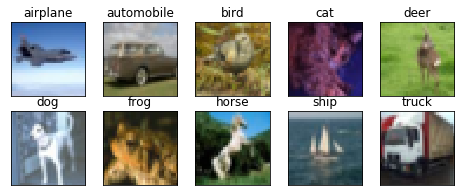

In [23]:
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(features_idx[img_num,::])
plt.show()

In [24]:
print(np.shape(train_labels))
train_labels = keras.utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes)
print(np.shape(train_labels))


(50000, 1)
(50000, 10)


In [30]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [32]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

model.fit(train_features,train_labels,
              batch_size=128,
              epochs=5,
              validation_data=(test_features, test_labels),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5


  128/50000 [..............................] - ETA: 4:08 - loss: 2.3042 - acc: 0.0781

  256/50000 [..............................] - ETA: 3:48 - loss: 2.3029 - acc: 0.0898

  384/50000 [..............................] - ETA: 3:36 - loss: 2.3021 - acc: 0.0990

  512/50000 [..............................] - ETA: 3:30 - loss: 2.3025 - acc: 0.0957

  640/50000 [..............................] - ETA: 3:27 - loss: 2.3024 - acc: 0.0953

  768/50000 [..............................] - ETA: 3:24 - loss: 2.3022 - acc: 0.0924

  896/50000 [..............................] - ETA: 3:22 - loss: 2.3027 - acc: 0.0904

 1024/50000 [..............................] - ETA: 3:20 - loss: 2.3027 - acc: 0.0908

 1152/50000 [..............................] - ETA: 3:19 - loss: 2.3025 - acc: 0.0946

 1280/50000 [..............................] - ETA: 3:17 - loss: 2.3025 - acc: 0.0930

 1408/50000 [..............................] - ETA: 3:16 - loss: 2.3026 - acc: 0.0902

 1536/50000 [..............................] - ETA: 3:15 - loss: 2.3026 - acc: 0.0924

 1664/50000 [..............................] - ETA: 3:14 - loss: 2.3026 - acc: 0.0950

 1792/50000 [>.............................] - ETA: 3:13 - loss: 2.3025 - acc: 0.0949

 1920/50000 [>.............................] - ETA: 3:13 - loss: 2.3025 - acc: 0.0964

 2048/50000 [>.............................] - ETA: 3:12 - loss: 2.3026 - acc: 0.0952

 2176/50000 [>.............................] - ETA: 3:11 - loss: 2.3027 - acc: 0.0960

 2304/50000 [>.............................] - ETA: 3:10 - loss: 2.3026 - acc: 0.0964

 2432/50000 [>.............................] - ETA: 3:10 - loss: 2.3026 - acc: 0.0954

 2560/50000 [>.............................] - ETA: 3:09 - loss: 2.3027 - acc: 0.0961

 2688/50000 [>.............................] - ETA: 3:08 - loss: 2.3027 - acc: 0.0956

 2816/50000 [>.............................] - ETA: 3:08 - loss: 2.3027 - acc: 0.0930

 2944/50000 [>.............................] - ETA: 3:07 - loss: 2.3028 - acc: 0.0944

 3072/50000 [>.............................] - ETA: 3:06 - loss: 2.3028 - acc: 0.0941

 3200/50000 [>.............................] - ETA: 3:06 - loss: 2.3028 - acc: 0.0944

 3328/50000 [>.............................] - ETA: 3:06 - loss: 2.3028 - acc: 0.0947

 3456/50000 [=>............................] - ETA: 3:05 - loss: 2.3028 - acc: 0.0943

 3584/50000 [=>............................] - ETA: 3:05 - loss: 2.3028 - acc: 0.0940

 3712/50000 [=>............................] - ETA: 3:04 - loss: 2.3028 - acc: 0.0927

 3840/50000 [=>............................] - ETA: 3:03 - loss: 2.3028 - acc: 0.0938

 3968/50000 [=>............................] - ETA: 3:03 - loss: 2.3028 - acc: 0.0943

 4096/50000 [=>............................] - ETA: 3:02 - loss: 2.3028 - acc: 0.0933

 4224/50000 [=>............................] - ETA: 3:02 - loss: 2.3028 - acc: 0.0940

 4352/50000 [=>............................] - ETA: 3:03 - loss: 2.3028 - acc: 0.0940

 4480/50000 [=>............................] - ETA: 3:04 - loss: 2.3028 - acc: 0.0955

 4608/50000 [=>............................] - ETA: 3:05 - loss: 2.3028 - acc: 0.0964

 4736/50000 [=>............................] - ETA: 3:05 - loss: 2.3028 - acc: 0.0965

 4864/50000 [=>............................] - ETA: 3:06 - loss: 2.3028 - acc: 0.0975

 4992/50000 [=>............................] - ETA: 3:07 - loss: 2.3028 - acc: 0.0972

 5120/50000 [==>...........................] - ETA: 3:10 - loss: 2.3028 - acc: 0.0977

 5248/50000 [==>...........................] - ETA: 3:11 - loss: 2.3028 - acc: 0.0966

 5376/50000 [==>...........................] - ETA: 3:12 - loss: 2.3028 - acc: 0.0962

 5504/50000 [==>...........................] - ETA: 3:11 - loss: 2.3028 - acc: 0.0959

 5632/50000 [==>...........................] - ETA: 3:11 - loss: 2.3028 - acc: 0.0959

 5760/50000 [==>...........................] - ETA: 3:10 - loss: 2.3028 - acc: 0.0964

 5888/50000 [==>...........................] - ETA: 3:11 - loss: 2.3028 - acc: 0.0961

 6016/50000 [==>...........................] - ETA: 3:10 - loss: 2.3028 - acc: 0.0966

 6144/50000 [==>...........................] - ETA: 3:09 - loss: 2.3027 - acc: 0.0968

 6272/50000 [==>...........................] - ETA: 3:10 - loss: 2.3027 - acc: 0.0963

 6400/50000 [==>...........................] - ETA: 3:09 - loss: 2.3027 - acc: 0.0961

 6528/50000 [==>...........................] - ETA: 3:09 - loss: 2.3027 - acc: 0.0965

 6656/50000 [==>...........................] - ETA: 3:09 - loss: 2.3027 - acc: 0.0971

 6784/50000 [===>..........................] - ETA: 3:08 - loss: 2.3027 - acc: 0.0971

 6912/50000 [===>..........................] - ETA: 3:08 - loss: 2.3027 - acc: 0.0978

 7040/50000 [===>..........................] - ETA: 3:07 - loss: 2.3027 - acc: 0.0987

 7168/50000 [===>..........................] - ETA: 3:06 - loss: 2.3026 - acc: 0.0988

 7296/50000 [===>..........................] - ETA: 3:06 - loss: 2.3026 - acc: 0.0985

 7424/50000 [===>..........................] - ETA: 3:05 - loss: 2.3026 - acc: 0.0987

 7552/50000 [===>..........................] - ETA: 3:05 - loss: 2.3026 - acc: 0.0983

 7680/50000 [===>..........................] - ETA: 3:04 - loss: 2.3026 - acc: 0.0979

 7808/50000 [===>..........................] - ETA: 3:03 - loss: 2.3026 - acc: 0.0982

 7936/50000 [===>..........................] - ETA: 3:03 - loss: 2.3026 - acc: 0.0985

 8064/50000 [===>..........................] - ETA: 3:02 - loss: 2.3026 - acc: 0.0990

 8192/50000 [===>..........................] - ETA: 3:02 - loss: 2.3027 - acc: 0.0994

 8320/50000 [===>..........................] - ETA: 3:01 - loss: 2.3026 - acc: 0.0992

 8448/50000 [====>.........................] - ETA: 3:00 - loss: 2.3026 - acc: 0.0993

 8576/50000 [====>.........................] - ETA: 3:00 - loss: 2.3026 - acc: 0.0990

 8704/50000 [====>.........................] - ETA: 3:00 - loss: 2.3026 - acc: 0.0987

 8832/50000 [====>.........................] - ETA: 3:00 - loss: 2.3026 - acc: 0.0988

 8960/50000 [====>.........................] - ETA: 3:00 - loss: 2.3026 - acc: 0.0989

 9088/50000 [====>.........................] - ETA: 2:59 - loss: 2.3026 - acc: 0.0999

 9216/50000 [====>.........................] - ETA: 2:59 - loss: 2.3026 - acc: 0.0999

 9344/50000 [====>.........................] - ETA: 2:58 - loss: 2.3026 - acc: 0.0999

 9472/50000 [====>.........................] - ETA: 2:58 - loss: 2.3026 - acc: 0.1001

 9600/50000 [====>.........................] - ETA: 2:57 - loss: 2.3026 - acc: 0.1003

 9728/50000 [====>.........................] - ETA: 2:57 - loss: 2.3026 - acc: 0.1013

 9856/50000 [====>.........................] - ETA: 2:56 - loss: 2.3026 - acc: 0.1012

 9984/50000 [====>.........................] - ETA: 2:56 - loss: 2.3025 - acc: 0.1020

10112/50000 [=====>........................] - ETA: 2:56 - loss: 2.3025 - acc: 0.1016

10240/50000 [=====>........................] - ETA: 2:55 - loss: 2.3025 - acc: 0.1017

10368/50000 [=====>........................] - ETA: 2:55 - loss: 2.3025 - acc: 0.1014

10496/50000 [=====>........................] - ETA: 2:55 - loss: 2.3026 - acc: 0.1013

10624/50000 [=====>........................] - ETA: 2:55 - loss: 2.3025 - acc: 0.1013

10752/50000 [=====>........................] - ETA: 2:55 - loss: 2.3026 - acc: 0.1013

10880/50000 [=====>........................] - ETA: 2:54 - loss: 2.3026 - acc: 0.1012

11008/50000 [=====>........................] - ETA: 2:53 - loss: 2.3025 - acc: 0.1015

11136/50000 [=====>........................] - ETA: 2:53 - loss: 2.3025 - acc: 0.1021

11264/50000 [=====>........................] - ETA: 2:52 - loss: 2.3025 - acc: 0.1028

11392/50000 [=====>........................] - ETA: 2:51 - loss: 2.3025 - acc: 0.1034

11520/50000 [=====>........................] - ETA: 2:51 - loss: 2.3025 - acc: 0.1040

11648/50000 [=====>........................] - ETA: 2:50 - loss: 2.3025 - acc: 0.1042

11776/50000 [======>.......................] - ETA: 2:50 - loss: 2.3025 - acc: 0.1044

11904/50000 [======>.......................] - ETA: 2:49 - loss: 2.3025 - acc: 0.1044

12032/50000 [======>.......................] - ETA: 2:48 - loss: 2.3025 - acc: 0.1044

12160/50000 [======>.......................] - ETA: 2:48 - loss: 2.3025 - acc: 0.1049

12288/50000 [======>.......................] - ETA: 2:47 - loss: 2.3025 - acc: 0.1047

12416/50000 [======>.......................] - ETA: 2:47 - loss: 2.3025 - acc: 0.1045

12544/50000 [======>.......................] - ETA: 2:46 - loss: 2.3025 - acc: 0.1044

12672/50000 [======>.......................] - ETA: 2:46 - loss: 2.3025 - acc: 0.1043

12800/50000 [======>.......................] - ETA: 2:45 - loss: 2.3025 - acc: 0.1046

12928/50000 [======>.......................] - ETA: 2:45 - loss: 2.3024 - acc: 0.1051

13056/50000 [======>.......................] - ETA: 2:44 - loss: 2.3024 - acc: 0.1059

13184/50000 [======>.......................] - ETA: 2:44 - loss: 2.3024 - acc: 0.1063

13312/50000 [======>.......................] - ETA: 2:43 - loss: 2.3024 - acc: 0.1061

13440/50000 [=======>......................] - ETA: 2:43 - loss: 2.3024 - acc: 0.1060

13568/50000 [=======>......................] - ETA: 2:42 - loss: 2.3024 - acc: 0.1061

13696/50000 [=======>......................] - ETA: 2:42 - loss: 2.3024 - acc: 0.1059

13824/50000 [=======>......................] - ETA: 2:41 - loss: 2.3023 - acc: 0.1064

13952/50000 [=======>......................] - ETA: 2:40 - loss: 2.3023 - acc: 0.1062

14080/50000 [=======>......................] - ETA: 2:40 - loss: 2.3023 - acc: 0.1060

14208/50000 [=======>......................] - ETA: 2:40 - loss: 2.3023 - acc: 0.1065

14336/50000 [=======>......................] - ETA: 2:39 - loss: 2.3023 - acc: 0.1065

14464/50000 [=======>......................] - ETA: 2:39 - loss: 2.3023 - acc: 0.1069

14592/50000 [=======>......................] - ETA: 2:38 - loss: 2.3022 - acc: 0.1070

14720/50000 [=======>......................] - ETA: 2:38 - loss: 2.3022 - acc: 0.1073

14848/50000 [=======>......................] - ETA: 2:37 - loss: 2.3022 - acc: 0.1074

14976/50000 [=======>......................] - ETA: 2:37 - loss: 2.3022 - acc: 0.1073

15104/50000 [========>.....................] - ETA: 2:36 - loss: 2.3022 - acc: 0.1074

15232/50000 [========>.....................] - ETA: 2:36 - loss: 2.3021 - acc: 0.1078

15360/50000 [========>.....................] - ETA: 2:36 - loss: 2.3021 - acc: 0.1081

15488/50000 [========>.....................] - ETA: 2:35 - loss: 2.3021 - acc: 0.1078

15616/50000 [========>.....................] - ETA: 2:34 - loss: 2.3021 - acc: 0.1078

15744/50000 [========>.....................] - ETA: 2:34 - loss: 2.3020 - acc: 0.1079

15872/50000 [========>.....................] - ETA: 2:33 - loss: 2.3020 - acc: 0.1079

16000/50000 [========>.....................] - ETA: 2:33 - loss: 2.3020 - acc: 0.1082

16128/50000 [========>.....................] - ETA: 2:32 - loss: 2.3020 - acc: 0.1087

16256/50000 [========>.....................] - ETA: 2:32 - loss: 2.3019 - acc: 0.1087

16384/50000 [========>.....................] - ETA: 2:31 - loss: 2.3019 - acc: 0.1091

16512/50000 [========>.....................] - ETA: 2:31 - loss: 2.3019 - acc: 0.1096

16640/50000 [========>.....................] - ETA: 2:30 - loss: 2.3018 - acc: 0.1098

16768/50000 [=========>....................] - ETA: 2:30 - loss: 2.3018 - acc: 0.1102

16896/50000 [=========>....................] - ETA: 2:29 - loss: 2.3018 - acc: 0.1102

17024/50000 [=========>....................] - ETA: 2:29 - loss: 2.3017 - acc: 0.1104

17152/50000 [=========>....................] - ETA: 2:28 - loss: 2.3017 - acc: 0.1105

17280/50000 [=========>....................] - ETA: 2:28 - loss: 2.3017 - acc: 0.1105

17408/50000 [=========>....................] - ETA: 2:27 - loss: 2.3016 - acc: 0.1104

17536/50000 [=========>....................] - ETA: 2:26 - loss: 2.3016 - acc: 0.1106

17664/50000 [=========>....................] - ETA: 2:26 - loss: 2.3016 - acc: 0.1114

17792/50000 [=========>....................] - ETA: 2:25 - loss: 2.3015 - acc: 0.1113

17920/50000 [=========>....................] - ETA: 2:25 - loss: 2.3015 - acc: 0.1114

18048/50000 [=========>....................] - ETA: 2:24 - loss: 2.3014 - acc: 0.1116

18176/50000 [=========>....................] - ETA: 2:24 - loss: 2.3014 - acc: 0.1120

18304/50000 [=========>....................] - ETA: 2:23 - loss: 2.3013 - acc: 0.1125

18432/50000 [==========>...................] - ETA: 2:23 - loss: 2.3013 - acc: 0.1125

18560/50000 [==========>...................] - ETA: 2:22 - loss: 2.3012 - acc: 0.1129

18688/50000 [==========>...................] - ETA: 2:22 - loss: 2.3011 - acc: 0.1132

18816/50000 [==========>...................] - ETA: 2:21 - loss: 2.3011 - acc: 0.1131

18944/50000 [==========>...................] - ETA: 2:21 - loss: 2.3011 - acc: 0.1132

19072/50000 [==========>...................] - ETA: 2:20 - loss: 2.3010 - acc: 0.1133

19200/50000 [==========>...................] - ETA: 2:20 - loss: 2.3010 - acc: 0.1135

19328/50000 [==========>...................] - ETA: 2:19 - loss: 2.3009 - acc: 0.1138

19456/50000 [==========>...................] - ETA: 2:19 - loss: 2.3008 - acc: 0.1141

19584/50000 [==========>...................] - ETA: 2:18 - loss: 2.3008 - acc: 0.1142

19712/50000 [==========>...................] - ETA: 2:18 - loss: 2.3007 - acc: 0.1144

19840/50000 [==========>...................] - ETA: 2:17 - loss: 2.3006 - acc: 0.1149

19968/50000 [==========>...................] - ETA: 2:17 - loss: 2.3005 - acc: 0.1151

20096/50000 [===========>..................] - ETA: 2:16 - loss: 2.3005 - acc: 0.1151

20224/50000 [===========>..................] - ETA: 2:16 - loss: 2.3004 - acc: 0.1156

20352/50000 [===========>..................] - ETA: 2:15 - loss: 2.3003 - acc: 0.1158

20480/50000 [===========>..................] - ETA: 2:15 - loss: 2.3003 - acc: 0.1163

20608/50000 [===========>..................] - ETA: 2:14 - loss: 2.3002 - acc: 0.1164

20736/50000 [===========>..................] - ETA: 2:14 - loss: 2.3001 - acc: 0.1167

20864/50000 [===========>..................] - ETA: 2:13 - loss: 2.3000 - acc: 0.1172

20992/50000 [===========>..................] - ETA: 2:13 - loss: 2.2999 - acc: 0.1170

21120/50000 [===========>..................] - ETA: 2:12 - loss: 2.2998 - acc: 0.1177

21248/50000 [===========>..................] - ETA: 2:12 - loss: 2.2997 - acc: 0.1178

21376/50000 [===========>..................] - ETA: 2:11 - loss: 2.2996 - acc: 0.1182

21504/50000 [===========>..................] - ETA: 2:11 - loss: 2.2995 - acc: 0.1185

21632/50000 [===========>..................] - ETA: 2:10 - loss: 2.2994 - acc: 0.1189

21760/50000 [============>.................] - ETA: 2:10 - loss: 2.2994 - acc: 0.1193

21888/50000 [============>.................] - ETA: 2:09 - loss: 2.2993 - acc: 0.1195

22016/50000 [============>.................] - ETA: 2:08 - loss: 2.2992 - acc: 0.1196

22144/50000 [============>.................] - ETA: 2:08 - loss: 2.2990 - acc: 0.1200

22272/50000 [============>.................] - ETA: 2:07 - loss: 2.2989 - acc: 0.1205

22400/50000 [============>.................] - ETA: 2:06 - loss: 2.2987 - acc: 0.1206

22528/50000 [============>.................] - ETA: 2:06 - loss: 2.2985 - acc: 0.1215

22656/50000 [============>.................] - ETA: 2:05 - loss: 2.2984 - acc: 0.1217

22784/50000 [============>.................] - ETA: 2:05 - loss: 2.2983 - acc: 0.1218

22912/50000 [============>.................] - ETA: 2:04 - loss: 2.2981 - acc: 0.1221

23040/50000 [============>.................] - ETA: 2:03 - loss: 2.2979 - acc: 0.1225

23168/50000 [============>.................] - ETA: 2:03 - loss: 2.2978 - acc: 0.1228

23296/50000 [============>.................] - ETA: 2:02 - loss: 2.2976 - acc: 0.1233

23424/50000 [=============>................] - ETA: 2:01 - loss: 2.2975 - acc: 0.1234

23552/50000 [=============>................] - ETA: 2:01 - loss: 2.2974 - acc: 0.1234

23680/50000 [=============>................] - ETA: 2:00 - loss: 2.2972 - acc: 0.1240

23808/50000 [=============>................] - ETA: 2:00 - loss: 2.2970 - acc: 0.1243

23936/50000 [=============>................] - ETA: 1:59 - loss: 2.2968 - acc: 0.1250

24064/50000 [=============>................] - ETA: 1:58 - loss: 2.2966 - acc: 0.1255

24192/50000 [=============>................] - ETA: 1:58 - loss: 2.2964 - acc: 0.1260

24320/50000 [=============>................] - ETA: 1:57 - loss: 2.2963 - acc: 0.1261

24448/50000 [=============>................] - ETA: 1:57 - loss: 2.2960 - acc: 0.1268

24576/50000 [=============>................] - ETA: 1:56 - loss: 2.2959 - acc: 0.1269

24704/50000 [=============>................] - ETA: 1:55 - loss: 2.2957 - acc: 0.1272

24832/50000 [=============>................] - ETA: 1:55 - loss: 2.2955 - acc: 0.1272

24960/50000 [=============>................] - ETA: 1:54 - loss: 2.2952 - acc: 0.1273

25088/50000 [==============>...............] - ETA: 1:53 - loss: 2.2950 - acc: 0.1276

25216/50000 [==============>...............] - ETA: 1:53 - loss: 2.2947 - acc: 0.1279

25344/50000 [==============>...............] - ETA: 1:52 - loss: 2.2944 - acc: 0.1285

25472/50000 [==============>...............] - ETA: 1:52 - loss: 2.2942 - acc: 0.1288

25600/50000 [==============>...............] - ETA: 1:51 - loss: 2.2939 - acc: 0.1293

25728/50000 [==============>...............] - ETA: 1:50 - loss: 2.2937 - acc: 0.1295

25856/50000 [==============>...............] - ETA: 1:50 - loss: 2.2935 - acc: 0.1300

25984/50000 [==============>...............] - ETA: 1:49 - loss: 2.2933 - acc: 0.1301

26112/50000 [==============>...............] - ETA: 1:49 - loss: 2.2930 - acc: 0.1302

26240/50000 [==============>...............] - ETA: 1:48 - loss: 2.2927 - acc: 0.1303

26368/50000 [==============>...............] - ETA: 1:47 - loss: 2.2925 - acc: 0.1306

26496/50000 [==============>...............] - ETA: 1:47 - loss: 2.2922 - acc: 0.1310

26624/50000 [==============>...............] - ETA: 1:46 - loss: 2.2920 - acc: 0.1312

26752/50000 [===============>..............] - ETA: 1:46 - loss: 2.2916 - acc: 0.1320

26880/50000 [===============>..............] - ETA: 1:45 - loss: 2.2912 - acc: 0.1324

27008/50000 [===============>..............] - ETA: 1:44 - loss: 2.2910 - acc: 0.1325

27136/50000 [===============>..............] - ETA: 1:44 - loss: 2.2906 - acc: 0.1329

27264/50000 [===============>..............] - ETA: 1:43 - loss: 2.2904 - acc: 0.1332

27392/50000 [===============>..............] - ETA: 1:43 - loss: 2.2901 - acc: 0.1335

27520/50000 [===============>..............] - ETA: 1:42 - loss: 2.2898 - acc: 0.1338

27648/50000 [===============>..............] - ETA: 1:41 - loss: 2.2895 - acc: 0.1340

27776/50000 [===============>..............] - ETA: 1:41 - loss: 2.2891 - acc: 0.1344

27904/50000 [===============>..............] - ETA: 1:40 - loss: 2.2888 - acc: 0.1348

28032/50000 [===============>..............] - ETA: 1:39 - loss: 2.2884 - acc: 0.1350

28160/50000 [===============>..............] - ETA: 1:39 - loss: 2.2883 - acc: 0.1352

28288/50000 [===============>..............] - ETA: 1:38 - loss: 2.2882 - acc: 0.1352

28416/50000 [================>.............] - ETA: 1:38 - loss: 2.2878 - acc: 0.1354

28544/50000 [================>.............] - ETA: 1:37 - loss: 2.2877 - acc: 0.1353

28672/50000 [================>.............] - ETA: 1:36 - loss: 2.2872 - acc: 0.1362

28800/50000 [================>.............] - ETA: 1:36 - loss: 2.2868 - acc: 0.1363

28928/50000 [================>.............] - ETA: 1:35 - loss: 2.2865 - acc: 0.1363

29056/50000 [================>.............] - ETA: 1:35 - loss: 2.2861 - acc: 0.1367

29184/50000 [================>.............] - ETA: 1:34 - loss: 2.2858 - acc: 0.1370

29312/50000 [================>.............] - ETA: 1:33 - loss: 2.2856 - acc: 0.1372

29440/50000 [================>.............] - ETA: 1:33 - loss: 2.2852 - acc: 0.1377

29568/50000 [================>.............] - ETA: 1:32 - loss: 2.2849 - acc: 0.1378

29696/50000 [================>.............] - ETA: 1:32 - loss: 2.2845 - acc: 0.1383

29824/50000 [================>.............] - ETA: 1:31 - loss: 2.2842 - acc: 0.1384

29952/50000 [================>.............] - ETA: 1:30 - loss: 2.2839 - acc: 0.1390

30080/50000 [=================>............] - ETA: 1:30 - loss: 2.2835 - acc: 0.1394

30208/50000 [=================>............] - ETA: 1:29 - loss: 2.2832 - acc: 0.1397

30336/50000 [=================>............] - ETA: 1:29 - loss: 2.2830 - acc: 0.1398

30464/50000 [=================>............] - ETA: 1:28 - loss: 2.2826 - acc: 0.1400

30592/50000 [=================>............] - ETA: 1:27 - loss: 2.2824 - acc: 0.1403

30720/50000 [=================>............] - ETA: 1:27 - loss: 2.2820 - acc: 0.1404

30848/50000 [=================>............] - ETA: 1:26 - loss: 2.2816 - acc: 0.1406

30976/50000 [=================>............] - ETA: 1:26 - loss: 2.2813 - acc: 0.1408

31104/50000 [=================>............] - ETA: 1:25 - loss: 2.2811 - acc: 0.1409

31232/50000 [=================>............] - ETA: 1:24 - loss: 2.2808 - acc: 0.1412

31360/50000 [=================>............] - ETA: 1:24 - loss: 2.2804 - acc: 0.1415

31488/50000 [=================>............] - ETA: 1:23 - loss: 2.2799 - acc: 0.1419

31616/50000 [=================>............] - ETA: 1:23 - loss: 2.2796 - acc: 0.1420

31744/50000 [==================>...........] - ETA: 1:22 - loss: 2.2793 - acc: 0.1421

31872/50000 [==================>...........] - ETA: 1:21 - loss: 2.2790 - acc: 0.1423

32000/50000 [==================>...........] - ETA: 1:21 - loss: 2.2787 - acc: 0.1427

32128/50000 [==================>...........] - ETA: 1:20 - loss: 2.2782 - acc: 0.1432

32256/50000 [==================>...........] - ETA: 1:20 - loss: 2.2778 - acc: 0.1434

32384/50000 [==================>...........] - ETA: 1:19 - loss: 2.2775 - acc: 0.1438

32512/50000 [==================>...........] - ETA: 1:18 - loss: 2.2771 - acc: 0.1440

32640/50000 [==================>...........] - ETA: 1:18 - loss: 2.2769 - acc: 0.1441

32768/50000 [==================>...........] - ETA: 1:17 - loss: 2.2764 - acc: 0.1442

32896/50000 [==================>...........] - ETA: 1:17 - loss: 2.2761 - acc: 0.1443

33024/50000 [==================>...........] - ETA: 1:16 - loss: 2.2758 - acc: 0.1445

33152/50000 [==================>...........] - ETA: 1:16 - loss: 2.2754 - acc: 0.1448

33280/50000 [==================>...........] - ETA: 1:15 - loss: 2.2750 - acc: 0.1451

33408/50000 [===================>..........] - ETA: 1:14 - loss: 2.2748 - acc: 0.1452

33536/50000 [===================>..........] - ETA: 1:14 - loss: 2.2743 - acc: 0.1456

33664/50000 [===================>..........] - ETA: 1:13 - loss: 2.2738 - acc: 0.1459

33792/50000 [===================>..........] - ETA: 1:13 - loss: 2.2734 - acc: 0.1462

33920/50000 [===================>..........] - ETA: 1:12 - loss: 2.2731 - acc: 0.1463

34048/50000 [===================>..........] - ETA: 1:11 - loss: 2.2727 - acc: 0.1465

34176/50000 [===================>..........] - ETA: 1:11 - loss: 2.2724 - acc: 0.1465

34304/50000 [===================>..........] - ETA: 1:10 - loss: 2.2721 - acc: 0.1467

34432/50000 [===================>..........] - ETA: 1:10 - loss: 2.2717 - acc: 0.1471

34560/50000 [===================>..........] - ETA: 1:09 - loss: 2.2713 - acc: 0.1472

34688/50000 [===================>..........] - ETA: 1:08 - loss: 2.2709 - acc: 0.1475

34816/50000 [===================>..........] - ETA: 1:08 - loss: 2.2708 - acc: 0.1476

34944/50000 [===================>..........] - ETA: 1:07 - loss: 2.2703 - acc: 0.1482

35072/50000 [====================>.........] - ETA: 1:07 - loss: 2.2698 - acc: 0.1485

35200/50000 [====================>.........] - ETA: 1:06 - loss: 2.2693 - acc: 0.1488

35328/50000 [====================>.........] - ETA: 1:06 - loss: 2.2691 - acc: 0.1488

35456/50000 [====================>.........] - ETA: 1:05 - loss: 2.2690 - acc: 0.1489

35584/50000 [====================>.........] - ETA: 1:04 - loss: 2.2686 - acc: 0.1490

35712/50000 [====================>.........] - ETA: 1:04 - loss: 2.2682 - acc: 0.1492

35840/50000 [====================>.........] - ETA: 1:03 - loss: 2.2680 - acc: 0.1494

35968/50000 [====================>.........] - ETA: 1:03 - loss: 2.2677 - acc: 0.1496

36096/50000 [====================>.........] - ETA: 1:02 - loss: 2.2673 - acc: 0.1499

36224/50000 [====================>.........] - ETA: 1:01 - loss: 2.2668 - acc: 0.1502

36352/50000 [====================>.........] - ETA: 1:01 - loss: 2.2663 - acc: 0.1504

36480/50000 [====================>.........] - ETA: 1:00 - loss: 2.2659 - acc: 0.1508

36608/50000 [====================>.........] - ETA: 1:00 - loss: 2.2653 - acc: 0.1511

36736/50000 [=====================>........] - ETA: 59s - loss: 2.2650 - acc: 0.1511 

36864/50000 [=====================>........] - ETA: 58s - loss: 2.2646 - acc: 0.1514

36992/50000 [=====================>........] - ETA: 58s - loss: 2.2641 - acc: 0.1517

37120/50000 [=====================>........] - ETA: 57s - loss: 2.2639 - acc: 0.1519

37248/50000 [=====================>........] - ETA: 57s - loss: 2.2638 - acc: 0.1522

37376/50000 [=====================>........] - ETA: 56s - loss: 2.2633 - acc: 0.1525

37504/50000 [=====================>........] - ETA: 56s - loss: 2.2630 - acc: 0.1526

37632/50000 [=====================>........] - ETA: 55s - loss: 2.2627 - acc: 0.1527

37760/50000 [=====================>........] - ETA: 54s - loss: 2.2623 - acc: 0.1530

37888/50000 [=====================>........] - ETA: 54s - loss: 2.2619 - acc: 0.1531

38016/50000 [=====================>........] - ETA: 53s - loss: 2.2617 - acc: 0.1533

38144/50000 [=====================>........] - ETA: 53s - loss: 2.2613 - acc: 0.1535

38272/50000 [=====================>........] - ETA: 52s - loss: 2.2610 - acc: 0.1536

38400/50000 [======================>.......] - ETA: 51s - loss: 2.2608 - acc: 0.1537

38528/50000 [======================>.......] - ETA: 51s - loss: 2.2604 - acc: 0.1538

38656/50000 [======================>.......] - ETA: 50s - loss: 2.2598 - acc: 0.1540

38784/50000 [======================>.......] - ETA: 50s - loss: 2.2592 - acc: 0.1544

38912/50000 [======================>.......] - ETA: 49s - loss: 2.2588 - acc: 0.1545

39040/50000 [======================>.......] - ETA: 49s - loss: 2.2586 - acc: 0.1546

39168/50000 [======================>.......] - ETA: 48s - loss: 2.2582 - acc: 0.1550

39296/50000 [======================>.......] - ETA: 48s - loss: 2.2577 - acc: 0.1555

39424/50000 [======================>.......] - ETA: 47s - loss: 2.2572 - acc: 0.1557

39552/50000 [======================>.......] - ETA: 46s - loss: 2.2568 - acc: 0.1559

39680/50000 [======================>.......] - ETA: 46s - loss: 2.2565 - acc: 0.1561

39808/50000 [======================>.......] - ETA: 45s - loss: 2.2561 - acc: 0.1563

39936/50000 [======================>.......] - ETA: 45s - loss: 2.2557 - acc: 0.1565

40064/50000 [=======================>......] - ETA: 44s - loss: 2.2555 - acc: 0.1567

40192/50000 [=======================>......] - ETA: 44s - loss: 2.2551 - acc: 0.1570

40320/50000 [=======================>......] - ETA: 43s - loss: 2.2547 - acc: 0.1572

40448/50000 [=======================>......] - ETA: 42s - loss: 2.2541 - acc: 0.1576

40576/50000 [=======================>......] - ETA: 42s - loss: 2.2538 - acc: 0.1577

40704/50000 [=======================>......] - ETA: 41s - loss: 2.2532 - acc: 0.1580

40832/50000 [=======================>......] - ETA: 41s - loss: 2.2528 - acc: 0.1583

40960/50000 [=======================>......] - ETA: 40s - loss: 2.2526 - acc: 0.1584

41088/50000 [=======================>......] - ETA: 40s - loss: 2.2523 - acc: 0.1586

41216/50000 [=======================>......] - ETA: 39s - loss: 2.2519 - acc: 0.1587

41344/50000 [=======================>......] - ETA: 38s - loss: 2.2518 - acc: 0.1588

41472/50000 [=======================>......] - ETA: 38s - loss: 2.2512 - acc: 0.1592

41600/50000 [=======================>......] - ETA: 37s - loss: 2.2511 - acc: 0.1593

41728/50000 [========================>.....] - ETA: 37s - loss: 2.2507 - acc: 0.1595

41856/50000 [========================>.....] - ETA: 36s - loss: 2.2505 - acc: 0.1596

41984/50000 [========================>.....] - ETA: 35s - loss: 2.2502 - acc: 0.1598

42112/50000 [========================>.....] - ETA: 35s - loss: 2.2500 - acc: 0.1599

42240/50000 [========================>.....] - ETA: 34s - loss: 2.2495 - acc: 0.1601

42368/50000 [========================>.....] - ETA: 34s - loss: 2.2490 - acc: 0.1603

42496/50000 [========================>.....] - ETA: 33s - loss: 2.2489 - acc: 0.1604

42624/50000 [========================>.....] - ETA: 33s - loss: 2.2485 - acc: 0.1606

42752/50000 [========================>.....] - ETA: 32s - loss: 2.2480 - acc: 0.1609

42880/50000 [========================>.....] - ETA: 31s - loss: 2.2475 - acc: 0.1612

43008/50000 [========================>.....] - ETA: 31s - loss: 2.2472 - acc: 0.1613

43136/50000 [========================>.....] - ETA: 30s - loss: 2.2467 - acc: 0.1615

43264/50000 [========================>.....] - ETA: 30s - loss: 2.2464 - acc: 0.1618

43392/50000 [=========================>....] - ETA: 29s - loss: 2.2459 - acc: 0.1620

43520/50000 [=========================>....] - ETA: 29s - loss: 2.2458 - acc: 0.1621

43648/50000 [=========================>....] - ETA: 28s - loss: 2.2454 - acc: 0.1624

43776/50000 [=========================>....] - ETA: 27s - loss: 2.2450 - acc: 0.1626

43904/50000 [=========================>....] - ETA: 27s - loss: 2.2448 - acc: 0.1627

44032/50000 [=========================>....] - ETA: 26s - loss: 2.2444 - acc: 0.1629

44160/50000 [=========================>....] - ETA: 26s - loss: 2.2440 - acc: 0.1630

44288/50000 [=========================>....] - ETA: 25s - loss: 2.2438 - acc: 0.1632

44416/50000 [=========================>....] - ETA: 25s - loss: 2.2434 - acc: 0.1635

44544/50000 [=========================>....] - ETA: 24s - loss: 2.2430 - acc: 0.1636

44672/50000 [=========================>....] - ETA: 23s - loss: 2.2429 - acc: 0.1635

44800/50000 [=========================>....] - ETA: 23s - loss: 2.2424 - acc: 0.1638

44928/50000 [=========================>....] - ETA: 22s - loss: 2.2420 - acc: 0.1642

45056/50000 [==========================>...] - ETA: 22s - loss: 2.2415 - acc: 0.1644

45184/50000 [==========================>...] - ETA: 21s - loss: 2.2412 - acc: 0.1645

45312/50000 [==========================>...] - ETA: 20s - loss: 2.2408 - acc: 0.1647

45440/50000 [==========================>...] - ETA: 20s - loss: 2.2406 - acc: 0.1649

45568/50000 [==========================>...] - ETA: 19s - loss: 2.2404 - acc: 0.1649

45696/50000 [==========================>...] - ETA: 19s - loss: 2.2402 - acc: 0.1651

45824/50000 [==========================>...] - ETA: 18s - loss: 2.2399 - acc: 0.1653

45952/50000 [==========================>...] - ETA: 18s - loss: 2.2395 - acc: 0.1657

46080/50000 [==========================>...] - ETA: 17s - loss: 2.2394 - acc: 0.1658

46208/50000 [==========================>...] - ETA: 16s - loss: 2.2392 - acc: 0.1661

46336/50000 [==========================>...] - ETA: 16s - loss: 2.2388 - acc: 0.1664

46464/50000 [==========================>...] - ETA: 15s - loss: 2.2384 - acc: 0.1666

46592/50000 [==========================>...] - ETA: 15s - loss: 2.2381 - acc: 0.1669

46720/50000 [===========================>..] - ETA: 14s - loss: 2.2378 - acc: 0.1670

46848/50000 [===========================>..] - ETA: 14s - loss: 2.2375 - acc: 0.1672

46976/50000 [===========================>..] - ETA: 13s - loss: 2.2371 - acc: 0.1674

47104/50000 [===========================>..] - ETA: 12s - loss: 2.2364 - acc: 0.1678

47232/50000 [===========================>..] - ETA: 12s - loss: 2.2363 - acc: 0.1678

47360/50000 [===========================>..] - ETA: 11s - loss: 2.2362 - acc: 0.1678

47488/50000 [===========================>..] - ETA: 11s - loss: 2.2359 - acc: 0.1680

47616/50000 [===========================>..] - ETA: 10s - loss: 2.2355 - acc: 0.1682

47744/50000 [===========================>..] - ETA: 10s - loss: 2.2355 - acc: 0.1684

47872/50000 [===========================>..] - ETA: 9s - loss: 2.2351 - acc: 0.1687 

48000/50000 [===========================>..] - ETA: 8s - loss: 2.2347 - acc: 0.1688

48128/50000 [===========================>..] - ETA: 8s - loss: 2.2342 - acc: 0.1690

48256/50000 [===========================>..] - ETA: 7s - loss: 2.2339 - acc: 0.1691

48384/50000 [============================>.] - ETA: 7s - loss: 2.2336 - acc: 0.1692

48512/50000 [============================>.] - ETA: 6s - loss: 2.2333 - acc: 0.1693

48640/50000 [============================>.] - ETA: 6s - loss: 2.2331 - acc: 0.1695

48768/50000 [============================>.] - ETA: 5s - loss: 2.2328 - acc: 0.1697

48896/50000 [============================>.] - ETA: 4s - loss: 2.2325 - acc: 0.1696

49024/50000 [============================>.] - ETA: 4s - loss: 2.2322 - acc: 0.1698

49152/50000 [============================>.] - ETA: 3s - loss: 2.2318 - acc: 0.1699

49280/50000 [============================>.] - ETA: 3s - loss: 2.2316 - acc: 0.1700

49408/50000 [============================>.] - ETA: 2s - loss: 2.2314 - acc: 0.1701

49536/50000 [============================>.] - ETA: 2s - loss: 2.2311 - acc: 0.1702

49664/50000 [============================>.] - ETA: 1s - loss: 2.2308 - acc: 0.1704

49792/50000 [============================>.] - ETA: 0s - loss: 2.2305 - acc: 0.1705

49920/50000 [============================>.] - ETA: 0s - loss: 2.2301 - acc: 0.1706

50000/50000 [==============================] - 237s 5ms/step - loss: 2.2299 - acc: 0.1707 - val_loss: 2.0894 - val_acc: 0.2472


Epoch 2/5


  128/50000 [..............................] - ETA: 3:50 - loss: 2.0766 - acc: 0.2266

  256/50000 [..............................] - ETA: 3:46 - loss: 2.1049 - acc: 0.2461

  384/50000 [..............................] - ETA: 3:45 - loss: 2.1213 - acc: 0.2344

  512/50000 [..............................] - ETA: 3:43 - loss: 2.1286 - acc: 0.2324

  640/50000 [..............................] - ETA: 3:42 - loss: 2.1236 - acc: 0.2281

  768/50000 [..............................] - ETA: 3:41 - loss: 2.1073 - acc: 0.2357

  896/50000 [..............................] - ETA: 3:40 - loss: 2.1014 - acc: 0.2467

 1024/50000 [..............................] - ETA: 3:40 - loss: 2.1016 - acc: 0.2402

 1152/50000 [..............................] - ETA: 3:39 - loss: 2.1026 - acc: 0.2396

 1280/50000 [..............................] - ETA: 3:38 - loss: 2.1004 - acc: 0.2437

 1408/50000 [..............................] - ETA: 3:37 - loss: 2.1008 - acc: 0.2457

 1536/50000 [..............................] - ETA: 3:36 - loss: 2.1110 - acc: 0.2409

 1664/50000 [..............................] - ETA: 3:35 - loss: 2.1097 - acc: 0.2434

 1792/50000 [>.............................] - ETA: 3:34 - loss: 2.1138 - acc: 0.2400

 1920/50000 [>.............................] - ETA: 3:34 - loss: 2.1171 - acc: 0.2385

 2048/50000 [>.............................] - ETA: 3:34 - loss: 2.1144 - acc: 0.2368

 2176/50000 [>.............................] - ETA: 3:34 - loss: 2.1084 - acc: 0.2408

 2304/50000 [>.............................] - ETA: 3:34 - loss: 2.1081 - acc: 0.2409

 2432/50000 [>.............................] - ETA: 3:32 - loss: 2.1042 - acc: 0.2414

 2560/50000 [>.............................] - ETA: 3:32 - loss: 2.1068 - acc: 0.2398

 2688/50000 [>.............................] - ETA: 3:30 - loss: 2.1032 - acc: 0.2418

 2816/50000 [>.............................] - ETA: 3:30 - loss: 2.1000 - acc: 0.2436

 2944/50000 [>.............................] - ETA: 3:29 - loss: 2.0967 - acc: 0.2439

 3072/50000 [>.............................] - ETA: 3:28 - loss: 2.0978 - acc: 0.2441

 3200/50000 [>.............................] - ETA: 3:27 - loss: 2.0996 - acc: 0.2428

 3328/50000 [>.............................] - ETA: 3:26 - loss: 2.0998 - acc: 0.2422

 3456/50000 [=>............................] - ETA: 3:25 - loss: 2.1025 - acc: 0.2419

 3584/50000 [=>............................] - ETA: 3:24 - loss: 2.1011 - acc: 0.2422

 3712/50000 [=>............................] - ETA: 3:23 - loss: 2.1031 - acc: 0.2435

 3840/50000 [=>............................] - ETA: 3:23 - loss: 2.1072 - acc: 0.2422

 3968/50000 [=>............................] - ETA: 3:22 - loss: 2.1064 - acc: 0.2422

 4096/50000 [=>............................] - ETA: 3:22 - loss: 2.1079 - acc: 0.2424

 4224/50000 [=>............................] - ETA: 3:21 - loss: 2.1063 - acc: 0.2410

 4352/50000 [=>............................] - ETA: 3:20 - loss: 2.1078 - acc: 0.2399

 4480/50000 [=>............................] - ETA: 3:20 - loss: 2.1049 - acc: 0.2400

 4608/50000 [=>............................] - ETA: 3:20 - loss: 2.1084 - acc: 0.2396

 4736/50000 [=>............................] - ETA: 3:19 - loss: 2.1084 - acc: 0.2397

 4864/50000 [=>............................] - ETA: 3:18 - loss: 2.1103 - acc: 0.2375

 4992/50000 [=>............................] - ETA: 3:18 - loss: 2.1090 - acc: 0.2380

 5120/50000 [==>...........................] - ETA: 3:17 - loss: 2.1094 - acc: 0.2375

 5248/50000 [==>...........................] - ETA: 3:16 - loss: 2.1098 - acc: 0.2370

 5376/50000 [==>...........................] - ETA: 3:16 - loss: 2.1111 - acc: 0.2364

 5504/50000 [==>...........................] - ETA: 3:15 - loss: 2.1120 - acc: 0.2353

 5632/50000 [==>...........................] - ETA: 3:14 - loss: 2.1116 - acc: 0.2351

 5760/50000 [==>...........................] - ETA: 3:13 - loss: 2.1100 - acc: 0.2368

 5888/50000 [==>...........................] - ETA: 3:13 - loss: 2.1104 - acc: 0.2351

 6016/50000 [==>...........................] - ETA: 3:12 - loss: 2.1087 - acc: 0.2354

 6144/50000 [==>...........................] - ETA: 3:11 - loss: 2.1084 - acc: 0.2350

 6272/50000 [==>...........................] - ETA: 3:11 - loss: 2.1074 - acc: 0.2341

 6400/50000 [==>...........................] - ETA: 3:10 - loss: 2.1075 - acc: 0.2341

 6528/50000 [==>...........................] - ETA: 3:10 - loss: 2.1099 - acc: 0.2324

 6656/50000 [==>...........................] - ETA: 3:09 - loss: 2.1111 - acc: 0.2311

 6784/50000 [===>..........................] - ETA: 3:09 - loss: 2.1117 - acc: 0.2310

 6912/50000 [===>..........................] - ETA: 3:08 - loss: 2.1115 - acc: 0.2312

 7040/50000 [===>..........................] - ETA: 3:08 - loss: 2.1127 - acc: 0.2310

 7168/50000 [===>..........................] - ETA: 3:08 - loss: 2.1116 - acc: 0.2312

 7296/50000 [===>..........................] - ETA: 3:08 - loss: 2.1118 - acc: 0.2301

 7424/50000 [===>..........................] - ETA: 3:08 - loss: 2.1102 - acc: 0.2301

 7552/50000 [===>..........................] - ETA: 3:07 - loss: 2.1097 - acc: 0.2307

 7680/50000 [===>..........................] - ETA: 3:07 - loss: 2.1087 - acc: 0.2309

 7808/50000 [===>..........................] - ETA: 3:06 - loss: 2.1082 - acc: 0.2326

 7936/50000 [===>..........................] - ETA: 3:05 - loss: 2.1073 - acc: 0.2329

 8064/50000 [===>..........................] - ETA: 3:05 - loss: 2.1068 - acc: 0.2335

 8192/50000 [===>..........................] - ETA: 3:05 - loss: 2.1071 - acc: 0.2336

 8320/50000 [===>..........................] - ETA: 3:05 - loss: 2.1067 - acc: 0.2332

 8448/50000 [====>.........................] - ETA: 3:04 - loss: 2.1061 - acc: 0.2335

 8576/50000 [====>.........................] - ETA: 3:04 - loss: 2.1060 - acc: 0.2330

 8704/50000 [====>.........................] - ETA: 3:03 - loss: 2.1057 - acc: 0.2330

 8832/50000 [====>.........................] - ETA: 3:02 - loss: 2.1063 - acc: 0.2326

 8960/50000 [====>.........................] - ETA: 3:02 - loss: 2.1049 - acc: 0.2330

 9088/50000 [====>.........................] - ETA: 3:01 - loss: 2.1045 - acc: 0.2340

 9216/50000 [====>.........................] - ETA: 3:00 - loss: 2.1034 - acc: 0.2354

 9344/50000 [====>.........................] - ETA: 3:00 - loss: 2.1027 - acc: 0.2354

 9472/50000 [====>.........................] - ETA: 2:59 - loss: 2.1020 - acc: 0.2356

 9600/50000 [====>.........................] - ETA: 2:59 - loss: 2.1017 - acc: 0.2361

 9728/50000 [====>.........................] - ETA: 2:58 - loss: 2.1013 - acc: 0.2372

 9856/50000 [====>.........................] - ETA: 2:57 - loss: 2.1004 - acc: 0.2383

 9984/50000 [====>.........................] - ETA: 2:57 - loss: 2.0997 - acc: 0.2387

10112/50000 [=====>........................] - ETA: 2:57 - loss: 2.1001 - acc: 0.2377

10240/50000 [=====>........................] - ETA: 2:56 - loss: 2.0997 - acc: 0.2383

10368/50000 [=====>........................] - ETA: 2:56 - loss: 2.0994 - acc: 0.2390

10496/50000 [=====>........................] - ETA: 2:56 - loss: 2.0994 - acc: 0.2389

10624/50000 [=====>........................] - ETA: 2:55 - loss: 2.0985 - acc: 0.2392

10752/50000 [=====>........................] - ETA: 2:54 - loss: 2.1007 - acc: 0.2387

10880/50000 [=====>........................] - ETA: 2:54 - loss: 2.1008 - acc: 0.2389

11008/50000 [=====>........................] - ETA: 2:53 - loss: 2.0998 - acc: 0.2396

11136/50000 [=====>........................] - ETA: 2:52 - loss: 2.0992 - acc: 0.2403

11264/50000 [=====>........................] - ETA: 2:52 - loss: 2.0993 - acc: 0.2402

11392/50000 [=====>........................] - ETA: 2:51 - loss: 2.0996 - acc: 0.2394

11520/50000 [=====>........................] - ETA: 2:51 - loss: 2.0991 - acc: 0.2391

11648/50000 [=====>........................] - ETA: 2:50 - loss: 2.0990 - acc: 0.2391

11776/50000 [======>.......................] - ETA: 2:49 - loss: 2.0988 - acc: 0.2395

11904/50000 [======>.......................] - ETA: 2:49 - loss: 2.0991 - acc: 0.2394

12032/50000 [======>.......................] - ETA: 2:49 - loss: 2.0993 - acc: 0.2392

12160/50000 [======>.......................] - ETA: 2:48 - loss: 2.0987 - acc: 0.2393

12288/50000 [======>.......................] - ETA: 2:47 - loss: 2.0995 - acc: 0.2389

12416/50000 [======>.......................] - ETA: 2:47 - loss: 2.0999 - acc: 0.2389

12544/50000 [======>.......................] - ETA: 2:46 - loss: 2.0987 - acc: 0.2390

12672/50000 [======>.......................] - ETA: 2:46 - loss: 2.0989 - acc: 0.2388

12800/50000 [======>.......................] - ETA: 2:45 - loss: 2.0988 - acc: 0.2385

12928/50000 [======>.......................] - ETA: 2:45 - loss: 2.0991 - acc: 0.2386

13056/50000 [======>.......................] - ETA: 2:44 - loss: 2.0992 - acc: 0.2387

13184/50000 [======>.......................] - ETA: 2:44 - loss: 2.1003 - acc: 0.2384

13312/50000 [======>.......................] - ETA: 2:43 - loss: 2.1001 - acc: 0.2385

13440/50000 [=======>......................] - ETA: 2:42 - loss: 2.0998 - acc: 0.2384

13568/50000 [=======>......................] - ETA: 2:42 - loss: 2.0995 - acc: 0.2386

13696/50000 [=======>......................] - ETA: 2:41 - loss: 2.0998 - acc: 0.2382

13824/50000 [=======>......................] - ETA: 2:41 - loss: 2.1011 - acc: 0.2380

13952/50000 [=======>......................] - ETA: 2:40 - loss: 2.1011 - acc: 0.2384

14080/50000 [=======>......................] - ETA: 2:40 - loss: 2.1004 - acc: 0.2389

14208/50000 [=======>......................] - ETA: 2:39 - loss: 2.0998 - acc: 0.2392

14336/50000 [=======>......................] - ETA: 2:39 - loss: 2.0992 - acc: 0.2391

14464/50000 [=======>......................] - ETA: 2:38 - loss: 2.0991 - acc: 0.2390

14592/50000 [=======>......................] - ETA: 2:38 - loss: 2.0993 - acc: 0.2388

14720/50000 [=======>......................] - ETA: 2:37 - loss: 2.0991 - acc: 0.2391

14848/50000 [=======>......................] - ETA: 2:36 - loss: 2.0988 - acc: 0.2398

14976/50000 [=======>......................] - ETA: 2:36 - loss: 2.0982 - acc: 0.2403

15104/50000 [========>.....................] - ETA: 2:35 - loss: 2.0985 - acc: 0.2407

15232/50000 [========>.....................] - ETA: 2:34 - loss: 2.0980 - acc: 0.2411

15360/50000 [========>.....................] - ETA: 2:34 - loss: 2.0971 - acc: 0.2418

15488/50000 [========>.....................] - ETA: 2:33 - loss: 2.0971 - acc: 0.2423

15616/50000 [========>.....................] - ETA: 2:33 - loss: 2.0968 - acc: 0.2423

15744/50000 [========>.....................] - ETA: 2:32 - loss: 2.0962 - acc: 0.2426

15872/50000 [========>.....................] - ETA: 2:31 - loss: 2.0966 - acc: 0.2423

16000/50000 [========>.....................] - ETA: 2:31 - loss: 2.0966 - acc: 0.2424

16128/50000 [========>.....................] - ETA: 2:30 - loss: 2.0968 - acc: 0.2423

16256/50000 [========>.....................] - ETA: 2:29 - loss: 2.0974 - acc: 0.2422

16384/50000 [========>.....................] - ETA: 2:29 - loss: 2.0960 - acc: 0.2429

16512/50000 [========>.....................] - ETA: 2:28 - loss: 2.0956 - acc: 0.2431

16640/50000 [========>.....................] - ETA: 2:28 - loss: 2.0950 - acc: 0.2428

16768/50000 [=========>....................] - ETA: 2:27 - loss: 2.0949 - acc: 0.2427

16896/50000 [=========>....................] - ETA: 2:26 - loss: 2.0941 - acc: 0.2427

17024/50000 [=========>....................] - ETA: 2:26 - loss: 2.0940 - acc: 0.2430

17152/50000 [=========>....................] - ETA: 2:25 - loss: 2.0939 - acc: 0.2425

17280/50000 [=========>....................] - ETA: 2:25 - loss: 2.0938 - acc: 0.2423

17408/50000 [=========>....................] - ETA: 2:24 - loss: 2.0935 - acc: 0.2423

17536/50000 [=========>....................] - ETA: 2:23 - loss: 2.0934 - acc: 0.2425

17664/50000 [=========>....................] - ETA: 2:23 - loss: 2.0933 - acc: 0.2424

17792/50000 [=========>....................] - ETA: 2:22 - loss: 2.0935 - acc: 0.2422

17920/50000 [=========>....................] - ETA: 2:22 - loss: 2.0934 - acc: 0.2426

18048/50000 [=========>....................] - ETA: 2:21 - loss: 2.0936 - acc: 0.2428

18176/50000 [=========>....................] - ETA: 2:20 - loss: 2.0928 - acc: 0.2430

18304/50000 [=========>....................] - ETA: 2:20 - loss: 2.0927 - acc: 0.2430

18432/50000 [==========>...................] - ETA: 2:19 - loss: 2.0926 - acc: 0.2428

18560/50000 [==========>...................] - ETA: 2:19 - loss: 2.0930 - acc: 0.2427

18688/50000 [==========>...................] - ETA: 2:18 - loss: 2.0926 - acc: 0.2429

18816/50000 [==========>...................] - ETA: 2:17 - loss: 2.0929 - acc: 0.2427

18944/50000 [==========>...................] - ETA: 2:17 - loss: 2.0926 - acc: 0.2431

19072/50000 [==========>...................] - ETA: 2:16 - loss: 2.0921 - acc: 0.2437

19200/50000 [==========>...................] - ETA: 2:16 - loss: 2.0917 - acc: 0.2437

19328/50000 [==========>...................] - ETA: 2:15 - loss: 2.0920 - acc: 0.2435

19456/50000 [==========>...................] - ETA: 2:14 - loss: 2.0918 - acc: 0.2435

19584/50000 [==========>...................] - ETA: 2:14 - loss: 2.0919 - acc: 0.2435

19712/50000 [==========>...................] - ETA: 2:13 - loss: 2.0920 - acc: 0.2436

19840/50000 [==========>...................] - ETA: 2:13 - loss: 2.0922 - acc: 0.2439

19968/50000 [==========>...................] - ETA: 2:12 - loss: 2.0919 - acc: 0.2440

20096/50000 [===========>..................] - ETA: 2:12 - loss: 2.0918 - acc: 0.2442

20224/50000 [===========>..................] - ETA: 2:11 - loss: 2.0914 - acc: 0.2447

20352/50000 [===========>..................] - ETA: 2:10 - loss: 2.0915 - acc: 0.2449

20480/50000 [===========>..................] - ETA: 2:10 - loss: 2.0917 - acc: 0.2446

20608/50000 [===========>..................] - ETA: 2:09 - loss: 2.0917 - acc: 0.2449

20736/50000 [===========>..................] - ETA: 2:09 - loss: 2.0919 - acc: 0.2448

20864/50000 [===========>..................] - ETA: 2:08 - loss: 2.0918 - acc: 0.2447

20992/50000 [===========>..................] - ETA: 2:08 - loss: 2.0919 - acc: 0.2445

21120/50000 [===========>..................] - ETA: 2:07 - loss: 2.0915 - acc: 0.2446

21248/50000 [===========>..................] - ETA: 2:06 - loss: 2.0909 - acc: 0.2445

21376/50000 [===========>..................] - ETA: 2:06 - loss: 2.0907 - acc: 0.2445

21504/50000 [===========>..................] - ETA: 2:05 - loss: 2.0906 - acc: 0.2444

21632/50000 [===========>..................] - ETA: 2:05 - loss: 2.0903 - acc: 0.2444

21760/50000 [============>.................] - ETA: 2:04 - loss: 2.0908 - acc: 0.2440

21888/50000 [============>.................] - ETA: 2:03 - loss: 2.0906 - acc: 0.2441

22016/50000 [============>.................] - ETA: 2:03 - loss: 2.0909 - acc: 0.2439

22144/50000 [============>.................] - ETA: 2:02 - loss: 2.0909 - acc: 0.2435

22272/50000 [============>.................] - ETA: 2:02 - loss: 2.0912 - acc: 0.2435

22400/50000 [============>.................] - ETA: 2:01 - loss: 2.0913 - acc: 0.2433

22528/50000 [============>.................] - ETA: 2:01 - loss: 2.0914 - acc: 0.2430

22656/50000 [============>.................] - ETA: 2:00 - loss: 2.0917 - acc: 0.2427

22784/50000 [============>.................] - ETA: 1:59 - loss: 2.0913 - acc: 0.2429

22912/50000 [============>.................] - ETA: 1:59 - loss: 2.0911 - acc: 0.2430

23040/50000 [============>.................] - ETA: 1:58 - loss: 2.0910 - acc: 0.2431

23168/50000 [============>.................] - ETA: 1:58 - loss: 2.0905 - acc: 0.2432

23296/50000 [============>.................] - ETA: 1:57 - loss: 2.0905 - acc: 0.2432

23424/50000 [=============>................] - ETA: 1:57 - loss: 2.0904 - acc: 0.2432

23552/50000 [=============>................] - ETA: 1:56 - loss: 2.0905 - acc: 0.2431

23680/50000 [=============>................] - ETA: 1:55 - loss: 2.0901 - acc: 0.2435

23808/50000 [=============>................] - ETA: 1:55 - loss: 2.0898 - acc: 0.2436

23936/50000 [=============>................] - ETA: 1:54 - loss: 2.0900 - acc: 0.2431

24064/50000 [=============>................] - ETA: 1:54 - loss: 2.0900 - acc: 0.2432

24192/50000 [=============>................] - ETA: 1:53 - loss: 2.0905 - acc: 0.2430

24320/50000 [=============>................] - ETA: 1:52 - loss: 2.0900 - acc: 0.2431

24448/50000 [=============>................] - ETA: 1:52 - loss: 2.0898 - acc: 0.2433

24576/50000 [=============>................] - ETA: 1:51 - loss: 2.0897 - acc: 0.2433

24704/50000 [=============>................] - ETA: 1:51 - loss: 2.0892 - acc: 0.2437

24832/50000 [=============>................] - ETA: 1:50 - loss: 2.0887 - acc: 0.2443

24960/50000 [=============>................] - ETA: 1:50 - loss: 2.0889 - acc: 0.2442

25088/50000 [==============>...............] - ETA: 1:49 - loss: 2.0887 - acc: 0.2442

25216/50000 [==============>...............] - ETA: 1:49 - loss: 2.0885 - acc: 0.2444

25344/50000 [==============>...............] - ETA: 1:49 - loss: 2.0881 - acc: 0.2447

25472/50000 [==============>...............] - ETA: 1:48 - loss: 2.0880 - acc: 0.2445

25600/50000 [==============>...............] - ETA: 1:48 - loss: 2.0877 - acc: 0.2446

25728/50000 [==============>...............] - ETA: 1:47 - loss: 2.0876 - acc: 0.2446

25856/50000 [==============>...............] - ETA: 1:47 - loss: 2.0872 - acc: 0.2449

25984/50000 [==============>...............] - ETA: 1:46 - loss: 2.0873 - acc: 0.2447

26112/50000 [==============>...............] - ETA: 1:46 - loss: 2.0870 - acc: 0.2448

26240/50000 [==============>...............] - ETA: 1:45 - loss: 2.0878 - acc: 0.2443

26368/50000 [==============>...............] - ETA: 1:45 - loss: 2.0877 - acc: 0.2444

26496/50000 [==============>...............] - ETA: 1:44 - loss: 2.0880 - acc: 0.2443

26624/50000 [==============>...............] - ETA: 1:44 - loss: 2.0880 - acc: 0.2444

26752/50000 [===============>..............] - ETA: 1:43 - loss: 2.0885 - acc: 0.2441

26880/50000 [===============>..............] - ETA: 1:43 - loss: 2.0888 - acc: 0.2438

27008/50000 [===============>..............] - ETA: 1:42 - loss: 2.0888 - acc: 0.2439

27136/50000 [===============>..............] - ETA: 1:42 - loss: 2.0883 - acc: 0.2440

27264/50000 [===============>..............] - ETA: 1:41 - loss: 2.0879 - acc: 0.2439

27392/50000 [===============>..............] - ETA: 1:41 - loss: 2.0881 - acc: 0.2438

27520/50000 [===============>..............] - ETA: 1:40 - loss: 2.0881 - acc: 0.2440

27648/50000 [===============>..............] - ETA: 1:40 - loss: 2.0875 - acc: 0.2443

27776/50000 [===============>..............] - ETA: 1:39 - loss: 2.0873 - acc: 0.2447

27904/50000 [===============>..............] - ETA: 1:39 - loss: 2.0870 - acc: 0.2446

28032/50000 [===============>..............] - ETA: 1:38 - loss: 2.0871 - acc: 0.2444

28160/50000 [===============>..............] - ETA: 1:38 - loss: 2.0878 - acc: 0.2443

28288/50000 [===============>..............] - ETA: 1:37 - loss: 2.0878 - acc: 0.2442

28416/50000 [================>.............] - ETA: 1:36 - loss: 2.0876 - acc: 0.2443

28544/50000 [================>.............] - ETA: 1:36 - loss: 2.0879 - acc: 0.2443

28672/50000 [================>.............] - ETA: 1:35 - loss: 2.0881 - acc: 0.2443

28800/50000 [================>.............] - ETA: 1:35 - loss: 2.0882 - acc: 0.2441

28928/50000 [================>.............] - ETA: 1:34 - loss: 2.0877 - acc: 0.2444

29056/50000 [================>.............] - ETA: 1:33 - loss: 2.0877 - acc: 0.2446

29184/50000 [================>.............] - ETA: 1:33 - loss: 2.0877 - acc: 0.2446

29312/50000 [================>.............] - ETA: 1:32 - loss: 2.0872 - acc: 0.2447

29440/50000 [================>.............] - ETA: 1:32 - loss: 2.0873 - acc: 0.2447

29568/50000 [================>.............] - ETA: 1:31 - loss: 2.0875 - acc: 0.2445

29696/50000 [================>.............] - ETA: 1:30 - loss: 2.0875 - acc: 0.2445

29824/50000 [================>.............] - ETA: 1:30 - loss: 2.0877 - acc: 0.2443

29952/50000 [================>.............] - ETA: 1:29 - loss: 2.0873 - acc: 0.2446

30080/50000 [=================>............] - ETA: 1:29 - loss: 2.0873 - acc: 0.2446

30208/50000 [=================>............] - ETA: 1:28 - loss: 2.0875 - acc: 0.2445

30336/50000 [=================>............] - ETA: 1:28 - loss: 2.0875 - acc: 0.2446

30464/50000 [=================>............] - ETA: 1:27 - loss: 2.0874 - acc: 0.2446

30592/50000 [=================>............] - ETA: 1:26 - loss: 2.0878 - acc: 0.2444

30720/50000 [=================>............] - ETA: 1:26 - loss: 2.0877 - acc: 0.2442

30848/50000 [=================>............] - ETA: 1:25 - loss: 2.0872 - acc: 0.2445

30976/50000 [=================>............] - ETA: 1:25 - loss: 2.0867 - acc: 0.2446

31104/50000 [=================>............] - ETA: 1:24 - loss: 2.0866 - acc: 0.2445

31232/50000 [=================>............] - ETA: 1:23 - loss: 2.0868 - acc: 0.2445

31360/50000 [=================>............] - ETA: 1:23 - loss: 2.0870 - acc: 0.2444

31488/50000 [=================>............] - ETA: 1:22 - loss: 2.0866 - acc: 0.2446

31616/50000 [=================>............] - ETA: 1:22 - loss: 2.0864 - acc: 0.2446

31744/50000 [==================>...........] - ETA: 1:21 - loss: 2.0863 - acc: 0.2446

31872/50000 [==================>...........] - ETA: 1:21 - loss: 2.0864 - acc: 0.2447

32000/50000 [==================>...........] - ETA: 1:20 - loss: 2.0863 - acc: 0.2447

32128/50000 [==================>...........] - ETA: 1:19 - loss: 2.0862 - acc: 0.2447

32256/50000 [==================>...........] - ETA: 1:19 - loss: 2.0863 - acc: 0.2445

32384/50000 [==================>...........] - ETA: 1:18 - loss: 2.0863 - acc: 0.2444

32512/50000 [==================>...........] - ETA: 1:18 - loss: 2.0860 - acc: 0.2446

32640/50000 [==================>...........] - ETA: 1:17 - loss: 2.0860 - acc: 0.2446

32768/50000 [==================>...........] - ETA: 1:16 - loss: 2.0862 - acc: 0.2443

32896/50000 [==================>...........] - ETA: 1:16 - loss: 2.0861 - acc: 0.2444

33024/50000 [==================>...........] - ETA: 1:15 - loss: 2.0863 - acc: 0.2444

33152/50000 [==================>...........] - ETA: 1:15 - loss: 2.0864 - acc: 0.2445

33280/50000 [==================>...........] - ETA: 1:14 - loss: 2.0862 - acc: 0.2448

33408/50000 [===================>..........] - ETA: 1:14 - loss: 2.0861 - acc: 0.2449

33536/50000 [===================>..........] - ETA: 1:13 - loss: 2.0859 - acc: 0.2449

33664/50000 [===================>..........] - ETA: 1:12 - loss: 2.0857 - acc: 0.2448

33792/50000 [===================>..........] - ETA: 1:12 - loss: 2.0855 - acc: 0.2449

33920/50000 [===================>..........] - ETA: 1:11 - loss: 2.0854 - acc: 0.2449

34048/50000 [===================>..........] - ETA: 1:11 - loss: 2.0857 - acc: 0.2449

34176/50000 [===================>..........] - ETA: 1:10 - loss: 2.0858 - acc: 0.2449

34304/50000 [===================>..........] - ETA: 1:10 - loss: 2.0857 - acc: 0.2448

34432/50000 [===================>..........] - ETA: 1:09 - loss: 2.0858 - acc: 0.2449

34560/50000 [===================>..........] - ETA: 1:08 - loss: 2.0856 - acc: 0.2450

34688/50000 [===================>..........] - ETA: 1:08 - loss: 2.0852 - acc: 0.2451

34816/50000 [===================>..........] - ETA: 1:07 - loss: 2.0850 - acc: 0.2453

34944/50000 [===================>..........] - ETA: 1:07 - loss: 2.0848 - acc: 0.2453

35072/50000 [====================>.........] - ETA: 1:06 - loss: 2.0852 - acc: 0.2453

35200/50000 [====================>.........] - ETA: 1:06 - loss: 2.0849 - acc: 0.2453

35328/50000 [====================>.........] - ETA: 1:05 - loss: 2.0853 - acc: 0.2452

35456/50000 [====================>.........] - ETA: 1:04 - loss: 2.0852 - acc: 0.2454

35584/50000 [====================>.........] - ETA: 1:04 - loss: 2.0850 - acc: 0.2455

35712/50000 [====================>.........] - ETA: 1:03 - loss: 2.0849 - acc: 0.2455

35840/50000 [====================>.........] - ETA: 1:03 - loss: 2.0846 - acc: 0.2456

35968/50000 [====================>.........] - ETA: 1:02 - loss: 2.0845 - acc: 0.2456

36096/50000 [====================>.........] - ETA: 1:02 - loss: 2.0845 - acc: 0.2458

36224/50000 [====================>.........] - ETA: 1:01 - loss: 2.0844 - acc: 0.2457

36352/50000 [====================>.........] - ETA: 1:00 - loss: 2.0842 - acc: 0.2456

36480/50000 [====================>.........] - ETA: 1:00 - loss: 2.0842 - acc: 0.2454

36608/50000 [====================>.........] - ETA: 59s - loss: 2.0841 - acc: 0.2455 

36736/50000 [=====================>........] - ETA: 59s - loss: 2.0843 - acc: 0.2454

36864/50000 [=====================>........] - ETA: 58s - loss: 2.0841 - acc: 0.2457

36992/50000 [=====================>........] - ETA: 58s - loss: 2.0841 - acc: 0.2459

37120/50000 [=====================>........] - ETA: 57s - loss: 2.0839 - acc: 0.2461

37248/50000 [=====================>........] - ETA: 56s - loss: 2.0841 - acc: 0.2462

37376/50000 [=====================>........] - ETA: 56s - loss: 2.0843 - acc: 0.2461

37504/50000 [=====================>........] - ETA: 55s - loss: 2.0847 - acc: 0.2457

37632/50000 [=====================>........] - ETA: 55s - loss: 2.0844 - acc: 0.2459

37760/50000 [=====================>........] - ETA: 54s - loss: 2.0846 - acc: 0.2458

37888/50000 [=====================>........] - ETA: 54s - loss: 2.0846 - acc: 0.2456

38016/50000 [=====================>........] - ETA: 53s - loss: 2.0848 - acc: 0.2454

38144/50000 [=====================>........] - ETA: 53s - loss: 2.0848 - acc: 0.2454

38272/50000 [=====================>........] - ETA: 52s - loss: 2.0848 - acc: 0.2455

38400/50000 [======================>.......] - ETA: 51s - loss: 2.0848 - acc: 0.2454

38528/50000 [======================>.......] - ETA: 51s - loss: 2.0847 - acc: 0.2455

38656/50000 [======================>.......] - ETA: 50s - loss: 2.0847 - acc: 0.2454

38784/50000 [======================>.......] - ETA: 50s - loss: 2.0845 - acc: 0.2454

38912/50000 [======================>.......] - ETA: 49s - loss: 2.0844 - acc: 0.2453

39040/50000 [======================>.......] - ETA: 49s - loss: 2.0845 - acc: 0.2452

39168/50000 [======================>.......] - ETA: 48s - loss: 2.0846 - acc: 0.2450

39296/50000 [======================>.......] - ETA: 48s - loss: 2.0847 - acc: 0.2448

39424/50000 [======================>.......] - ETA: 47s - loss: 2.0843 - acc: 0.2450

39552/50000 [======================>.......] - ETA: 46s - loss: 2.0840 - acc: 0.2452

39680/50000 [======================>.......] - ETA: 46s - loss: 2.0840 - acc: 0.2452

39808/50000 [======================>.......] - ETA: 45s - loss: 2.0836 - acc: 0.2454

39936/50000 [======================>.......] - ETA: 45s - loss: 2.0837 - acc: 0.2455

40064/50000 [=======================>......] - ETA: 44s - loss: 2.0835 - acc: 0.2455

40192/50000 [=======================>......] - ETA: 44s - loss: 2.0833 - acc: 0.2458

40320/50000 [=======================>......] - ETA: 43s - loss: 2.0839 - acc: 0.2457

40448/50000 [=======================>......] - ETA: 42s - loss: 2.0838 - acc: 0.2457

40576/50000 [=======================>......] - ETA: 42s - loss: 2.0833 - acc: 0.2458

40704/50000 [=======================>......] - ETA: 41s - loss: 2.0832 - acc: 0.2459

40832/50000 [=======================>......] - ETA: 41s - loss: 2.0832 - acc: 0.2458

40960/50000 [=======================>......] - ETA: 40s - loss: 2.0832 - acc: 0.2459

41088/50000 [=======================>......] - ETA: 39s - loss: 2.0829 - acc: 0.2460

41216/50000 [=======================>......] - ETA: 39s - loss: 2.0829 - acc: 0.2459

41344/50000 [=======================>......] - ETA: 38s - loss: 2.0830 - acc: 0.2458

41472/50000 [=======================>......] - ETA: 38s - loss: 2.0828 - acc: 0.2459

41600/50000 [=======================>......] - ETA: 37s - loss: 2.0828 - acc: 0.2460

41728/50000 [========================>.....] - ETA: 37s - loss: 2.0826 - acc: 0.2460

41856/50000 [========================>.....] - ETA: 36s - loss: 2.0826 - acc: 0.2460

41984/50000 [========================>.....] - ETA: 35s - loss: 2.0822 - acc: 0.2462

42112/50000 [========================>.....] - ETA: 35s - loss: 2.0822 - acc: 0.2462

42240/50000 [========================>.....] - ETA: 34s - loss: 2.0819 - acc: 0.2464

42368/50000 [========================>.....] - ETA: 34s - loss: 2.0821 - acc: 0.2463

42496/50000 [========================>.....] - ETA: 33s - loss: 2.0820 - acc: 0.2464

42624/50000 [========================>.....] - ETA: 33s - loss: 2.0818 - acc: 0.2466

42752/50000 [========================>.....] - ETA: 32s - loss: 2.0817 - acc: 0.2467

42880/50000 [========================>.....] - ETA: 31s - loss: 2.0816 - acc: 0.2467

43008/50000 [========================>.....] - ETA: 31s - loss: 2.0813 - acc: 0.2469

43136/50000 [========================>.....] - ETA: 30s - loss: 2.0814 - acc: 0.2468

43264/50000 [========================>.....] - ETA: 30s - loss: 2.0813 - acc: 0.2469

43392/50000 [=========================>....] - ETA: 29s - loss: 2.0811 - acc: 0.2469

43520/50000 [=========================>....] - ETA: 29s - loss: 2.0811 - acc: 0.2470

43648/50000 [=========================>....] - ETA: 28s - loss: 2.0810 - acc: 0.2470

43776/50000 [=========================>....] - ETA: 27s - loss: 2.0812 - acc: 0.2471

43904/50000 [=========================>....] - ETA: 27s - loss: 2.0813 - acc: 0.2470

44032/50000 [=========================>....] - ETA: 26s - loss: 2.0810 - acc: 0.2471

44160/50000 [=========================>....] - ETA: 26s - loss: 2.0809 - acc: 0.2472

44288/50000 [=========================>....] - ETA: 25s - loss: 2.0810 - acc: 0.2473

44416/50000 [=========================>....] - ETA: 24s - loss: 2.0807 - acc: 0.2475

44544/50000 [=========================>....] - ETA: 24s - loss: 2.0802 - acc: 0.2478

44672/50000 [=========================>....] - ETA: 23s - loss: 2.0803 - acc: 0.2479

44800/50000 [=========================>....] - ETA: 23s - loss: 2.0802 - acc: 0.2478

44928/50000 [=========================>....] - ETA: 22s - loss: 2.0801 - acc: 0.2478

45056/50000 [==========================>...] - ETA: 22s - loss: 2.0801 - acc: 0.2479

45184/50000 [==========================>...] - ETA: 21s - loss: 2.0799 - acc: 0.2478

45312/50000 [==========================>...] - ETA: 20s - loss: 2.0802 - acc: 0.2477

45440/50000 [==========================>...] - ETA: 20s - loss: 2.0800 - acc: 0.2477

45568/50000 [==========================>...] - ETA: 19s - loss: 2.0798 - acc: 0.2478

45696/50000 [==========================>...] - ETA: 19s - loss: 2.0797 - acc: 0.2477

45824/50000 [==========================>...] - ETA: 18s - loss: 2.0796 - acc: 0.2478

45952/50000 [==========================>...] - ETA: 18s - loss: 2.0794 - acc: 0.2478

46080/50000 [==========================>...] - ETA: 17s - loss: 2.0791 - acc: 0.2478

46208/50000 [==========================>...] - ETA: 16s - loss: 2.0790 - acc: 0.2480

46336/50000 [==========================>...] - ETA: 16s - loss: 2.0787 - acc: 0.2481

46464/50000 [==========================>...] - ETA: 15s - loss: 2.0783 - acc: 0.2483

46592/50000 [==========================>...] - ETA: 15s - loss: 2.0782 - acc: 0.2483

46720/50000 [===========================>..] - ETA: 14s - loss: 2.0779 - acc: 0.2484

46848/50000 [===========================>..] - ETA: 14s - loss: 2.0775 - acc: 0.2486

46976/50000 [===========================>..] - ETA: 13s - loss: 2.0775 - acc: 0.2487

47104/50000 [===========================>..] - ETA: 12s - loss: 2.0775 - acc: 0.2486

47232/50000 [===========================>..] - ETA: 12s - loss: 2.0777 - acc: 0.2487

47360/50000 [===========================>..] - ETA: 11s - loss: 2.0775 - acc: 0.2488

47488/50000 [===========================>..] - ETA: 11s - loss: 2.0775 - acc: 0.2487

47616/50000 [===========================>..] - ETA: 10s - loss: 2.0777 - acc: 0.2486

47744/50000 [===========================>..] - ETA: 10s - loss: 2.0776 - acc: 0.2486

47872/50000 [===========================>..] - ETA: 9s - loss: 2.0774 - acc: 0.2486 

48000/50000 [===========================>..] - ETA: 8s - loss: 2.0772 - acc: 0.2488

48128/50000 [===========================>..] - ETA: 8s - loss: 2.0772 - acc: 0.2487

48256/50000 [===========================>..] - ETA: 7s - loss: 2.0771 - acc: 0.2489

48384/50000 [============================>.] - ETA: 7s - loss: 2.0768 - acc: 0.2490

48512/50000 [============================>.] - ETA: 6s - loss: 2.0769 - acc: 0.2492

48640/50000 [============================>.] - ETA: 6s - loss: 2.0771 - acc: 0.2490

48768/50000 [============================>.] - ETA: 5s - loss: 2.0770 - acc: 0.2490

48896/50000 [============================>.] - ETA: 4s - loss: 2.0769 - acc: 0.2491

49024/50000 [============================>.] - ETA: 4s - loss: 2.0771 - acc: 0.2490

49152/50000 [============================>.] - ETA: 3s - loss: 2.0768 - acc: 0.2491

49280/50000 [============================>.] - ETA: 3s - loss: 2.0766 - acc: 0.2494

49408/50000 [============================>.] - ETA: 2s - loss: 2.0764 - acc: 0.2494

49536/50000 [============================>.] - ETA: 2s - loss: 2.0762 - acc: 0.2494

49664/50000 [============================>.] - ETA: 1s - loss: 2.0762 - acc: 0.2493

49792/50000 [============================>.] - ETA: 0s - loss: 2.0759 - acc: 0.2494

49920/50000 [============================>.] - ETA: 0s - loss: 2.0760 - acc: 0.2493

50000/50000 [==============================] - 237s 5ms/step - loss: 2.0760 - acc: 0.2493 - val_loss: 2.0387 - val_acc: 0.2627


Epoch 3/5


  128/50000 [..............................] - ETA: 3:42 - loss: 2.1528 - acc: 0.2266

  256/50000 [..............................] - ETA: 3:42 - loss: 2.1415 - acc: 0.2188

  384/50000 [..............................] - ETA: 3:41 - loss: 2.1334 - acc: 0.2031

  512/50000 [..............................] - ETA: 3:39 - loss: 2.1250 - acc: 0.2109

  640/50000 [..............................] - ETA: 3:39 - loss: 2.1085 - acc: 0.2281

  768/50000 [..............................] - ETA: 3:38 - loss: 2.0922 - acc: 0.2409

  896/50000 [..............................] - ETA: 3:37 - loss: 2.0804 - acc: 0.2433

 1024/50000 [..............................] - ETA: 3:36 - loss: 2.0786 - acc: 0.2451

 1152/50000 [..............................] - ETA: 3:35 - loss: 2.0629 - acc: 0.2569

 1280/50000 [..............................] - ETA: 3:34 - loss: 2.0551 - acc: 0.2539

 1408/50000 [..............................] - ETA: 3:33 - loss: 2.0572 - acc: 0.2543

 1536/50000 [..............................] - ETA: 3:33 - loss: 2.0582 - acc: 0.2520

 1664/50000 [..............................] - ETA: 3:33 - loss: 2.0555 - acc: 0.2500

 1792/50000 [>.............................] - ETA: 3:32 - loss: 2.0507 - acc: 0.2511

 1920/50000 [>.............................] - ETA: 3:31 - loss: 2.0562 - acc: 0.2516

 2048/50000 [>.............................] - ETA: 3:30 - loss: 2.0569 - acc: 0.2495

 2176/50000 [>.............................] - ETA: 3:29 - loss: 2.0572 - acc: 0.2486

 2304/50000 [>.............................] - ETA: 3:28 - loss: 2.0559 - acc: 0.2496

 2432/50000 [>.............................] - ETA: 3:28 - loss: 2.0528 - acc: 0.2504

 2560/50000 [>.............................] - ETA: 3:27 - loss: 2.0523 - acc: 0.2531

 2688/50000 [>.............................] - ETA: 3:26 - loss: 2.0564 - acc: 0.2511

 2816/50000 [>.............................] - ETA: 3:25 - loss: 2.0528 - acc: 0.2532

 2944/50000 [>.............................] - ETA: 3:24 - loss: 2.0511 - acc: 0.2537

 3072/50000 [>.............................] - ETA: 3:24 - loss: 2.0492 - acc: 0.2533

 3200/50000 [>.............................] - ETA: 3:23 - loss: 2.0459 - acc: 0.2562

 3328/50000 [>.............................] - ETA: 3:23 - loss: 2.0453 - acc: 0.2566

 3456/50000 [=>............................] - ETA: 3:22 - loss: 2.0458 - acc: 0.2569

 3584/50000 [=>............................] - ETA: 3:21 - loss: 2.0479 - acc: 0.2545

 3712/50000 [=>............................] - ETA: 3:21 - loss: 2.0495 - acc: 0.2535

 3840/50000 [=>............................] - ETA: 3:20 - loss: 2.0487 - acc: 0.2544

 3968/50000 [=>............................] - ETA: 3:19 - loss: 2.0461 - acc: 0.2555

 4096/50000 [=>............................] - ETA: 3:19 - loss: 2.0466 - acc: 0.2568

 4224/50000 [=>............................] - ETA: 3:18 - loss: 2.0440 - acc: 0.2573

 4352/50000 [=>............................] - ETA: 3:17 - loss: 2.0466 - acc: 0.2567

 4480/50000 [=>............................] - ETA: 3:17 - loss: 2.0491 - acc: 0.2551

 4608/50000 [=>............................] - ETA: 3:16 - loss: 2.0485 - acc: 0.2556

 4736/50000 [=>............................] - ETA: 3:15 - loss: 2.0502 - acc: 0.2540

 4864/50000 [=>............................] - ETA: 3:15 - loss: 2.0478 - acc: 0.2566

 4992/50000 [=>............................] - ETA: 3:14 - loss: 2.0488 - acc: 0.2560

 5120/50000 [==>...........................] - ETA: 3:13 - loss: 2.0481 - acc: 0.2564

 5248/50000 [==>...........................] - ETA: 3:13 - loss: 2.0447 - acc: 0.2580

 5376/50000 [==>...........................] - ETA: 3:12 - loss: 2.0425 - acc: 0.2586

 5504/50000 [==>...........................] - ETA: 3:12 - loss: 2.0416 - acc: 0.2582

 5632/50000 [==>...........................] - ETA: 3:11 - loss: 2.0410 - acc: 0.2583

 5760/50000 [==>...........................] - ETA: 3:10 - loss: 2.0422 - acc: 0.2589

 5888/50000 [==>...........................] - ETA: 3:10 - loss: 2.0431 - acc: 0.2593

 6016/50000 [==>...........................] - ETA: 3:09 - loss: 2.0441 - acc: 0.2583

 6144/50000 [==>...........................] - ETA: 3:09 - loss: 2.0439 - acc: 0.2604

 6272/50000 [==>...........................] - ETA: 3:08 - loss: 2.0417 - acc: 0.2618

 6400/50000 [==>...........................] - ETA: 3:08 - loss: 2.0408 - acc: 0.2620

 6528/50000 [==>...........................] - ETA: 3:07 - loss: 2.0395 - acc: 0.2623

 6656/50000 [==>...........................] - ETA: 3:07 - loss: 2.0403 - acc: 0.2611

 6784/50000 [===>..........................] - ETA: 3:06 - loss: 2.0394 - acc: 0.2615

 6912/50000 [===>..........................] - ETA: 3:05 - loss: 2.0403 - acc: 0.2624

 7040/50000 [===>..........................] - ETA: 3:05 - loss: 2.0409 - acc: 0.2624

 7168/50000 [===>..........................] - ETA: 3:04 - loss: 2.0414 - acc: 0.2626

 7296/50000 [===>..........................] - ETA: 3:04 - loss: 2.0411 - acc: 0.2626

 7424/50000 [===>..........................] - ETA: 3:03 - loss: 2.0413 - acc: 0.2619

 7552/50000 [===>..........................] - ETA: 3:03 - loss: 2.0408 - acc: 0.2624

 7680/50000 [===>..........................] - ETA: 3:02 - loss: 2.0399 - acc: 0.2625

 7808/50000 [===>..........................] - ETA: 3:01 - loss: 2.0412 - acc: 0.2622

 7936/50000 [===>..........................] - ETA: 3:01 - loss: 2.0419 - acc: 0.2611

 8064/50000 [===>..........................] - ETA: 3:00 - loss: 2.0421 - acc: 0.2608

 8192/50000 [===>..........................] - ETA: 3:00 - loss: 2.0437 - acc: 0.2603

 8320/50000 [===>..........................] - ETA: 2:59 - loss: 2.0446 - acc: 0.2600

 8448/50000 [====>.........................] - ETA: 2:59 - loss: 2.0452 - acc: 0.2595

 8576/50000 [====>.........................] - ETA: 2:59 - loss: 2.0439 - acc: 0.2600

 8704/50000 [====>.........................] - ETA: 3:00 - loss: 2.0426 - acc: 0.2608

 8832/50000 [====>.........................] - ETA: 3:00 - loss: 2.0420 - acc: 0.2618

 8960/50000 [====>.........................] - ETA: 3:00 - loss: 2.0424 - acc: 0.2621

 9088/50000 [====>.........................] - ETA: 3:01 - loss: 2.0429 - acc: 0.2612

 9216/50000 [====>.........................] - ETA: 3:01 - loss: 2.0441 - acc: 0.2600

 9344/50000 [====>.........................] - ETA: 3:01 - loss: 2.0433 - acc: 0.2598

 9472/50000 [====>.........................] - ETA: 3:01 - loss: 2.0441 - acc: 0.2594

 9600/50000 [====>.........................] - ETA: 3:01 - loss: 2.0454 - acc: 0.2590

 9728/50000 [====>.........................] - ETA: 3:01 - loss: 2.0450 - acc: 0.2596

 9856/50000 [====>.........................] - ETA: 3:01 - loss: 2.0460 - acc: 0.2587

 9984/50000 [====>.........................] - ETA: 3:01 - loss: 2.0458 - acc: 0.2592

10112/50000 [=====>........................] - ETA: 3:02 - loss: 2.0460 - acc: 0.2590

10240/50000 [=====>........................] - ETA: 3:02 - loss: 2.0470 - acc: 0.2587

10368/50000 [=====>........................] - ETA: 3:02 - loss: 2.0474 - acc: 0.2588

10496/50000 [=====>........................] - ETA: 3:01 - loss: 2.0474 - acc: 0.2591

10624/50000 [=====>........................] - ETA: 3:01 - loss: 2.0459 - acc: 0.2599

10752/50000 [=====>........................] - ETA: 3:02 - loss: 2.0462 - acc: 0.2599

10880/50000 [=====>........................] - ETA: 3:01 - loss: 2.0452 - acc: 0.2605

11008/50000 [=====>........................] - ETA: 3:00 - loss: 2.0441 - acc: 0.2612

11136/50000 [=====>........................] - ETA: 2:59 - loss: 2.0439 - acc: 0.2611

11264/50000 [=====>........................] - ETA: 2:58 - loss: 2.0441 - acc: 0.2608

11392/50000 [=====>........................] - ETA: 2:58 - loss: 2.0449 - acc: 0.2606

11520/50000 [=====>........................] - ETA: 2:57 - loss: 2.0449 - acc: 0.2604

11648/50000 [=====>........................] - ETA: 2:56 - loss: 2.0449 - acc: 0.2605

11776/50000 [======>.......................] - ETA: 2:55 - loss: 2.0443 - acc: 0.2598

11904/50000 [======>.......................] - ETA: 2:55 - loss: 2.0441 - acc: 0.2603

12032/50000 [======>.......................] - ETA: 2:54 - loss: 2.0448 - acc: 0.2596

12160/50000 [======>.......................] - ETA: 2:53 - loss: 2.0444 - acc: 0.2600

12288/50000 [======>.......................] - ETA: 2:52 - loss: 2.0437 - acc: 0.2601

12416/50000 [======>.......................] - ETA: 2:52 - loss: 2.0445 - acc: 0.2598

12544/50000 [======>.......................] - ETA: 2:51 - loss: 2.0451 - acc: 0.2595

12672/50000 [======>.......................] - ETA: 2:50 - loss: 2.0449 - acc: 0.2595

12800/50000 [======>.......................] - ETA: 2:50 - loss: 2.0448 - acc: 0.2591

12928/50000 [======>.......................] - ETA: 2:49 - loss: 2.0445 - acc: 0.2592

13056/50000 [======>.......................] - ETA: 2:48 - loss: 2.0441 - acc: 0.2593

13184/50000 [======>.......................] - ETA: 2:48 - loss: 2.0443 - acc: 0.2590

13312/50000 [======>.......................] - ETA: 2:47 - loss: 2.0445 - acc: 0.2588

13440/50000 [=======>......................] - ETA: 2:46 - loss: 2.0442 - acc: 0.2589

13568/50000 [=======>......................] - ETA: 2:46 - loss: 2.0448 - acc: 0.2585

13696/50000 [=======>......................] - ETA: 2:45 - loss: 2.0449 - acc: 0.2585

13824/50000 [=======>......................] - ETA: 2:45 - loss: 2.0451 - acc: 0.2585

13952/50000 [=======>......................] - ETA: 2:44 - loss: 2.0451 - acc: 0.2586

14080/50000 [=======>......................] - ETA: 2:43 - loss: 2.0447 - acc: 0.2589

14208/50000 [=======>......................] - ETA: 2:43 - loss: 2.0453 - acc: 0.2582

14336/50000 [=======>......................] - ETA: 2:42 - loss: 2.0453 - acc: 0.2584

14464/50000 [=======>......................] - ETA: 2:41 - loss: 2.0456 - acc: 0.2588

14592/50000 [=======>......................] - ETA: 2:41 - loss: 2.0459 - acc: 0.2588

14720/50000 [=======>......................] - ETA: 2:40 - loss: 2.0459 - acc: 0.2586

14848/50000 [=======>......................] - ETA: 2:40 - loss: 2.0469 - acc: 0.2587

14976/50000 [=======>......................] - ETA: 2:39 - loss: 2.0469 - acc: 0.2589

15104/50000 [========>.....................] - ETA: 2:38 - loss: 2.0470 - acc: 0.2591

15232/50000 [========>.....................] - ETA: 2:38 - loss: 2.0469 - acc: 0.2587

15360/50000 [========>.....................] - ETA: 2:37 - loss: 2.0465 - acc: 0.2585

15488/50000 [========>.....................] - ETA: 2:36 - loss: 2.0455 - acc: 0.2587

15616/50000 [========>.....................] - ETA: 2:36 - loss: 2.0458 - acc: 0.2583

15744/50000 [========>.....................] - ETA: 2:35 - loss: 2.0460 - acc: 0.2583

15872/50000 [========>.....................] - ETA: 2:34 - loss: 2.0457 - acc: 0.2586

16000/50000 [========>.....................] - ETA: 2:34 - loss: 2.0450 - acc: 0.2590

16128/50000 [========>.....................] - ETA: 2:33 - loss: 2.0447 - acc: 0.2588

16256/50000 [========>.....................] - ETA: 2:33 - loss: 2.0455 - acc: 0.2584

16384/50000 [========>.....................] - ETA: 2:32 - loss: 2.0448 - acc: 0.2585

16512/50000 [========>.....................] - ETA: 2:31 - loss: 2.0450 - acc: 0.2585

16640/50000 [========>.....................] - ETA: 2:31 - loss: 2.0441 - acc: 0.2593

16768/50000 [=========>....................] - ETA: 2:30 - loss: 2.0436 - acc: 0.2595

16896/50000 [=========>....................] - ETA: 2:30 - loss: 2.0437 - acc: 0.2594

17024/50000 [=========>....................] - ETA: 2:29 - loss: 2.0429 - acc: 0.2602

17152/50000 [=========>....................] - ETA: 2:28 - loss: 2.0435 - acc: 0.2600

17280/50000 [=========>....................] - ETA: 2:28 - loss: 2.0431 - acc: 0.2606

17408/50000 [=========>....................] - ETA: 2:27 - loss: 2.0437 - acc: 0.2607

17536/50000 [=========>....................] - ETA: 2:26 - loss: 2.0436 - acc: 0.2604

17664/50000 [=========>....................] - ETA: 2:26 - loss: 2.0432 - acc: 0.2609

17792/50000 [=========>....................] - ETA: 2:25 - loss: 2.0435 - acc: 0.2607

17920/50000 [=========>....................] - ETA: 2:24 - loss: 2.0432 - acc: 0.2609

18048/50000 [=========>....................] - ETA: 2:24 - loss: 2.0430 - acc: 0.2606

18176/50000 [=========>....................] - ETA: 2:23 - loss: 2.0424 - acc: 0.2610

18304/50000 [=========>....................] - ETA: 2:23 - loss: 2.0421 - acc: 0.2613

18432/50000 [==========>...................] - ETA: 2:22 - loss: 2.0416 - acc: 0.2614

18560/50000 [==========>...................] - ETA: 2:21 - loss: 2.0410 - acc: 0.2616

18688/50000 [==========>...................] - ETA: 2:21 - loss: 2.0397 - acc: 0.2624

18816/50000 [==========>...................] - ETA: 2:20 - loss: 2.0397 - acc: 0.2623

18944/50000 [==========>...................] - ETA: 2:19 - loss: 2.0397 - acc: 0.2624

19072/50000 [==========>...................] - ETA: 2:19 - loss: 2.0394 - acc: 0.2625

19200/50000 [==========>...................] - ETA: 2:18 - loss: 2.0391 - acc: 0.2627

19328/50000 [==========>...................] - ETA: 2:18 - loss: 2.0391 - acc: 0.2625

19456/50000 [==========>...................] - ETA: 2:17 - loss: 2.0387 - acc: 0.2623

19584/50000 [==========>...................] - ETA: 2:16 - loss: 2.0392 - acc: 0.2624

19712/50000 [==========>...................] - ETA: 2:16 - loss: 2.0399 - acc: 0.2618

19840/50000 [==========>...................] - ETA: 2:15 - loss: 2.0393 - acc: 0.2620

19968/50000 [==========>...................] - ETA: 2:14 - loss: 2.0391 - acc: 0.2624

20096/50000 [===========>..................] - ETA: 2:14 - loss: 2.0397 - acc: 0.2620

20224/50000 [===========>..................] - ETA: 2:13 - loss: 2.0401 - acc: 0.2620

20352/50000 [===========>..................] - ETA: 2:13 - loss: 2.0402 - acc: 0.2618

20480/50000 [===========>..................] - ETA: 2:12 - loss: 2.0408 - acc: 0.2614

20608/50000 [===========>..................] - ETA: 2:11 - loss: 2.0405 - acc: 0.2615

20736/50000 [===========>..................] - ETA: 2:11 - loss: 2.0402 - acc: 0.2620

20864/50000 [===========>..................] - ETA: 2:10 - loss: 2.0396 - acc: 0.2621

20992/50000 [===========>..................] - ETA: 2:10 - loss: 2.0398 - acc: 0.2619

21120/50000 [===========>..................] - ETA: 2:09 - loss: 2.0393 - acc: 0.2620

21248/50000 [===========>..................] - ETA: 2:08 - loss: 2.0393 - acc: 0.2617

21376/50000 [===========>..................] - ETA: 2:08 - loss: 2.0391 - acc: 0.2617

21504/50000 [===========>..................] - ETA: 2:07 - loss: 2.0388 - acc: 0.2620

21632/50000 [===========>..................] - ETA: 2:07 - loss: 2.0395 - acc: 0.2616

21760/50000 [============>.................] - ETA: 2:06 - loss: 2.0393 - acc: 0.2619

21888/50000 [============>.................] - ETA: 2:05 - loss: 2.0398 - acc: 0.2618

22016/50000 [============>.................] - ETA: 2:05 - loss: 2.0395 - acc: 0.2620

22144/50000 [============>.................] - ETA: 2:04 - loss: 2.0399 - acc: 0.2619

22272/50000 [============>.................] - ETA: 2:03 - loss: 2.0397 - acc: 0.2619

22400/50000 [============>.................] - ETA: 2:03 - loss: 2.0396 - acc: 0.2618

22528/50000 [============>.................] - ETA: 2:02 - loss: 2.0392 - acc: 0.2618

22656/50000 [============>.................] - ETA: 2:02 - loss: 2.0385 - acc: 0.2621

22784/50000 [============>.................] - ETA: 2:01 - loss: 2.0385 - acc: 0.2621

22912/50000 [============>.................] - ETA: 2:00 - loss: 2.0383 - acc: 0.2622

23040/50000 [============>.................] - ETA: 2:00 - loss: 2.0378 - acc: 0.2625

23168/50000 [============>.................] - ETA: 1:59 - loss: 2.0375 - acc: 0.2625

23296/50000 [============>.................] - ETA: 1:59 - loss: 2.0369 - acc: 0.2628

23424/50000 [=============>................] - ETA: 1:58 - loss: 2.0366 - acc: 0.2630

23552/50000 [=============>................] - ETA: 1:58 - loss: 2.0366 - acc: 0.2630

23680/50000 [=============>................] - ETA: 1:57 - loss: 2.0369 - acc: 0.2629

23808/50000 [=============>................] - ETA: 1:56 - loss: 2.0369 - acc: 0.2629

23936/50000 [=============>................] - ETA: 1:56 - loss: 2.0367 - acc: 0.2630

24064/50000 [=============>................] - ETA: 1:55 - loss: 2.0362 - acc: 0.2631

24192/50000 [=============>................] - ETA: 1:55 - loss: 2.0361 - acc: 0.2631

24320/50000 [=============>................] - ETA: 1:54 - loss: 2.0358 - acc: 0.2631

24448/50000 [=============>................] - ETA: 1:54 - loss: 2.0353 - acc: 0.2632

24576/50000 [=============>................] - ETA: 1:53 - loss: 2.0353 - acc: 0.2632

24704/50000 [=============>................] - ETA: 1:52 - loss: 2.0354 - acc: 0.2631

24832/50000 [=============>................] - ETA: 1:52 - loss: 2.0352 - acc: 0.2635

24960/50000 [=============>................] - ETA: 1:51 - loss: 2.0347 - acc: 0.2640

25088/50000 [==============>...............] - ETA: 1:51 - loss: 2.0342 - acc: 0.2643

25216/50000 [==============>...............] - ETA: 1:50 - loss: 2.0341 - acc: 0.2642

25344/50000 [==============>...............] - ETA: 1:49 - loss: 2.0336 - acc: 0.2644

25472/50000 [==============>...............] - ETA: 1:49 - loss: 2.0330 - acc: 0.2648

25600/50000 [==============>...............] - ETA: 1:48 - loss: 2.0336 - acc: 0.2645

25728/50000 [==============>...............] - ETA: 1:48 - loss: 2.0339 - acc: 0.2647

25856/50000 [==============>...............] - ETA: 1:47 - loss: 2.0337 - acc: 0.2647

25984/50000 [==============>...............] - ETA: 1:46 - loss: 2.0338 - acc: 0.2647

26112/50000 [==============>...............] - ETA: 1:46 - loss: 2.0337 - acc: 0.2647

26240/50000 [==============>...............] - ETA: 1:45 - loss: 2.0332 - acc: 0.2648

26368/50000 [==============>...............] - ETA: 1:45 - loss: 2.0334 - acc: 0.2649

26496/50000 [==============>...............] - ETA: 1:44 - loss: 2.0332 - acc: 0.2649

26624/50000 [==============>...............] - ETA: 1:43 - loss: 2.0328 - acc: 0.2651

26752/50000 [===============>..............] - ETA: 1:43 - loss: 2.0324 - acc: 0.2652

26880/50000 [===============>..............] - ETA: 1:42 - loss: 2.0325 - acc: 0.2653

27008/50000 [===============>..............] - ETA: 1:42 - loss: 2.0323 - acc: 0.2655

27136/50000 [===============>..............] - ETA: 1:41 - loss: 2.0323 - acc: 0.2654

27264/50000 [===============>..............] - ETA: 1:40 - loss: 2.0322 - acc: 0.2656

27392/50000 [===============>..............] - ETA: 1:40 - loss: 2.0319 - acc: 0.2658

27520/50000 [===============>..............] - ETA: 1:39 - loss: 2.0316 - acc: 0.2661

27648/50000 [===============>..............] - ETA: 1:39 - loss: 2.0315 - acc: 0.2664

27776/50000 [===============>..............] - ETA: 1:38 - loss: 2.0310 - acc: 0.2666

27904/50000 [===============>..............] - ETA: 1:38 - loss: 2.0309 - acc: 0.2667

28032/50000 [===============>..............] - ETA: 1:37 - loss: 2.0309 - acc: 0.2667

28160/50000 [===============>..............] - ETA: 1:36 - loss: 2.0306 - acc: 0.2668

28288/50000 [===============>..............] - ETA: 1:36 - loss: 2.0308 - acc: 0.2668

28416/50000 [================>.............] - ETA: 1:35 - loss: 2.0306 - acc: 0.2669

28544/50000 [================>.............] - ETA: 1:35 - loss: 2.0304 - acc: 0.2672

28672/50000 [================>.............] - ETA: 1:34 - loss: 2.0302 - acc: 0.2672

28800/50000 [================>.............] - ETA: 1:34 - loss: 2.0299 - acc: 0.2672

28928/50000 [================>.............] - ETA: 1:33 - loss: 2.0301 - acc: 0.2674

29056/50000 [================>.............] - ETA: 1:32 - loss: 2.0300 - acc: 0.2677

29184/50000 [================>.............] - ETA: 1:32 - loss: 2.0296 - acc: 0.2678

29312/50000 [================>.............] - ETA: 1:31 - loss: 2.0297 - acc: 0.2678

29440/50000 [================>.............] - ETA: 1:31 - loss: 2.0300 - acc: 0.2675

29568/50000 [================>.............] - ETA: 1:30 - loss: 2.0299 - acc: 0.2675

29696/50000 [================>.............] - ETA: 1:30 - loss: 2.0298 - acc: 0.2675

29824/50000 [================>.............] - ETA: 1:29 - loss: 2.0297 - acc: 0.2676

29952/50000 [================>.............] - ETA: 1:28 - loss: 2.0302 - acc: 0.2676

30080/50000 [=================>............] - ETA: 1:28 - loss: 2.0304 - acc: 0.2674

30208/50000 [=================>............] - ETA: 1:27 - loss: 2.0303 - acc: 0.2673

30336/50000 [=================>............] - ETA: 1:27 - loss: 2.0303 - acc: 0.2672

30464/50000 [=================>............] - ETA: 1:26 - loss: 2.0299 - acc: 0.2675

30592/50000 [=================>............] - ETA: 1:26 - loss: 2.0298 - acc: 0.2677

30720/50000 [=================>............] - ETA: 1:25 - loss: 2.0298 - acc: 0.2677

30848/50000 [=================>............] - ETA: 1:24 - loss: 2.0300 - acc: 0.2677

30976/50000 [=================>............] - ETA: 1:24 - loss: 2.0298 - acc: 0.2678

31104/50000 [=================>............] - ETA: 1:23 - loss: 2.0295 - acc: 0.2678

31232/50000 [=================>............] - ETA: 1:23 - loss: 2.0298 - acc: 0.2677

31360/50000 [=================>............] - ETA: 1:22 - loss: 2.0298 - acc: 0.2677

31488/50000 [=================>............] - ETA: 1:22 - loss: 2.0300 - acc: 0.2676

31616/50000 [=================>............] - ETA: 1:21 - loss: 2.0297 - acc: 0.2676

31744/50000 [==================>...........] - ETA: 1:20 - loss: 2.0297 - acc: 0.2675

31872/50000 [==================>...........] - ETA: 1:20 - loss: 2.0293 - acc: 0.2677

32000/50000 [==================>...........] - ETA: 1:19 - loss: 2.0295 - acc: 0.2677

32128/50000 [==================>...........] - ETA: 1:19 - loss: 2.0291 - acc: 0.2679

32256/50000 [==================>...........] - ETA: 1:18 - loss: 2.0291 - acc: 0.2681

32384/50000 [==================>...........] - ETA: 1:17 - loss: 2.0291 - acc: 0.2681

32512/50000 [==================>...........] - ETA: 1:17 - loss: 2.0290 - acc: 0.2680

32640/50000 [==================>...........] - ETA: 1:16 - loss: 2.0288 - acc: 0.2682

32768/50000 [==================>...........] - ETA: 1:16 - loss: 2.0287 - acc: 0.2685

32896/50000 [==================>...........] - ETA: 1:15 - loss: 2.0284 - acc: 0.2686

33024/50000 [==================>...........] - ETA: 1:15 - loss: 2.0285 - acc: 0.2687

33152/50000 [==================>...........] - ETA: 1:14 - loss: 2.0286 - acc: 0.2684

33280/50000 [==================>...........] - ETA: 1:13 - loss: 2.0284 - acc: 0.2685

33408/50000 [===================>..........] - ETA: 1:13 - loss: 2.0285 - acc: 0.2685

33536/50000 [===================>..........] - ETA: 1:12 - loss: 2.0278 - acc: 0.2687

33664/50000 [===================>..........] - ETA: 1:12 - loss: 2.0277 - acc: 0.2688

33792/50000 [===================>..........] - ETA: 1:11 - loss: 2.0277 - acc: 0.2686

33920/50000 [===================>..........] - ETA: 1:11 - loss: 2.0276 - acc: 0.2687

34048/50000 [===================>..........] - ETA: 1:10 - loss: 2.0276 - acc: 0.2691

34176/50000 [===================>..........] - ETA: 1:09 - loss: 2.0275 - acc: 0.2690

34304/50000 [===================>..........] - ETA: 1:09 - loss: 2.0270 - acc: 0.2692

34432/50000 [===================>..........] - ETA: 1:08 - loss: 2.0271 - acc: 0.2691

34560/50000 [===================>..........] - ETA: 1:08 - loss: 2.0273 - acc: 0.2690

34688/50000 [===================>..........] - ETA: 1:07 - loss: 2.0274 - acc: 0.2689

34816/50000 [===================>..........] - ETA: 1:07 - loss: 2.0277 - acc: 0.2686

34944/50000 [===================>..........] - ETA: 1:06 - loss: 2.0277 - acc: 0.2687

35072/50000 [====================>.........] - ETA: 1:05 - loss: 2.0276 - acc: 0.2687

35200/50000 [====================>.........] - ETA: 1:05 - loss: 2.0276 - acc: 0.2687

35328/50000 [====================>.........] - ETA: 1:04 - loss: 2.0273 - acc: 0.2688

35456/50000 [====================>.........] - ETA: 1:04 - loss: 2.0272 - acc: 0.2689

35584/50000 [====================>.........] - ETA: 1:03 - loss: 2.0272 - acc: 0.2687

35712/50000 [====================>.........] - ETA: 1:03 - loss: 2.0276 - acc: 0.2683

35840/50000 [====================>.........] - ETA: 1:02 - loss: 2.0272 - acc: 0.2684

35968/50000 [====================>.........] - ETA: 1:01 - loss: 2.0275 - acc: 0.2683

36096/50000 [====================>.........] - ETA: 1:01 - loss: 2.0272 - acc: 0.2686

36224/50000 [====================>.........] - ETA: 1:00 - loss: 2.0272 - acc: 0.2685

36352/50000 [====================>.........] - ETA: 1:00 - loss: 2.0272 - acc: 0.2686

36480/50000 [====================>.........] - ETA: 59s - loss: 2.0271 - acc: 0.2687 

36608/50000 [====================>.........] - ETA: 59s - loss: 2.0270 - acc: 0.2685

36736/50000 [=====================>........] - ETA: 58s - loss: 2.0269 - acc: 0.2685

36864/50000 [=====================>........] - ETA: 57s - loss: 2.0264 - acc: 0.2687

36992/50000 [=====================>........] - ETA: 57s - loss: 2.0261 - acc: 0.2688

37120/50000 [=====================>........] - ETA: 56s - loss: 2.0261 - acc: 0.2687

37248/50000 [=====================>........] - ETA: 56s - loss: 2.0260 - acc: 0.2687

37376/50000 [=====================>........] - ETA: 55s - loss: 2.0256 - acc: 0.2689

37504/50000 [=====================>........] - ETA: 55s - loss: 2.0255 - acc: 0.2690

37632/50000 [=====================>........] - ETA: 54s - loss: 2.0256 - acc: 0.2689

37760/50000 [=====================>........] - ETA: 54s - loss: 2.0255 - acc: 0.2688

37888/50000 [=====================>........] - ETA: 53s - loss: 2.0259 - acc: 0.2687

38016/50000 [=====================>........] - ETA: 52s - loss: 2.0254 - acc: 0.2689

38144/50000 [=====================>........] - ETA: 52s - loss: 2.0254 - acc: 0.2689

38272/50000 [=====================>........] - ETA: 51s - loss: 2.0253 - acc: 0.2689

38400/50000 [======================>.......] - ETA: 51s - loss: 2.0251 - acc: 0.2691

38528/50000 [======================>.......] - ETA: 50s - loss: 2.0251 - acc: 0.2693

38656/50000 [======================>.......] - ETA: 50s - loss: 2.0252 - acc: 0.2692

38784/50000 [======================>.......] - ETA: 49s - loss: 2.0252 - acc: 0.2692

38912/50000 [======================>.......] - ETA: 48s - loss: 2.0253 - acc: 0.2694

39040/50000 [======================>.......] - ETA: 48s - loss: 2.0250 - acc: 0.2695

39168/50000 [======================>.......] - ETA: 47s - loss: 2.0245 - acc: 0.2696

39296/50000 [======================>.......] - ETA: 47s - loss: 2.0242 - acc: 0.2696

39424/50000 [======================>.......] - ETA: 46s - loss: 2.0238 - acc: 0.2698

39552/50000 [======================>.......] - ETA: 46s - loss: 2.0236 - acc: 0.2698

39680/50000 [======================>.......] - ETA: 45s - loss: 2.0236 - acc: 0.2697

39808/50000 [======================>.......] - ETA: 44s - loss: 2.0236 - acc: 0.2696

39936/50000 [======================>.......] - ETA: 44s - loss: 2.0237 - acc: 0.2697

40064/50000 [=======================>......] - ETA: 43s - loss: 2.0237 - acc: 0.2696

40192/50000 [=======================>......] - ETA: 43s - loss: 2.0236 - acc: 0.2697

KeyboardInterrupt: 